## FIFA 19 dataset

### FIFA 19 is a soccer simulation video game developed by EA Vancouver as part of Electronic Arts’ FIFA series. 

#### a. Brief description of the problem: Football players have many different skills and each position require better skills than other positions. For example, the important skills that a team would need in a defender are, for sure, totally different of those required in a forward. Can the ratings of the players be predicted. Also, how much should the club pay their players per week?<br><br> b. Why it is important: Managers can make decisions on positions their players can play in, the player ratings they need and how much to actually pay them<br> <br>c. Data sources : Kaggle<br> <br>d. Data description (number of observations, number of features, data types of features): Dimensions - 18207 x 89. Numeric, Factor and Character<br><br> e. Expected results or any hypotheses: Midfielders and forwards will be the hardest to predict while goalkeepers will be the easiest

1. Predict the position of players
2. Predict the overall ratings of players
3. Predict the wages of players

In [1]:
suppressPackageStartupMessages(library(plotly)) # plotting
suppressPackageStartupMessages(library(psych)) # plotting
suppressPackageStartupMessages(library(class)) # classification

suppressPackageStartupMessages(library(kernlab)) # machine learning
suppressPackageStartupMessages(library(tidyverse)) # data manipulation and visualization
suppressPackageStartupMessages(library(GGally)) # plotting
suppressPackageStartupMessages(library(ggrepel)) # plotting
suppressPackageStartupMessages(library(scales)) # plotting
suppressPackageStartupMessages(library(corrplot)) # plotting
suppressPackageStartupMessages(library(rattle)) # plotting decision trees

suppressPackageStartupMessages(library(grid)) # machine learning
suppressPackageStartupMessages(library(gridExtra)) # machine learning
suppressPackageStartupMessages(library(skimr)) # machine learning

suppressPackageStartupMessages(library(xgboost)) # machine learning
suppressPackageStartupMessages(library(recipes)) # machine learning
suppressPackageStartupMessages(library(AmesHousing)) # data
suppressPackageStartupMessages(library(visdat)) # machine learning
suppressPackageStartupMessages(library(rsample)) # machine learning

suppressPackageStartupMessages(library(caret)) # machine learning
suppressPackageStartupMessages(library(caretEnsemble)) # machine learning
suppressPackageStartupMessages(library(ranger)) # random forest
suppressPackageStartupMessages(library(ggthemes)) # plotting
suppressPackageStartupMessages(library(highcharter)) # plotting
suppressPackageStartupMessages(library(ggpubr)) # plotting
suppressPackageStartupMessages(library(RColorBrewer)) # plotting
suppressPackageStartupMessages(library(pls)) #pcr
suppressPackageStartupMessages(library(MASS)) 

In [2]:
# plot size
options(repr.plot.res = 200)

In [2]:
player_data <- read.csv(file = "data.csv")
head(player_data)
dim(player_data)

,ï..ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause
,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,158023,L. Messi,31,Argentina,94,94,FC Barcelona,â‚¬110.5M,â‚¬565K,2202,...,96,33,28,26,6,11,15,14,8,â‚¬226.5M
2,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,â‚¬77M,â‚¬405K,2228,...,95,28,31,23,7,11,15,14,11,â‚¬127.1M
3,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,â‚¬118.5M,â‚¬290K,2143,...,94,27,24,33,9,9,15,15,11,â‚¬228.1M
4,193080,De Gea,27,Spain,91,93,Manchester United,â‚¬72M,â‚¬260K,1471,...,68,15,21,13,90,85,87,88,94,â‚¬138.6M
5,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,â‚¬102M,â‚¬355K,2281,...,88,68,58,51,15,13,5,10,13,â‚¬196.4M
6,183277,E. Hazard,27,Belgium,91,91,Chelsea,â‚¬93M,â‚¬340K,2142,...,91,34,27,22,11,12,6,8,8,â‚¬172.1M


[1] 18207    84

### Feature Engineering

In [3]:
# Makke new columns that transforms value, and wages into ordered integers

# Value
player_data <- player_data %>%
                          mutate(ValueMultiplier = ifelse(str_detect(Value, "K"), 1000, 
                          ifelse(str_detect(Value, "M"), 1000000, 1))) %>%
                          mutate(ValueEuros = as.numeric(str_extract(Value, "[[:digit:]]+\\.*[[:digit:]]*")) * 
                          ValueMultiplier) %>% dplyr::select(-ValueMultiplier, -Value)

# Wages
player_data <- player_data %>%
                          mutate(WageMultiplier = ifelse(str_detect(Wage, "K"), 1000, 
                          ifelse(str_detect(Wage, "M"), 1000000, 1))) %>%
                          mutate(WageEuros = as.numeric(str_extract(Wage, "[[:digit:]]+\\.*[[:digit:]]*")) * 
                          WageMultiplier) %>% dplyr::select(-WageMultiplier, -Wage)

In [5]:
head(player_data)
dim(player_data)

,ï..ID,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred.Foot,International.Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause,ValueEuros,WageEuros
,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>
1,158023,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,5,...,28,26,6,11,15,14,8,â‚¬226.5M,110500000,565000
2,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,Right,5,...,31,23,7,11,15,14,11,â‚¬127.1M,77000000,405000
3,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5,...,24,33,9,9,15,15,11,â‚¬228.1M,118500000,290000
4,193080,De Gea,27,Spain,91,93,Manchester United,1471,Right,4,...,21,13,90,85,87,88,94,â‚¬138.6M,72000000,260000
5,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,Right,4,...,58,51,15,13,5,10,13,â‚¬196.4M,102000000,355000
6,183277,E. Hazard,27,Belgium,91,91,Chelsea,2142,Right,4,...,27,22,11,12,6,8,8,â‚¬172.1M,93000000,340000


[1] 18207    84

In [13]:
uniq_positions <- unique(player_data$Position)
uniq_positions
#27 unique positions

[1] RF  ST  LW  GK  RCM LF  RS  RCB LCM CB  LDM CAM CDM LS  LCB RM  LAM LM  LB 
[20] RDM RW  CM  RB  RAM CF  RWB LWB
28 Levels:  CAM CB CDM CF CM GK LAM LB LCB LCM LDM LF LM LS LW LWB RAM ... ST

In [14]:
# Make positions into four broad groups

gk <- "GK"
def <- uniq_positions[str_detect(uniq_positions, "B$")]
mid <- uniq_positions[str_detect(uniq_positions, "M$")]
fw <- c("S$", "T$" , "W$", "F$")
fwds <- uniq_positions[str_detect(uniq_positions, paste(fw, collapse = '|'))]

In [15]:
fwds

[1] RF ST LW LF RS LS RW CF
28 Levels:  CAM CB CDM CF CM GK LAM LB LCB LCM LDM LF LM LS LW LWB RAM ... ST

In [16]:
player_data <- player_data %>% 
                      mutate(PositionGroup = ifelse(Position %in% gk, "GK", 
                                                    ifelse( Position %in% def, "DEF", 
                                                           ifelse(Position %in% mid, "MID", 
                                                                  ifelse(Position %in% fwds, "FWD", "Unknown"))))) %>%
                        filter(PositionGroup != "Unknown")
dim(player_data)

[1] 18147    85

Term | Meaning
---- | ------------------------------------------------------------------------------------------------
FWD  | ST (STriker), LS (Left Striker), RS (Right Striker), LF (Left Forward), RF (Right Forward), LW (Left Wing), 
     | RW (Right Wing), and CF (Center Forward)
MID  | CM (Central Midfielder), LCM (Left Central Midfielder), RCM (Right Central Midfielder)
     | DM (Defensive Midfielder), LDM (Left Defensive Midfielder), and RDM (Right Defensive Midfielder)
DEF  | CB (Centre Back), LCB (Left Centre Back), RCB (Right Centre Back), LWB (Left Wing Back) and RWB (Right Wing Back)
     | LB (Left Back) and RB (Right Back)
GK   | Goalkeeper

In [17]:
table(player_data$PositionGroup, player_data$Position)

     
            CAM   CB  CDM   CF   CM   GK  LAM   LB  LCB  LCM  LDM   LF   LM
  DEF    0    0 1778    0    0    0    0    0 1322  648    0    0    0    0
  FWD    0    0    0    0   74    0    0    0    0    0    0    0   15    0
  GK     0    0    0    0    0    0 2025    0    0    0    0    0    0    0
  MID    0  958    0  948    0 1394    0   21    0    0  395  243    0 1095
     
        LS   LW  LWB  RAM   RB  RCB  RCM  RDM   RF   RM   RS   RW  RWB   ST
  DEF    0    0   78    0 1291  662    0    0    0    0    0    0   87    0
  FWD  207  381    0    0    0    0    0    0   16    0  203  370    0 2152
  GK     0    0    0    0    0    0    0    0    0    0    0    0    0    0
  MID    0    0    0   21    0    0  391  248    0 1124    0    0    0    0

In [18]:
player_data <- player_data %>%
  mutate(AgeGroup = ifelse(Age < 20, "under20", ifelse(Age >= 20 & Age <=24, "20 - 24", 
                                                             ifelse(Age >= 25 & Age <= 29, "25 - 29", 
                                                                    ifelse(Age >= 30 & Age <= 34, "30 - 34", "over34")))))

In [19]:
head(player_data)
dim(player_data)

,ï..ID,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred.Foot,International.Reputation,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause,ValueEuros,WageEuros,PositionGroup,AgeGroup
,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<int>,...,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<chr>,<chr>
1,158023,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,5,...,6,11,15,14,8,â‚¬226.5M,110500000,565000,FWD,30 - 34
2,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,Right,5,...,7,11,15,14,11,â‚¬127.1M,77000000,405000,FWD,30 - 34
3,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5,...,9,9,15,15,11,â‚¬228.1M,118500000,290000,FWD,25 - 29
4,193080,De Gea,27,Spain,91,93,Manchester United,1471,Right,4,...,90,85,87,88,94,â‚¬138.6M,72000000,260000,GK,25 - 29
5,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,Right,4,...,15,13,5,10,13,â‚¬196.4M,102000000,355000,MID,25 - 29
6,183277,E. Hazard,27,Belgium,91,91,Chelsea,2142,Right,4,...,11,12,6,8,8,â‚¬172.1M,93000000,340000,FWD,25 - 29


[1] 18147    86

### Data exploration (with some transformation)

In [20]:
player_data$AgeGroup <- factor(player_data$AgeGroup, levels = c("under20", "20 - 24", "25 - 29", "30 - 34", "over34"))

#### ValueEuros and  WageEuros was transformed to a log scale

Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 240 rows containing non-finite values (stat_boxplot)."


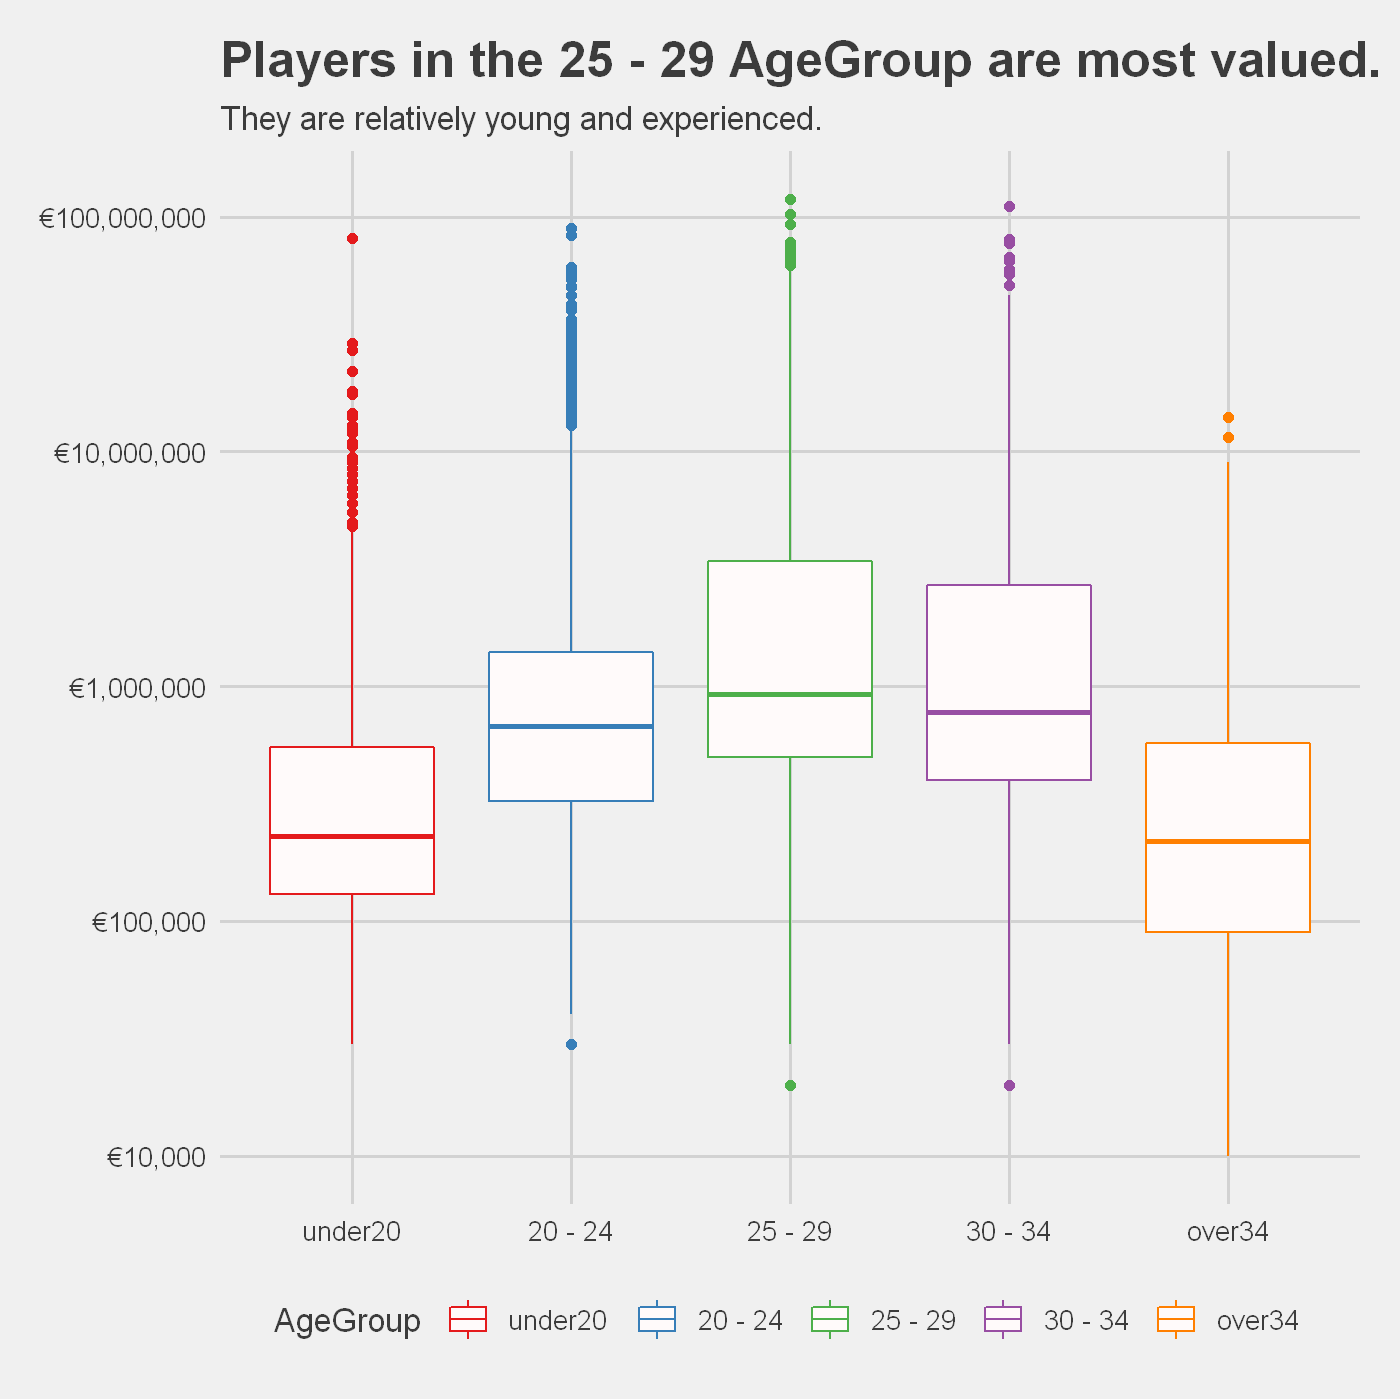

In [16]:
value_by_age <- ggplot(data = player_data, aes(x = AgeGroup, y = ValueEuros, color = AgeGroup)) +
    geom_boxplot(fill = "snow1") +
    scale_y_log10(label=dollar_format(prefix = "€")) +
    labs(x = 'AgeGroup', y = "Value", 
       title = "Players in the 25 - 29 AgeGroup are most valued.",
        subtitle = "They are relatively young and experienced.") +
    theme_fivethirtyeight() #+ border("gray60")

value_by_age + scale_color_brewer(palette="Set1")


Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 229 rows containing non-finite values (stat_boxplot)."


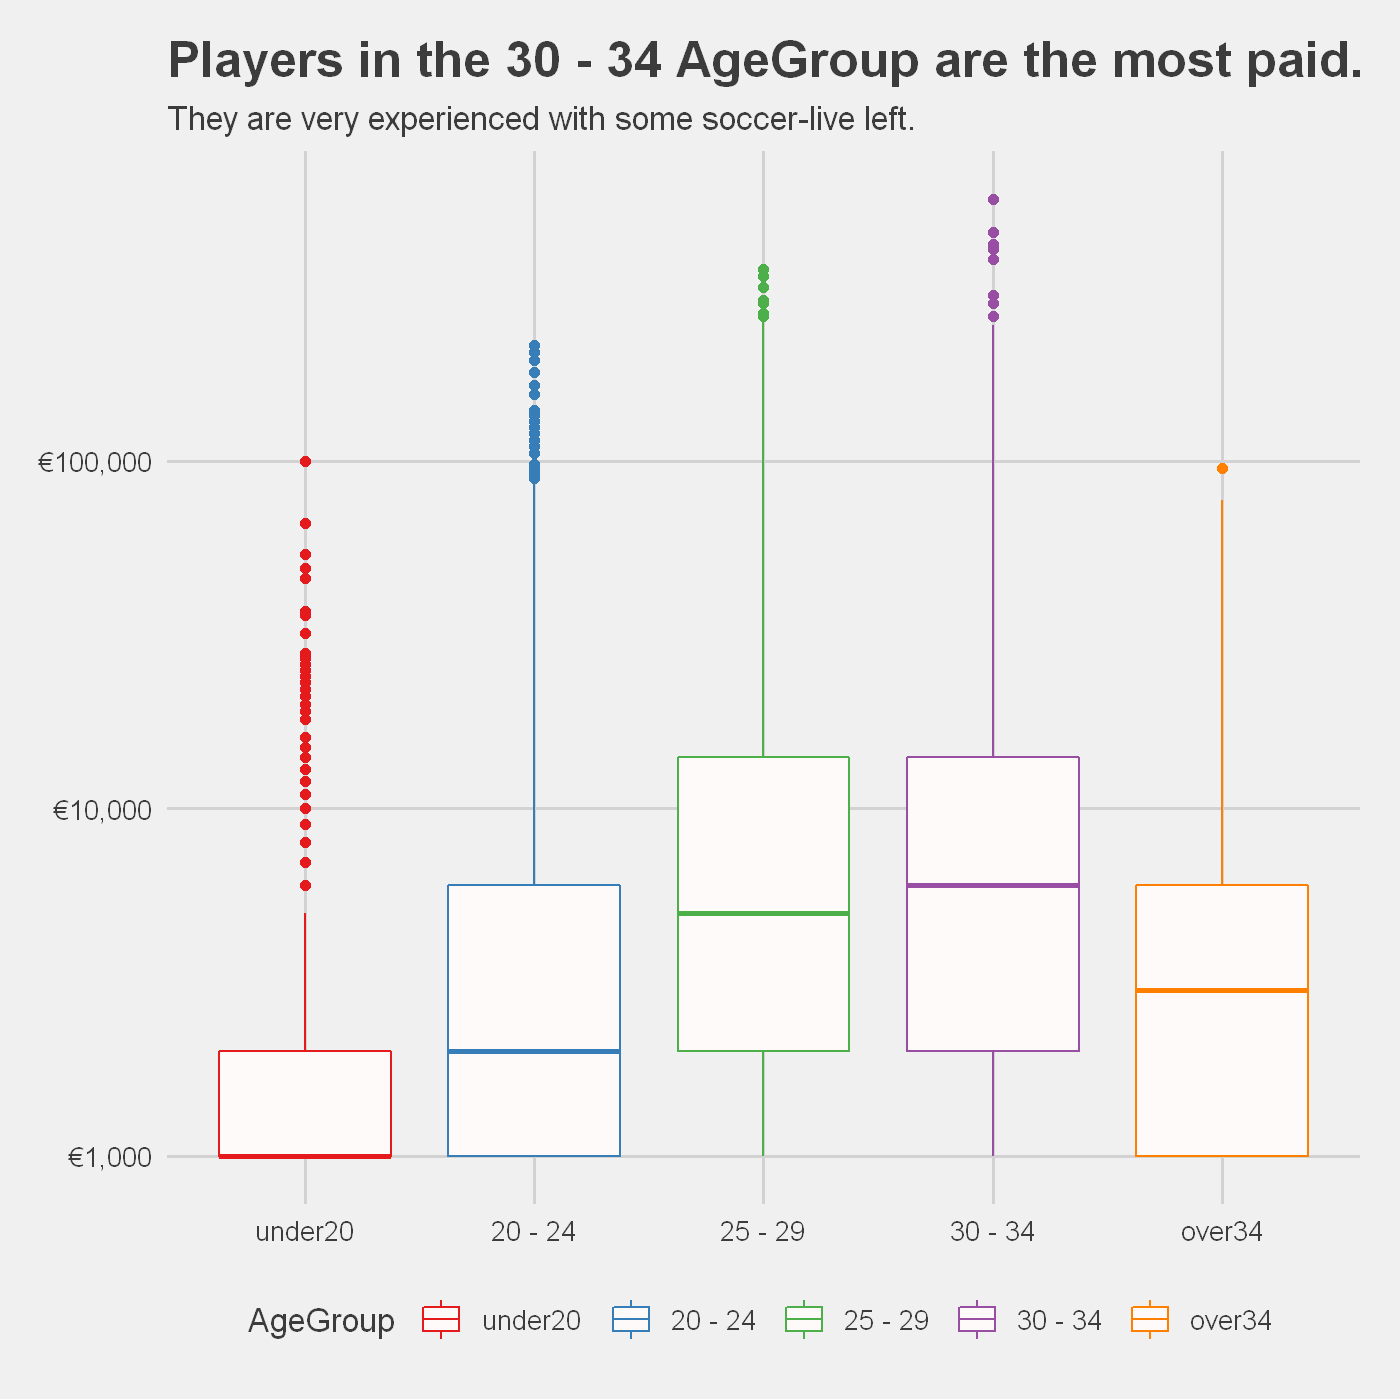

In [16]:
wage_by_age <- ggplot(data = player_data, aes(x = AgeGroup, y = WageEuros, color = AgeGroup)) +
    geom_boxplot(fill = "snow1") +
    scale_y_log10(label=dollar_format(prefix = "€")) +
    labs(x = 'AgeGroup', y = "Wages", 
       title = "Players in the 30 - 34 AgeGroup are the most paid.",
        subtitle = "They are very experienced with some soccer-live left.") +
    theme_fivethirtyeight() + border("gray60")

wage_by_age + scale_color_brewer(palette="Set1")

In [22]:
hchart(player_data$Overall, name = 'Overall Rate')

HTML widgets cannot be represented in plain text (need html)

In [19]:
player_data$PositionGroup <- factor(player_data$PositionGroup, levels = c("GK", "DEF", "MID", "FWD"))

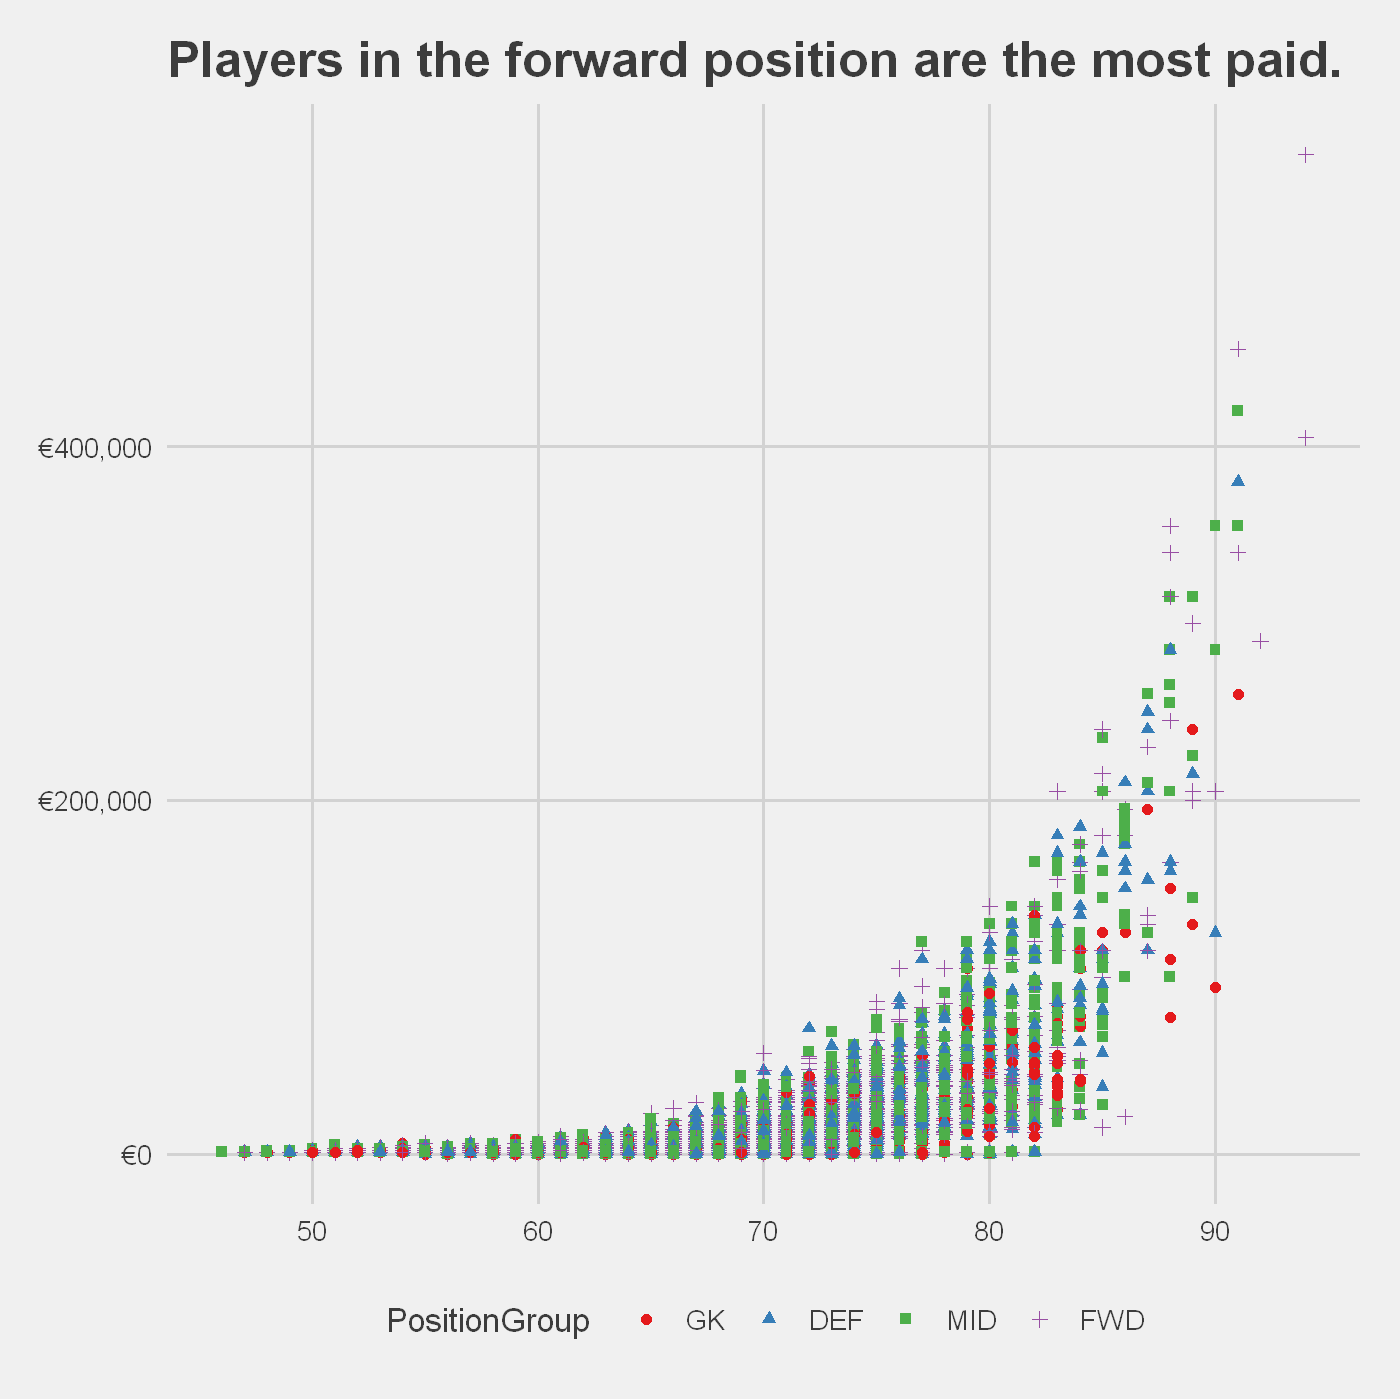

In [20]:
overs_plot <- ggplot(player_data,  aes(x = Overall, y = WageEuros, color=PositionGroup, shape = PositionGroup)) +      
  geom_point() +
  xlab("Overall Rating") + ylab("Wage") +
  scale_y_continuous(label=dollar_format(prefix = "€")) +
    labs(x = 'PositionGroup', y = "Wages", 
       title = "Players in the forward position are the most paid.") +
  theme_fivethirtyeight() + border("gray60")

overs_plot + scale_color_brewer(palette="Set1")


Warning message:
"Transformation introduced infinite values in continuous y-axis"
Warning message:
"Removed 229 rows containing non-finite values (stat_boxplot)."


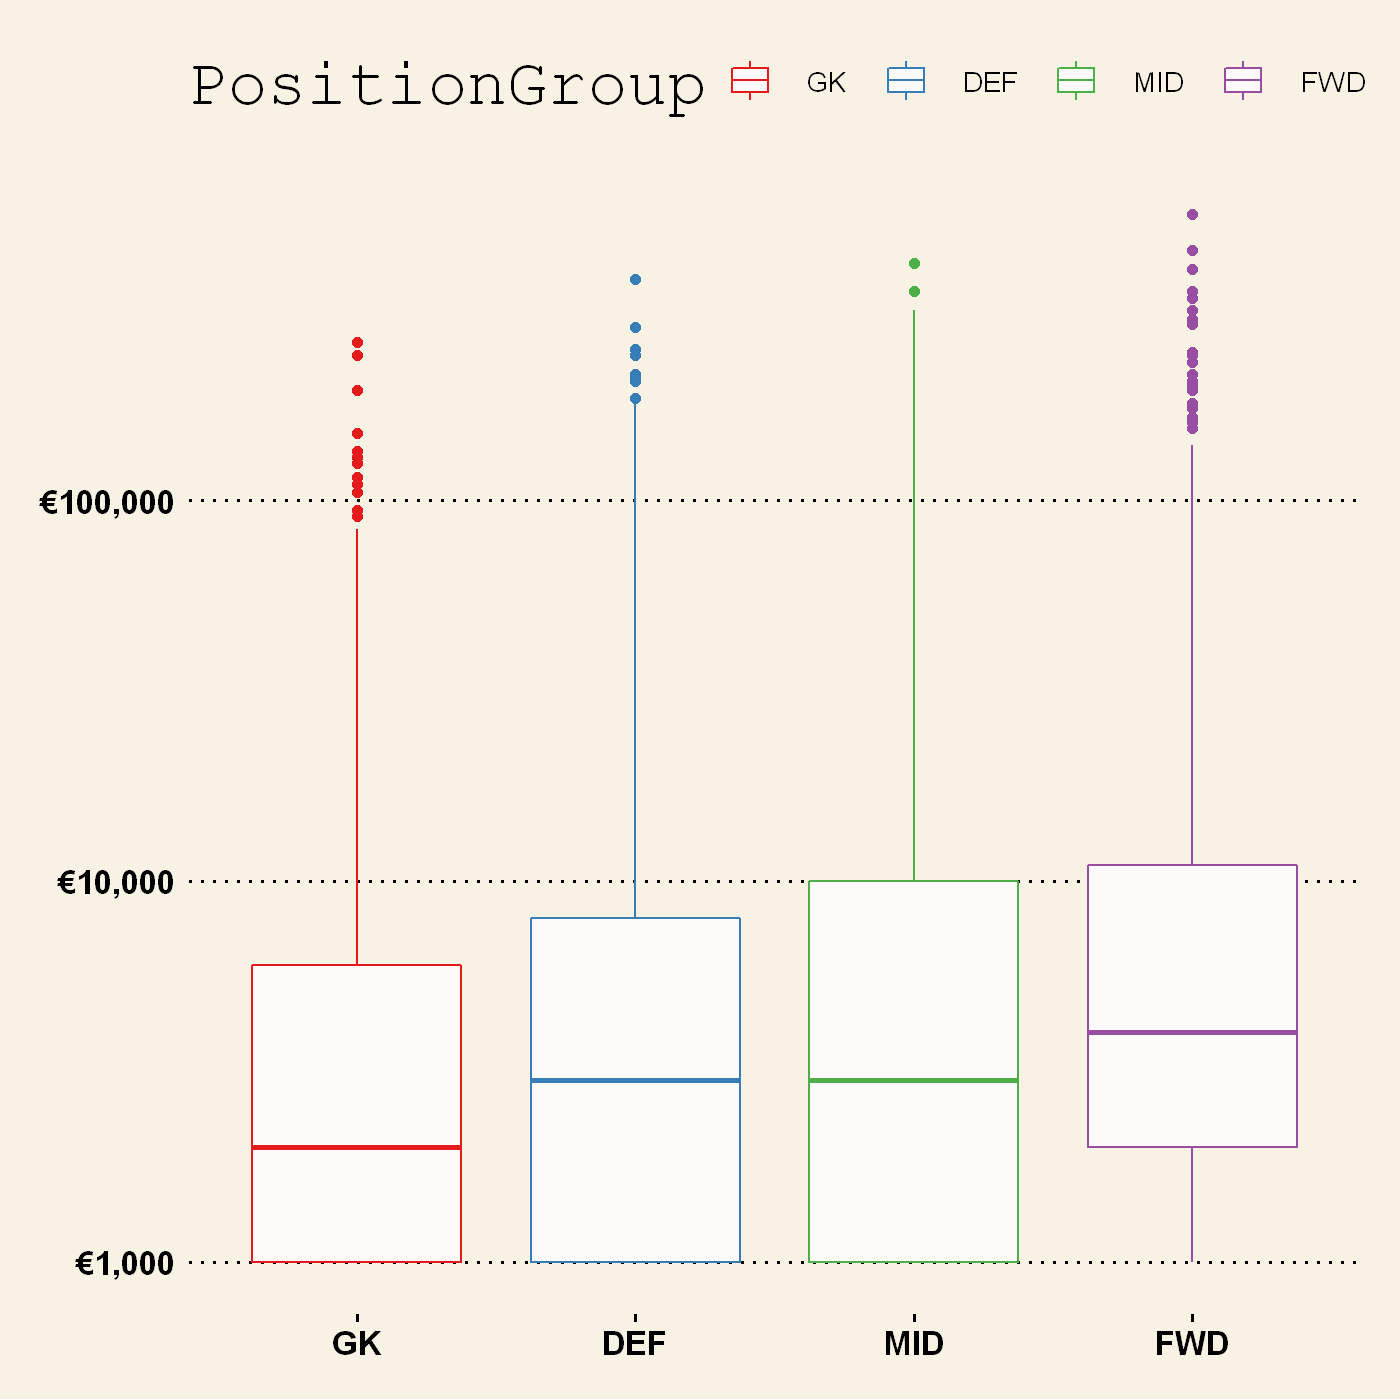

In [21]:
position_by_wage <- ggplot(data = player_data, aes(x = PositionGroup, y = WageEuros, color = PositionGroup)) +
    geom_boxplot(fill = "snow1") +
    scale_y_log10(label=dollar_format(prefix = "€")) +
    theme_wsj() + border("gray60")

position_by_wage + scale_color_brewer(palette="Set1")

In [22]:
av_rating_by_age <- player_data %>% group_by(Age) %>%
                  summarise(Av_Rating = mean(Overall)) 
  
av_rating_by_age

Age,Av_Rating
<int>,<dbl>
16,54.45238
17,56.36585
18,57.74180
19,59.57591
20,61.86489
21,63.49014
22,65.00524
23,66.27074
24,67.31808


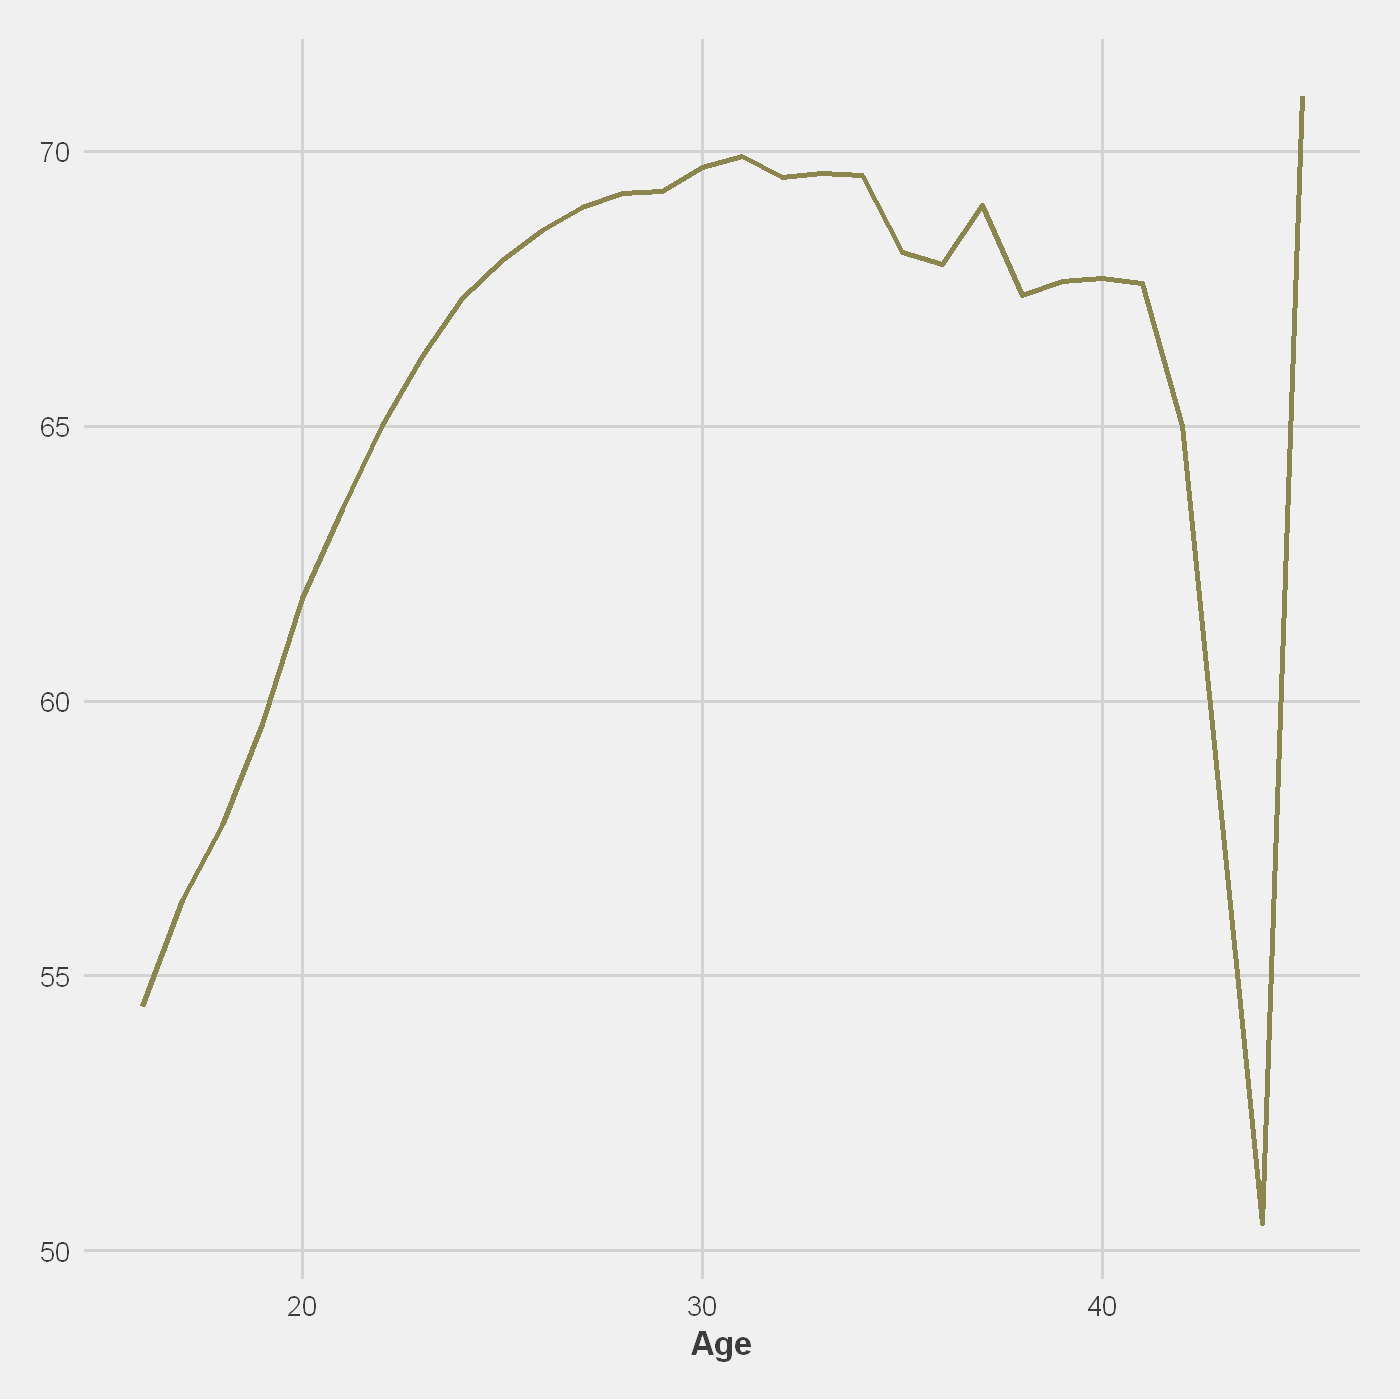

In [23]:
ggplot(av_rating_by_age, aes(x= Age, y= Av_Rating)) +
  geom_line(color = "khaki4", size = 1) +
  xlab("Age") +
  theme_fivethirtyeight() +
  theme(axis.title.x = element_text(face = "bold"))

In [24]:
player_data %>% filter(Age >= 44)

ï..ID,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred.Foot,International.Reputation,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause,ValueEuros,WageEuros,PositionGroup,AgeGroup
<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<int>,...,<int>,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>
140029,O. PÃ©rez,45,Mexico,71,71,Pachuca,1256,Right,2,...,70,64,65,73,74,â‚¬272K,160000,8000,GK,over34
51963,T. Warner,44,Trinidad & Tobago,53,53,Accrington Stanley,926,Right,1,...,48,56,56,60,44,,0,1000,GK,over34
53748,K. Pilkington,44,England,48,48,Cambridge United,774,Right,1,...,45,48,44,49,46,,0,1000,GK,over34


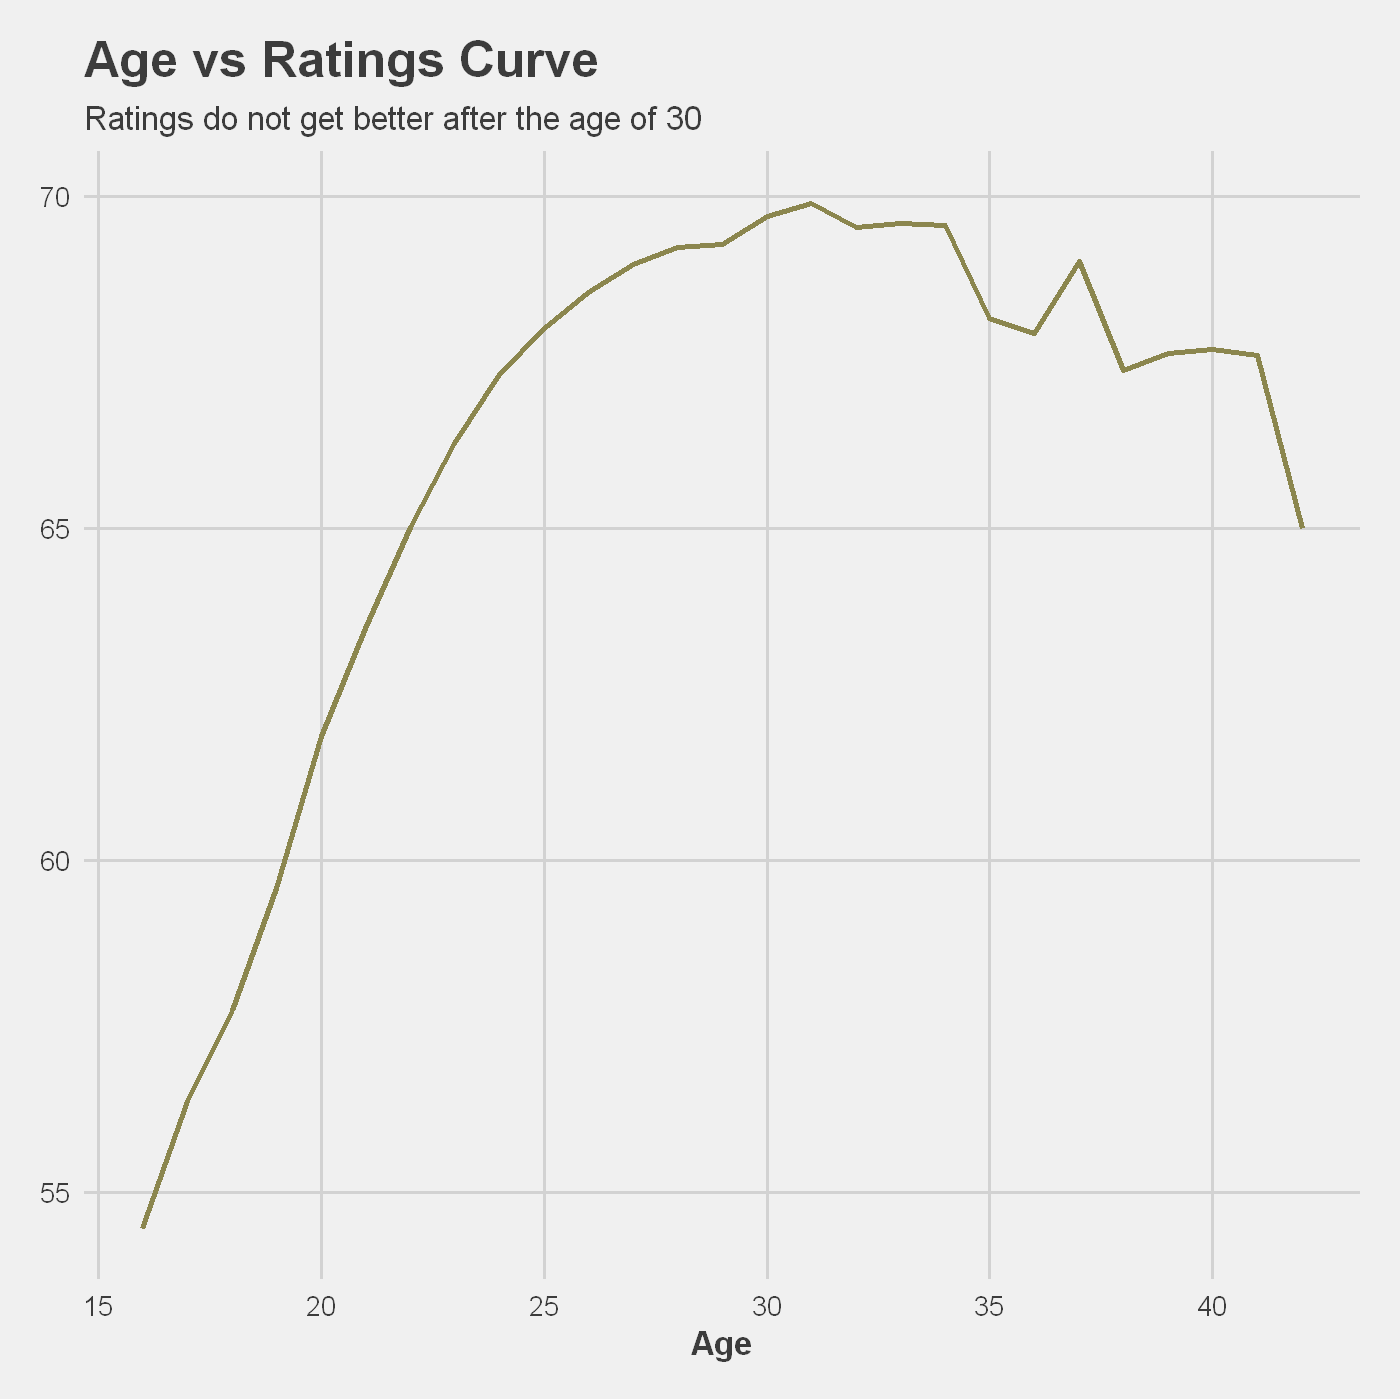

In [25]:
ggplot(data = av_rating_by_age %>% filter(Age <= 43), aes(x= Age, y= Av_Rating)) +
  geom_line(color = "khaki4", size = 1) +
  ggtitle("Age vs Ratings Curve", subtitle = "Ratings do not get better after the age of 30") +
  xlab("Age") +
  theme_fivethirtyeight() +
  theme(axis.title.x = element_text(face = "bold"))

In [26]:
pote_vs_rating_by_age <- player_data %>% group_by(Age) %>%
                  summarise(Av_Rating = mean(Overall),
                           Av_Potential = mean(Potential)) 
  
pote_vs_rating_by_age

Age,Av_Rating,Av_Potential
<int>,<dbl>,<dbl>
16,54.45238,73.19048
17,56.36585,74.29617
18,57.74180,73.53005
19,59.57591,73.13418
20,61.86489,73.22330
21,63.49014,72.96901
22,65.00524,72.83221
23,66.27074,72.58069
24,67.31808,72.09077


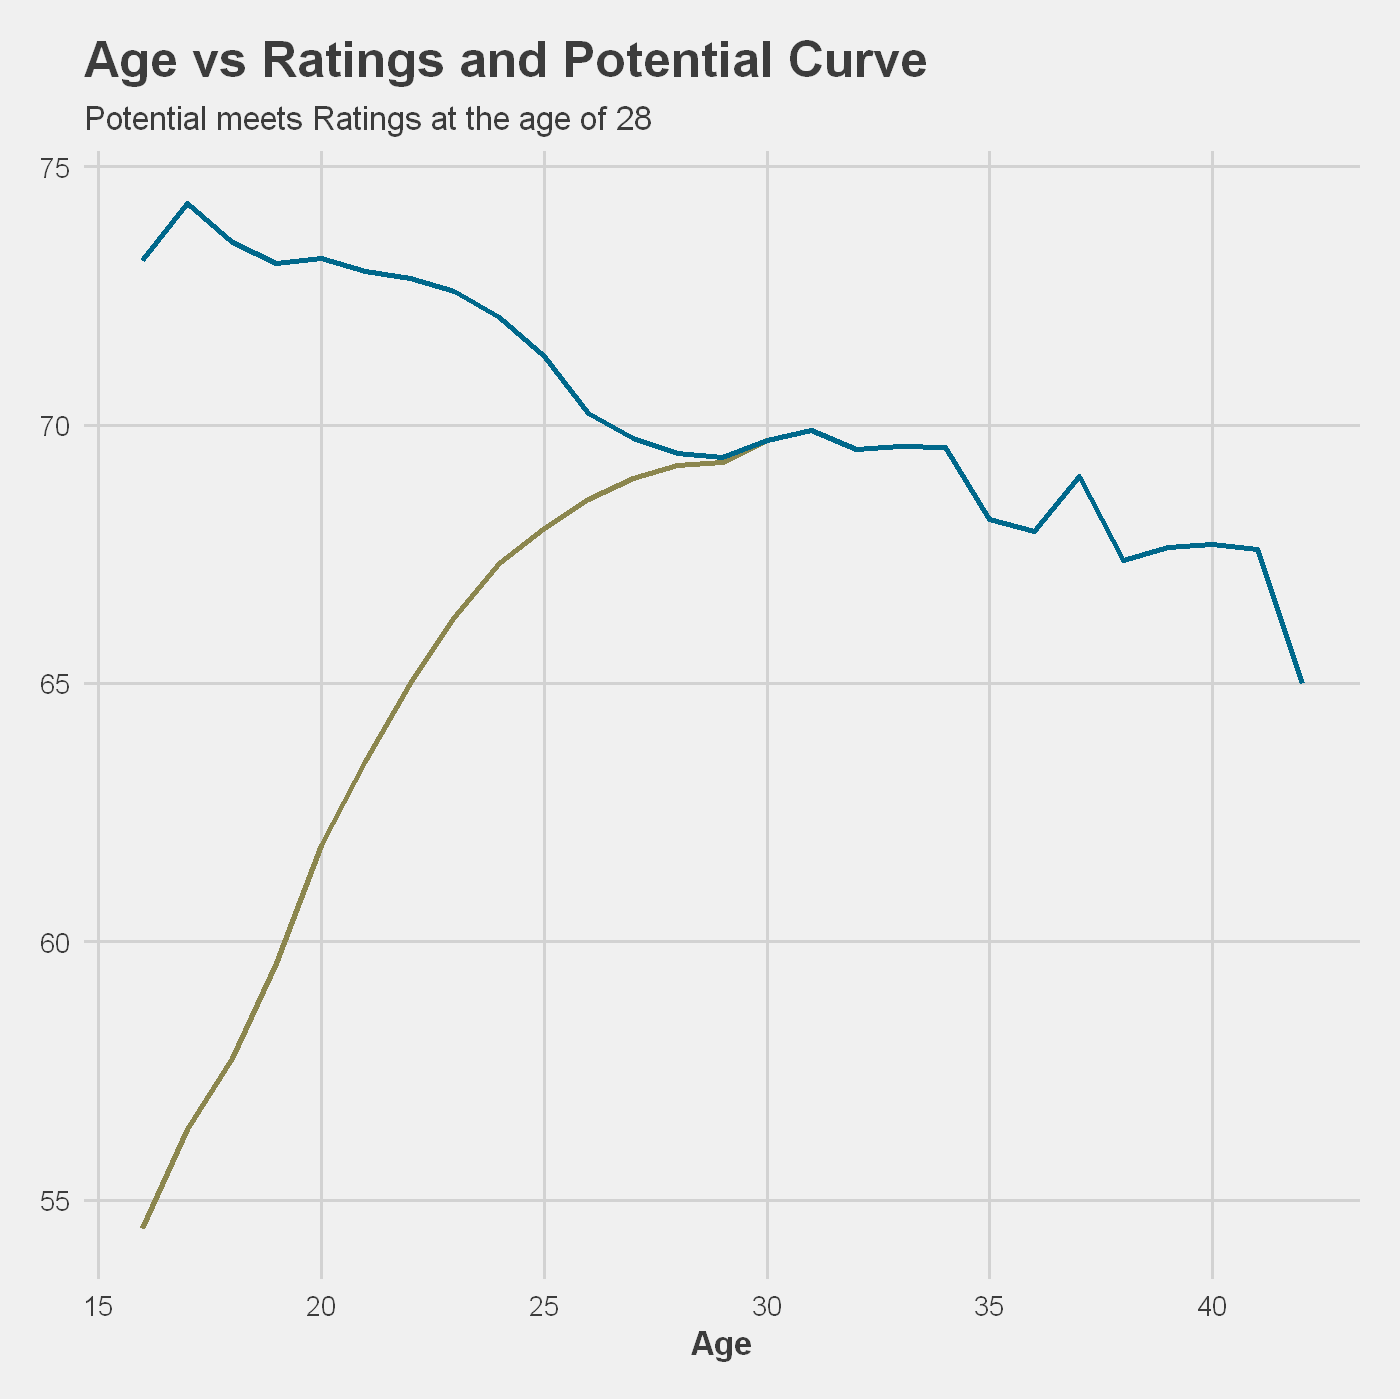

In [27]:
ggplot(data = pote_vs_rating_by_age %>% filter(Age <= 43), aes(x= Age)) +
    geom_line(aes(y= Av_Rating), color = "khaki4", size = 1) + 
    geom_line(aes(y= Av_Potential), color = "deepskyblue4", size = 1)+
    ggtitle("Age vs Ratings and Potential Curve", subtitle = "Potential meets Ratings at the age of 28") +
    xlab("Age") +
    theme_fivethirtyeight() +
    theme(axis.title.x = element_text(face = "bold"))

### More feature engineering

In [28]:
player_data <- player_data %>% separate(Height, c('feet', 'inches'), "'", convert = TRUE) %>% 
      mutate(Height_cm = (12*feet + inches)*2.54) %>%
        select(-feet, -inches)

head(player_data)

,ï..ID,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred.Foot,International.Reputation,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Release.Clause,ValueEuros,WageEuros,PositionGroup,AgeGroup,Height_cm
,<int>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<fct>,<int>,...,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>
1,158023,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,5,...,11,15,14,8,â‚¬226.5M,110500000,565000,FWD,30 - 34,170.18
2,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,Right,5,...,11,15,14,11,â‚¬127.1M,77000000,405000,FWD,30 - 34,187.96
3,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5,...,9,15,15,11,â‚¬228.1M,118500000,290000,FWD,25 - 29,175.26
4,193080,De Gea,27,Spain,91,93,Manchester United,1471,Right,4,...,85,87,88,94,â‚¬138.6M,72000000,260000,GK,25 - 29,193.04
5,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,Right,4,...,13,5,10,13,â‚¬196.4M,102000000,355000,MID,25 - 29,180.34
6,183277,E. Hazard,27,Belgium,91,91,Chelsea,2142,Right,4,...,12,6,8,8,â‚¬172.1M,93000000,340000,FWD,25 - 29,172.72


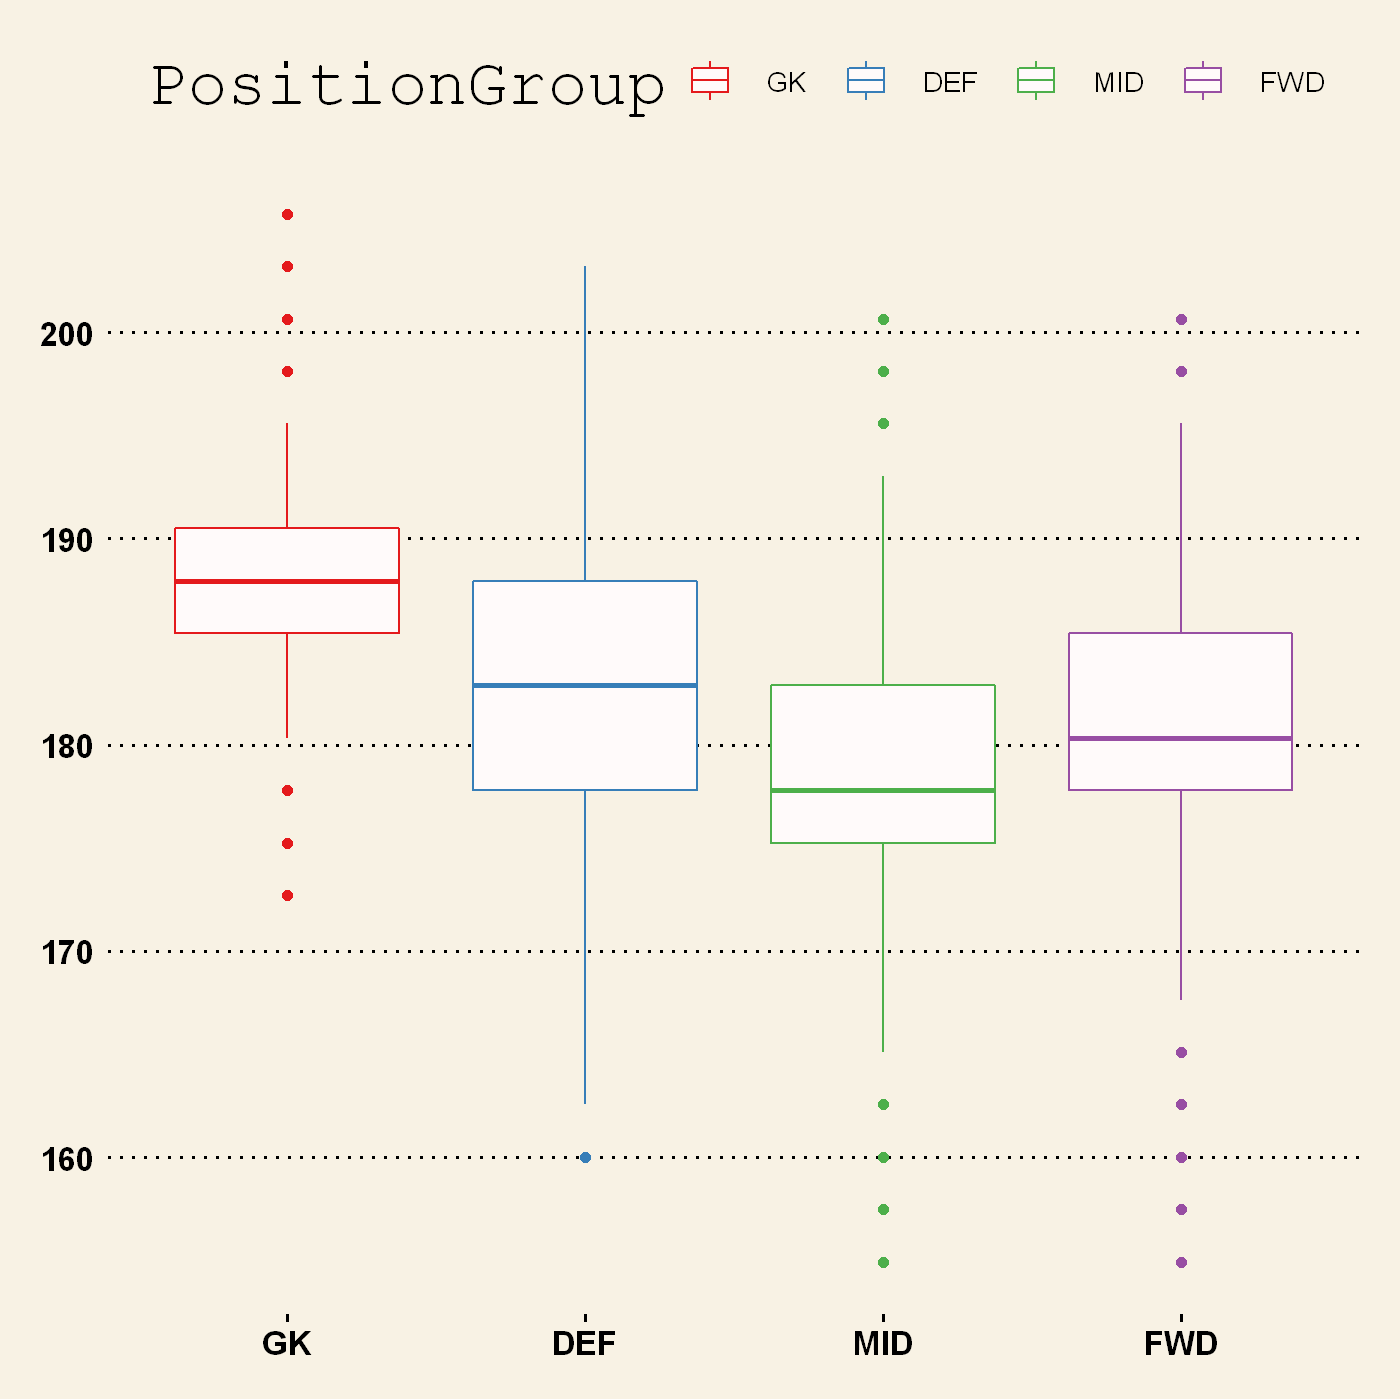

In [29]:
position_by_wage <- ggplot(data = player_data, aes(x = PositionGroup, y = Height_cm, color = PositionGroup)) +
    geom_boxplot(fill = "snow1") +
    theme_wsj() + border("gray60") 

position_by_wage + scale_color_brewer(palette="Set1")

### More data exploration

In [19]:
top_players_wages <- player_data %>%
    dplyr::select(Name, Club, Overall, ValueEuros, WageEuros)%>%
    group_by(WageEuros)%>%
    arrange(desc(WageEuros))%>%
    head(20)


In [21]:
player_data %>%
    dplyr::select(Name, Club, Overall, ValueEuros, WageEuros)%>%
    group_by(WageEuros)%>%
    arrange(desc(WageEuros))%>%
    head(5000)

Name,Club,Overall,ValueEuros,WageEuros
<fct>,<fct>,<int>,<dbl>,<dbl>
L. Messi,FC Barcelona,94,110500000,565000
L. SuÃ¡rez,FC Barcelona,91,80000000,455000
L. ModriÄ‡,Real Madrid,91,67000000,420000
Cristiano Ronaldo,Juventus,94,77000000,405000
Sergio Ramos,Real Madrid,91,51000000,380000
K. De Bruyne,Manchester City,91,102000000,355000
T. Kroos,Real Madrid,90,76500000,355000
G. Bale,Real Madrid,88,60000000,355000
E. Hazard,Chelsea,91,93000000,340000


In [22]:
# plot size
options(repr.plot.res = 300)

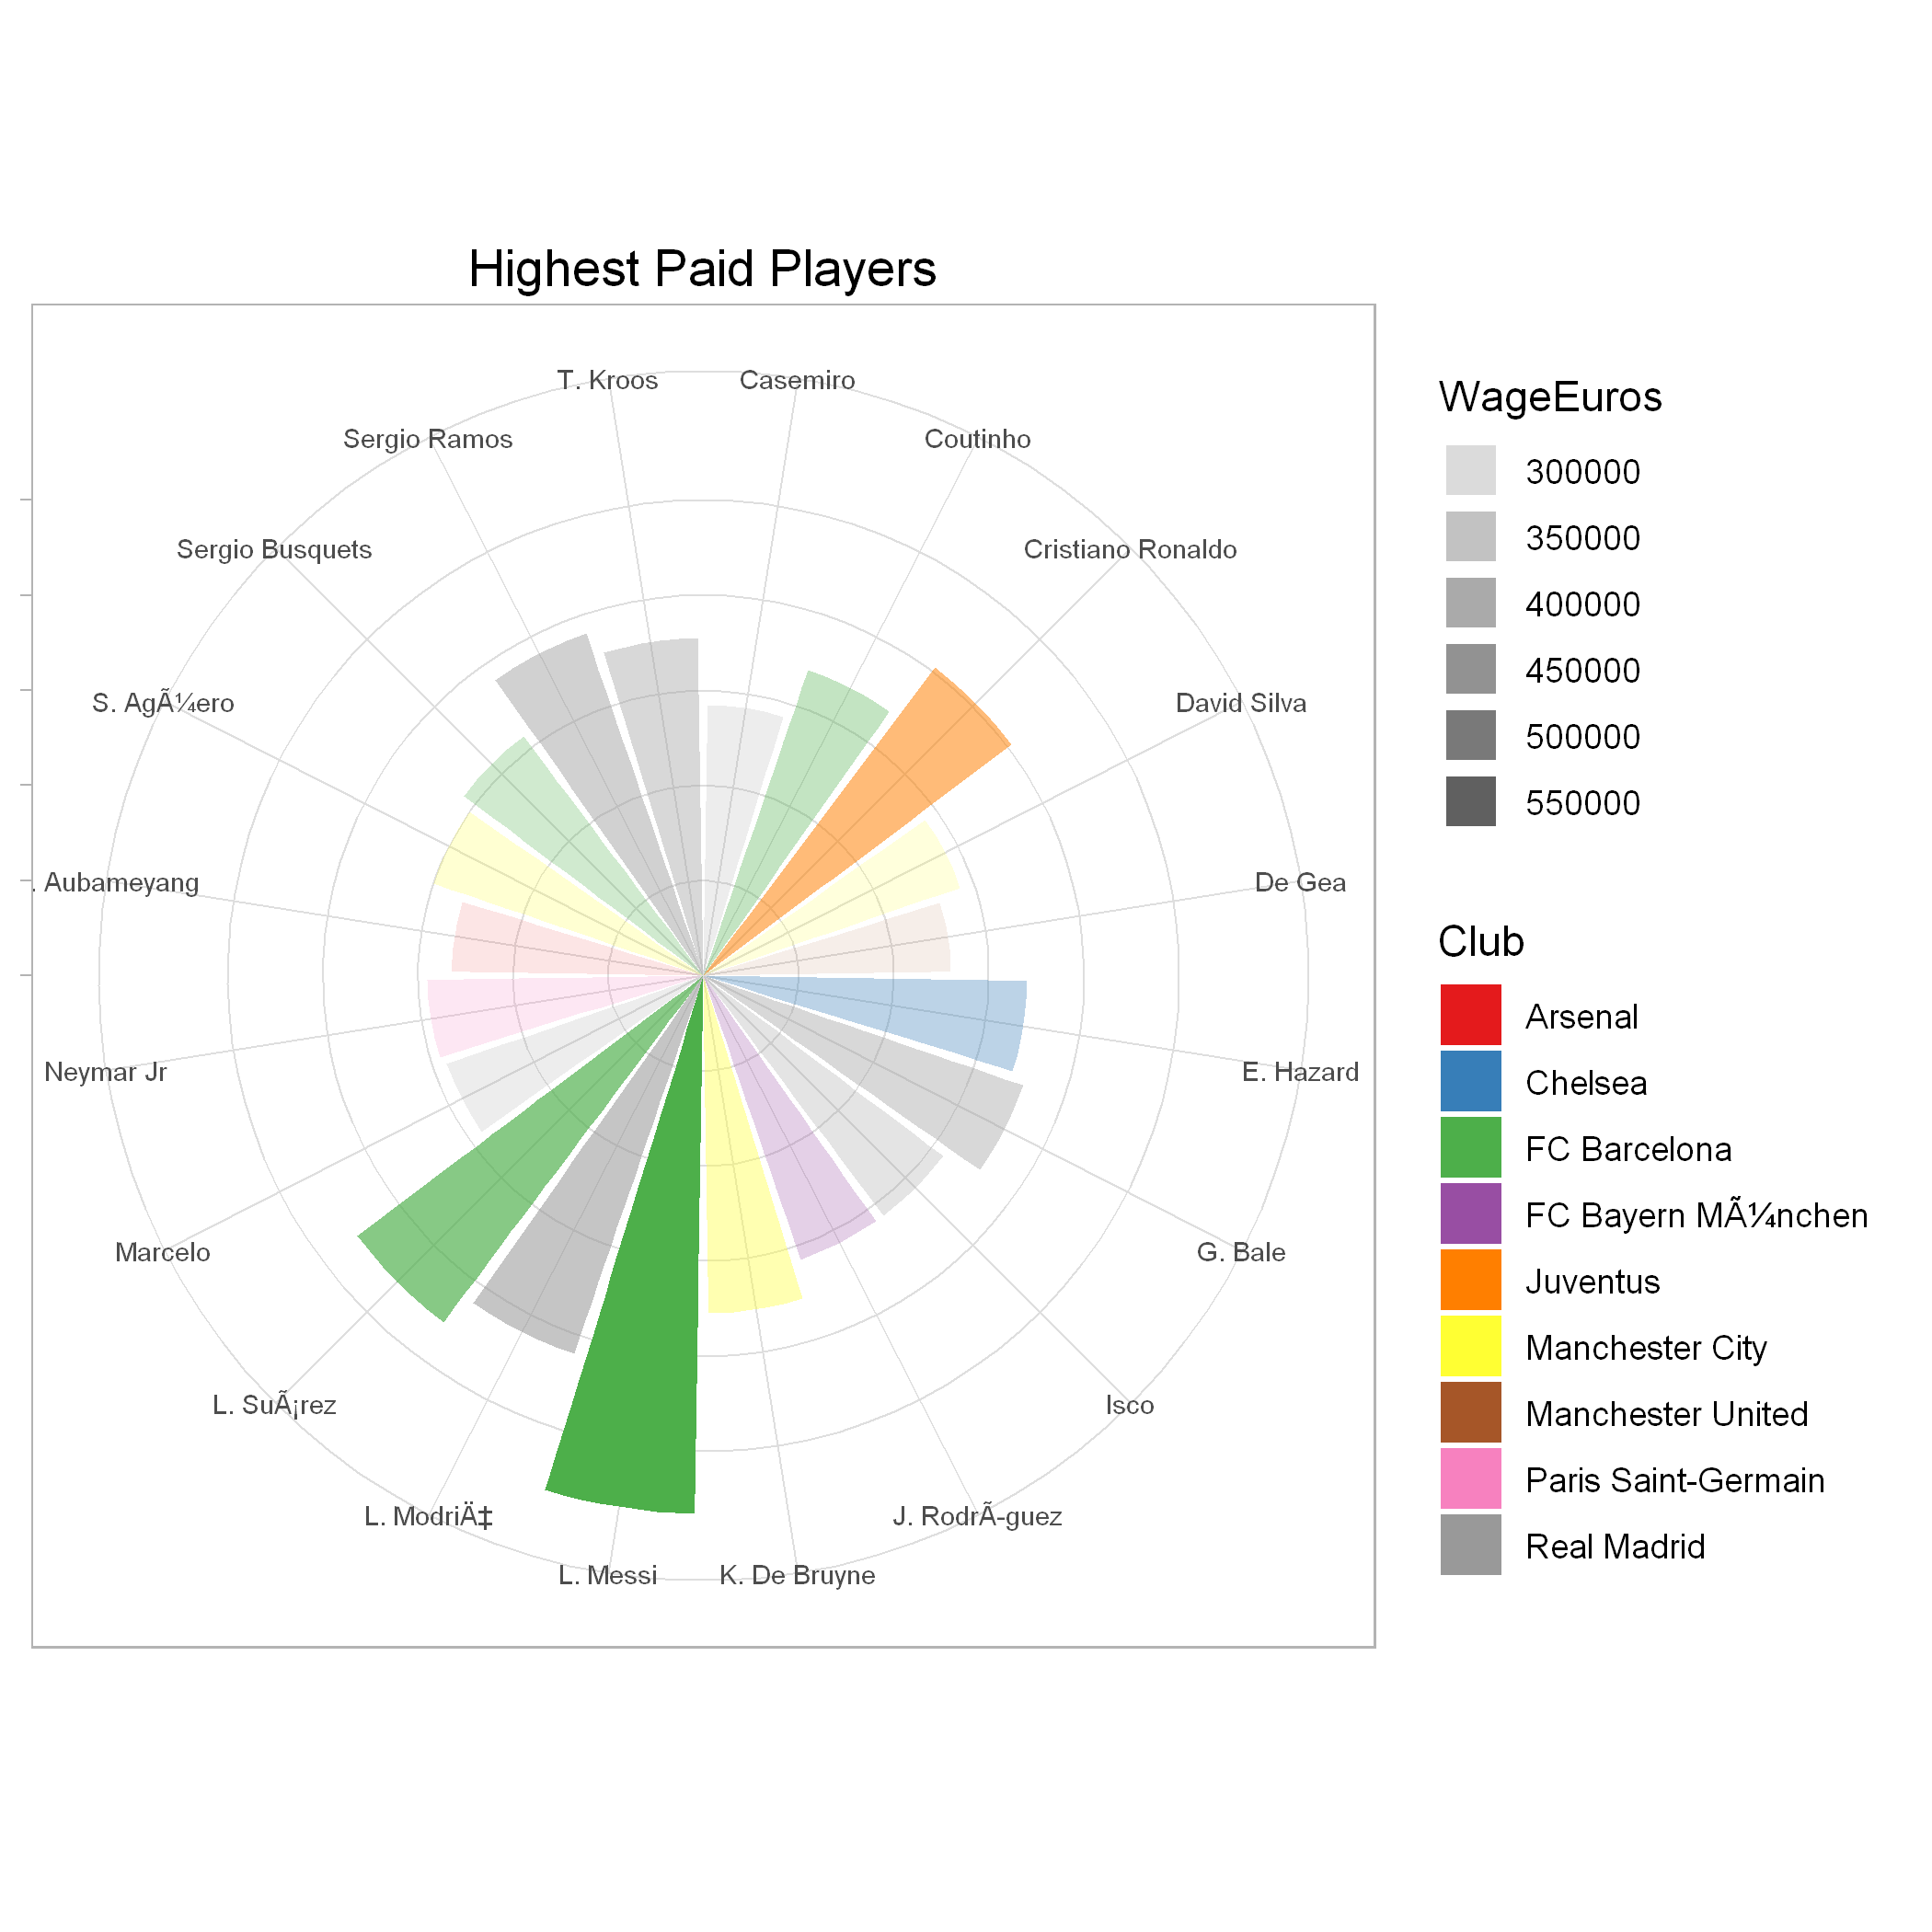

In [23]:
top_players_wages_plot <- top_players_wages %>%
    ggplot(mapping = aes(x = Name, y = WageEuros, fill = Club, alpha = WageEuros, size=WageEuros))+
    geom_bar(stat="identity") +theme_light() +
    coord_polar()+
    labs(x = NULL, y =NULL, title ='Highest Paid Players')+
    theme(plot.title = element_text(hjust=0.5),legend.position ='right', axis.text.x = element_text(size = 7),
          axis.text.y = element_blank())+scale_y_continuous(labels = comma)
   

top_players_wages_plot + scale_fill_brewer(palette="Set1")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



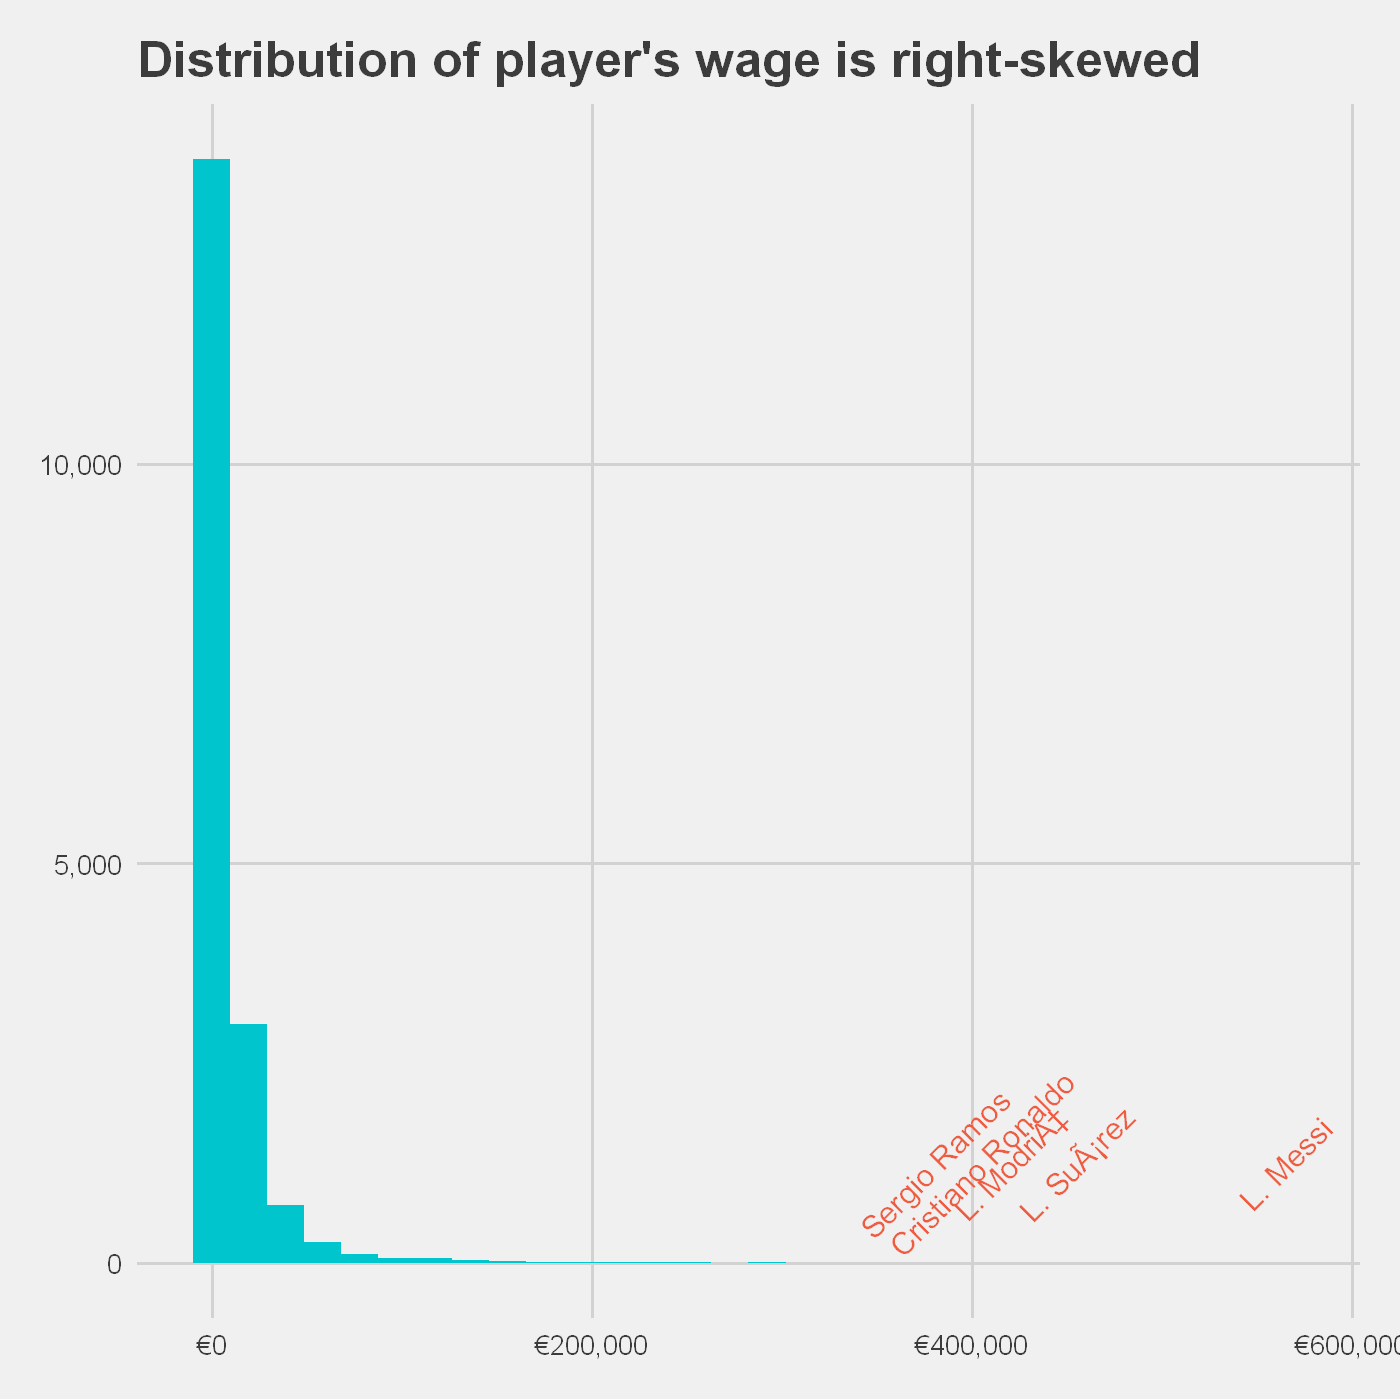

In [35]:
top_five_players <- player_data %>% 
  arrange(-WageEuros) %>% 
  head(5)

player_data %>% 
  ggplot(aes(WageEuros)) + 
  geom_histogram(fill = 'turquoise3') + 
  scale_x_continuous(labels = dollar_format(prefix = '€')) + 
  scale_y_continuous(labels = comma) + 
  labs(x = 'Wage', y = NULL, 
       title = "Distribution of player's wage is right-skewed") + 
  annotate(geom = 'text', x = top_five_players$WageEuros, y = 1250, label = top_five_players$Name, 
           angle = 45, color = "tomato2") +
  theme(plot.title = element_text(hjust=0.5, size = 4), axis.text.x = element_text(size = 6))+
  theme_fivethirtyeight()

In [92]:
pow_trans <- function(n = 2){
    scales::trans_new("pow",
                      transform = function(x) sign(x) * x^n,
                      inverse = function(x) sign(x) * abs(x)^(1/n))
}

                      #did not use this eventually

Warning message:
"Transformation introduced infinite values in continuous x-axis"
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
"Removed 229 rows containing non-finite values (stat_bin)."


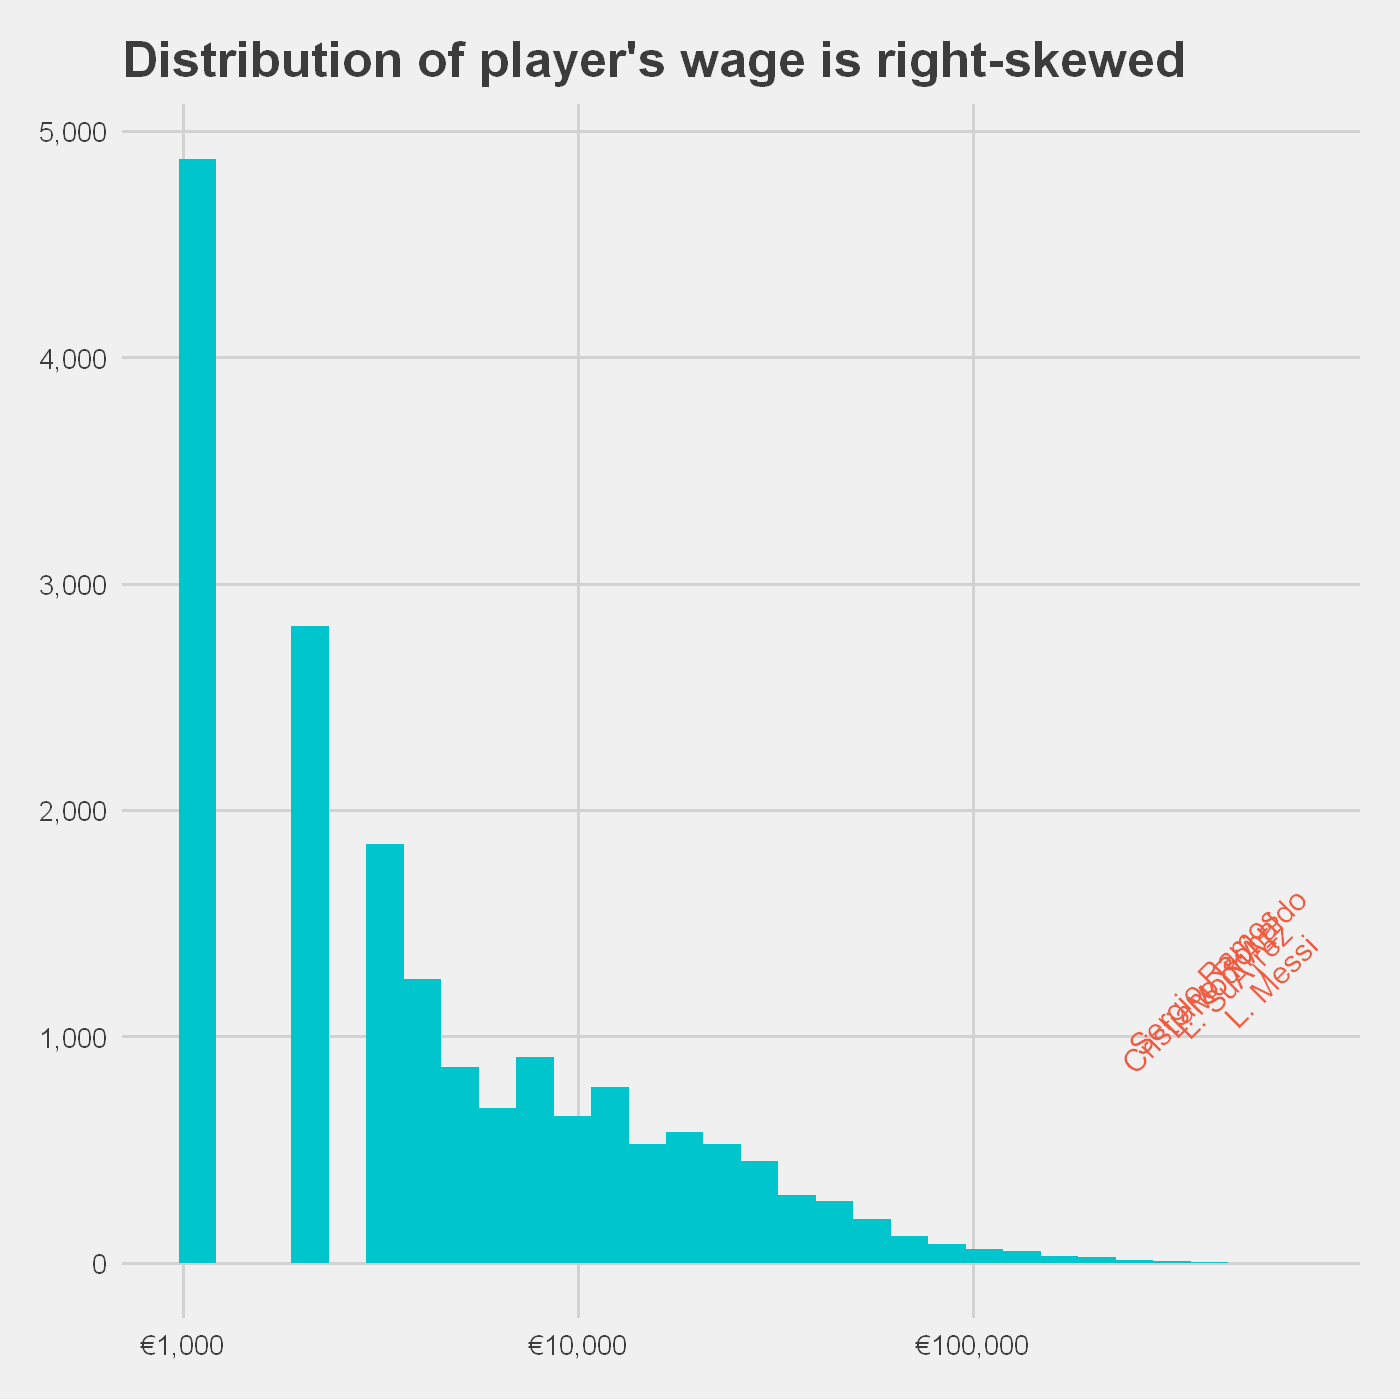

In [94]:
player_data %>% 
  ggplot(aes(WageEuros)) + 
  geom_histogram(fill = 'turquoise3') + 
  scale_x_log10(labels = dollar_format(prefix = '€')) + 
  scale_y_continuous(labels = comma) + 
  labs(x = 'Wage', y = NULL, 
       title = "Distribution of player's wage is right-skewed") + 
  annotate(geom = 'text', x = top_five_players$WageEuros, y = 1250, label = top_five_players$Name, 
           angle = 45, color = "tomato2") +
  theme(plot.title = element_text(hjust=0.5, size = 4), axis.text.x = element_text(size = 6))+
  theme_fivethirtyeight()

### The wages of top 3.3% of players (598 out of 18147) account for more than 33% of the total wages of all players

In [8]:
top200_count <- nrow(player_data %>% filter(WageEuros >= 10000))
all_count <- nrow(player_data)
(top200_count/all_count)*100

top200Wages <- player_data %>% filter(WageEuros >= 50000) %>% summarize(TotalTopW = sum(WageEuros))
allWages <- player_data %>% summarize(TotalAllW = sum(WageEuros))
(top200Wages/allWages)*100

[1] 23.82051

TotalTopW
<dbl>
33.36475


In [9]:
top200_count

[1] 4337

In [42]:
wage_by_club <- summarise_at(group_by(player_data, Club),vars(WageEuros),funs(sum(.,na.rm=TRUE)))

In [43]:
top_wage_by_club <- wage_by_club %>%top_n(5)

Selecting by WageEuros



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



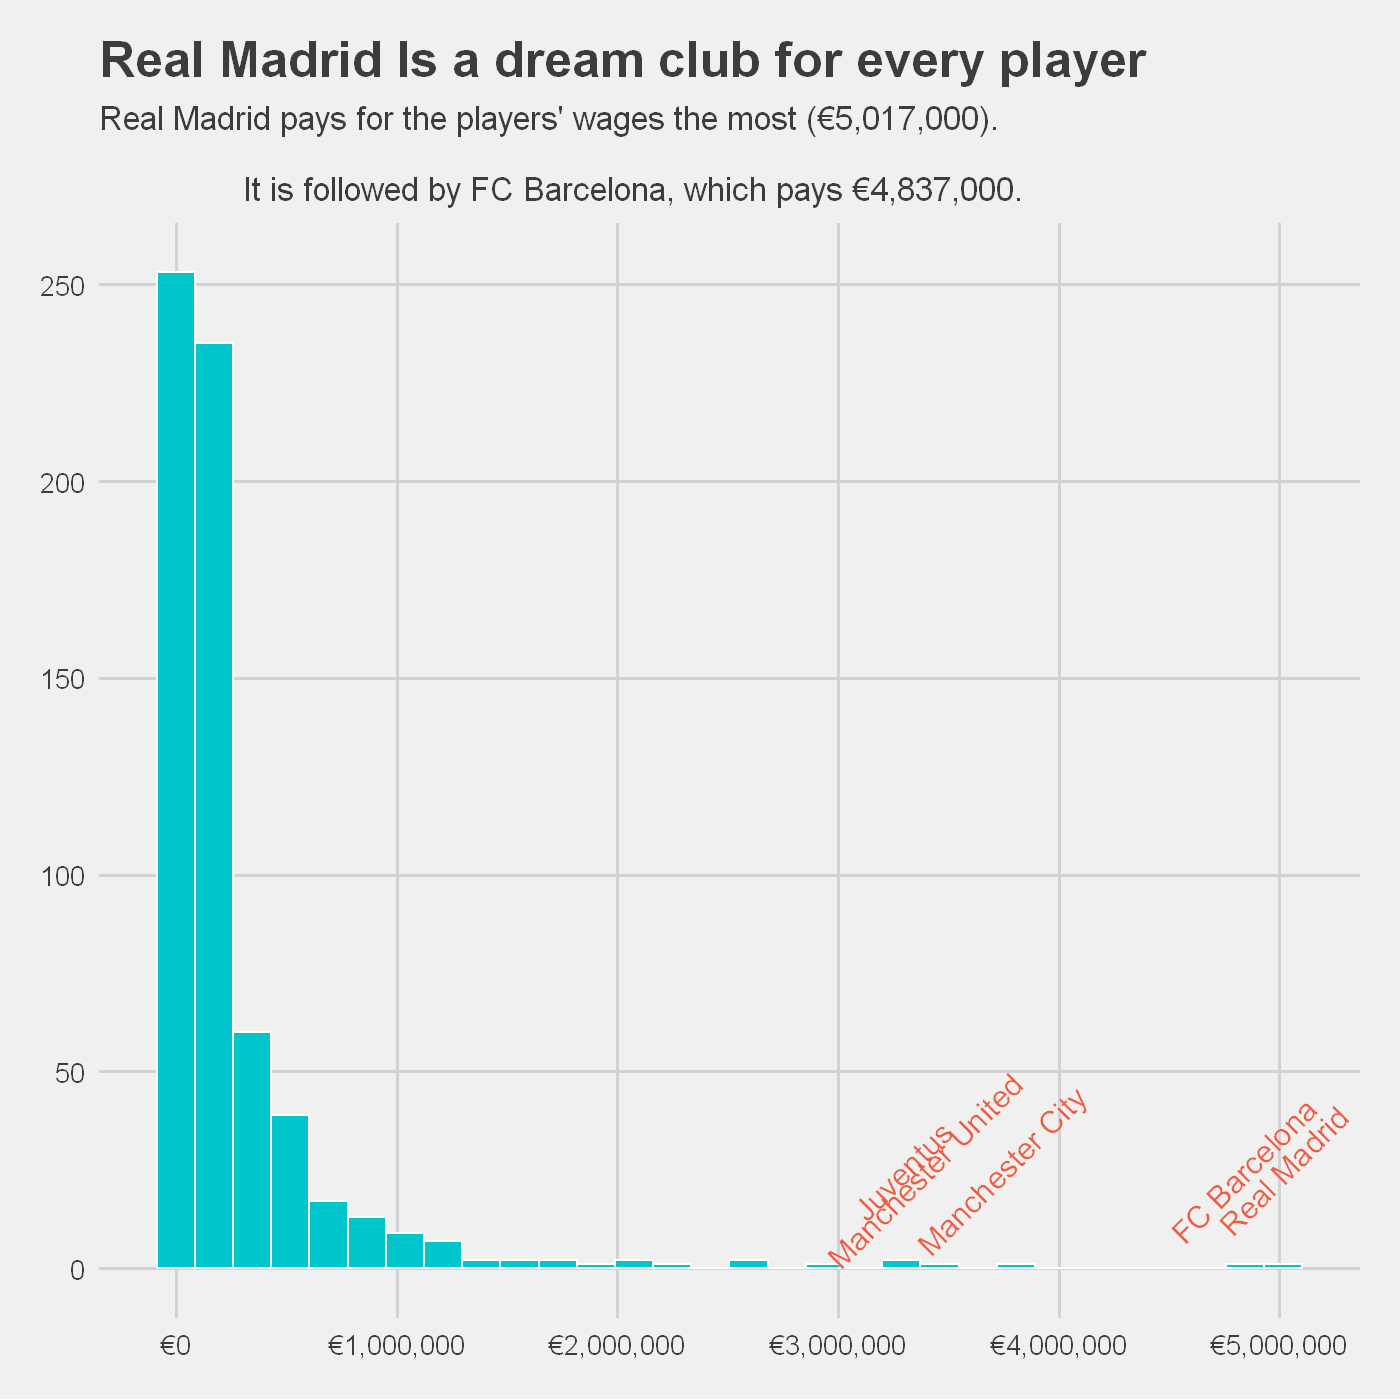

In [44]:
wage_by_club %>% 
  ggplot(aes(WageEuros)) + 
  geom_histogram(color = 'white', fill = "turquoise3") + 
  scale_x_continuous(labels = dollar_format(prefix = '€')) + 
  scale_y_continuous(labels = comma) + 
  labs(x = 'Total Wages', y = NULL, 
       title = 'Real Madrid Is a dream club for every player', 
       subtitle = "Real Madrid pays for the players' wages the most (€5,017,000).\n 
                It is followed by FC Barcelona, which pays €4,837,000.")  +
  annotate(geom = 'text', x = top_wage_by_club %>% 
             select(WageEuros) %>% 
             unlist(), y = 25, label = top_wage_by_club %>% 
             head(5) %>% 
             select(Club) %>% 
             unlist(), angle = 45, color = "tomato2") + theme_fivethirtyeight()


In [25]:
top_25_club <- summarise_at(group_by(player_data, Club),vars(WageEuros),funs(sum(.,na.rm=TRUE))) %>% 
                      top_n(25) 
 
  

Selecting by WageEuros



In [26]:
top25_all <- player_data %>% mutate(Rank = ifelse(player_data$Club %in% top_25_club$Club, "Top", "NotTop25"))

In [27]:
top_alone <- top25_all %>% filter(Rank == "Top")

summarise_at(group_by(top_alone, Club),vars(Overall),funs(mean(.,na.rm=TRUE)))

Club,Overall
<fct>,<dbl>
Arsenal,75.18182
AS Monaco,72.93939
AtlÃ©tico Madrid,75.06061
Bayer 04 Leverkusen,75.80769
Borussia Dortmund,75.33333
Burnley,70.75758
Chelsea,76.78788
Everton,74.50000
FC Barcelona,78.03030


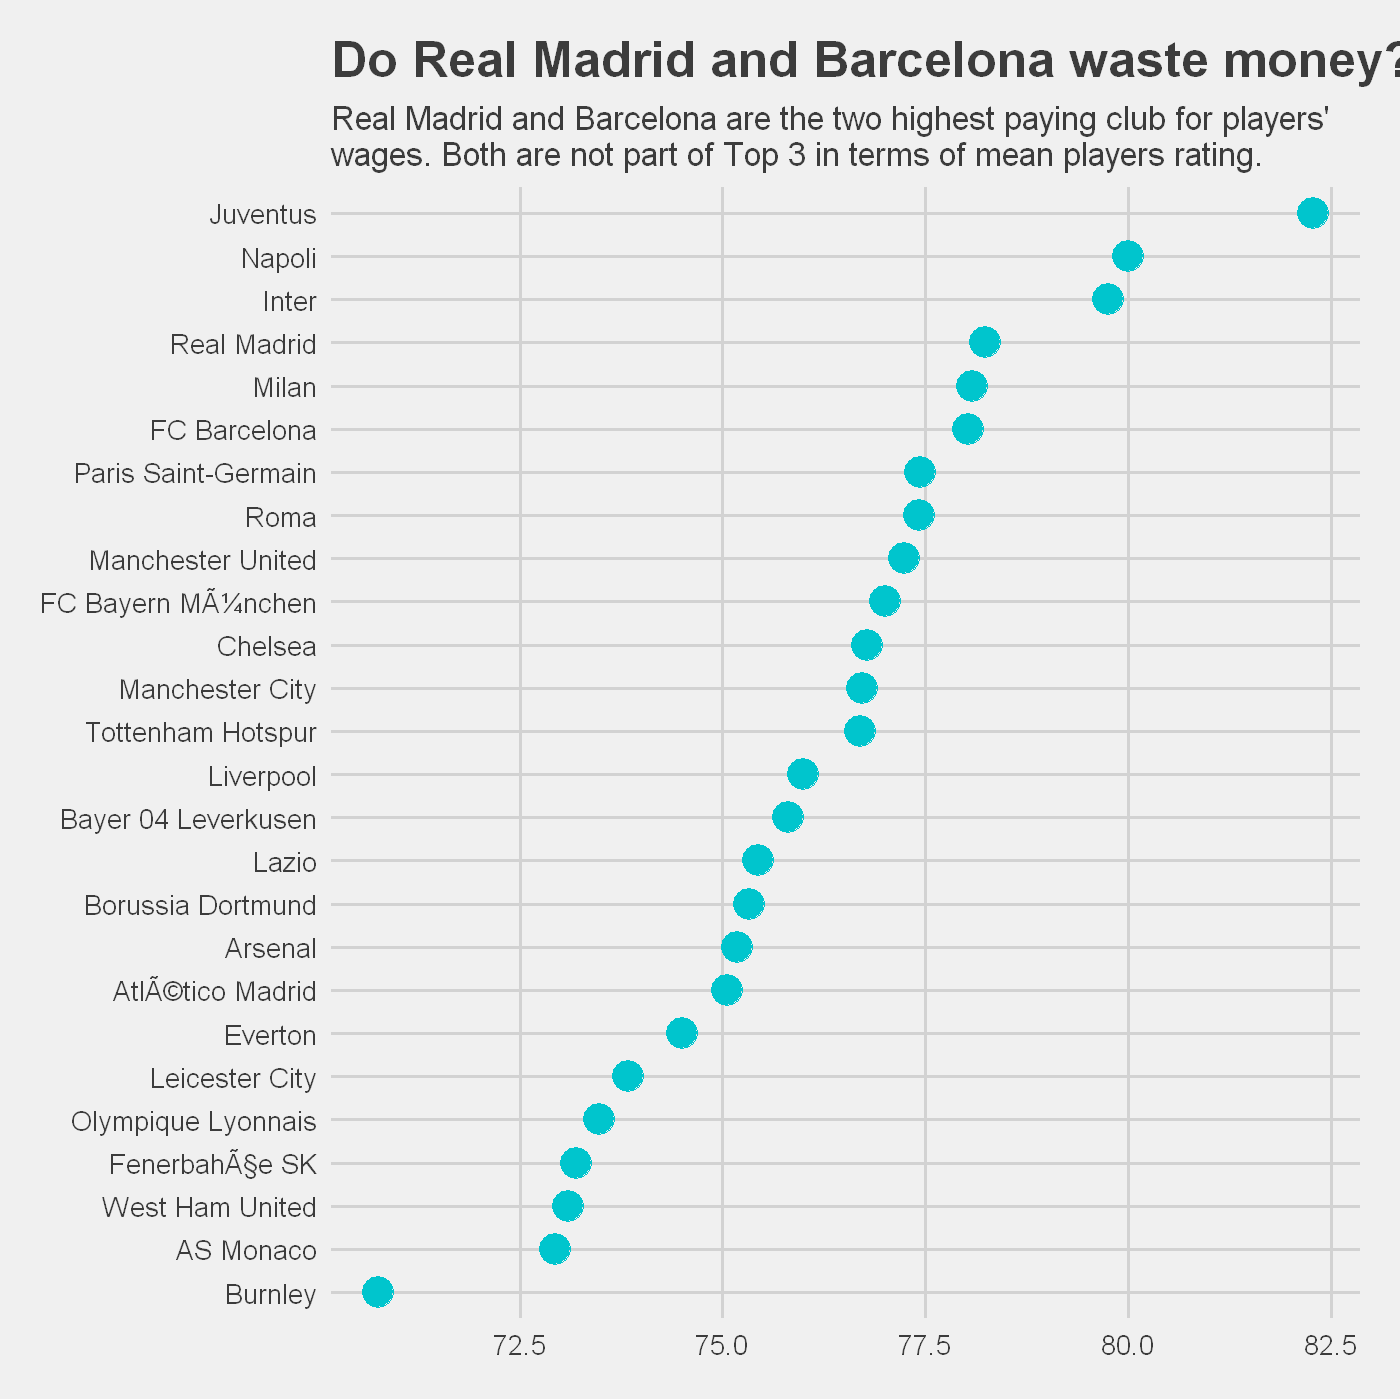

In [51]:
summarise_at(group_by(top_alone, Club),vars(Overall),funs(mean(.,na.rm=TRUE))) %>%
  ggplot(aes(fct_reorder(Club, Overall), Overall)) + 
  geom_point(size = 5, color = "turquoise3") + 
  labs(x = "Ratings", y = NULL, 
       title = 'Do Real Madrid and Barcelona waste money?', 
       subtitle = "Real Madrid and Barcelona are the two highest paying club for players' \nwages. Both are not part of Top 3 in terms of mean players rating.") + 
  coord_flip() + theme_fivethirtyeight()

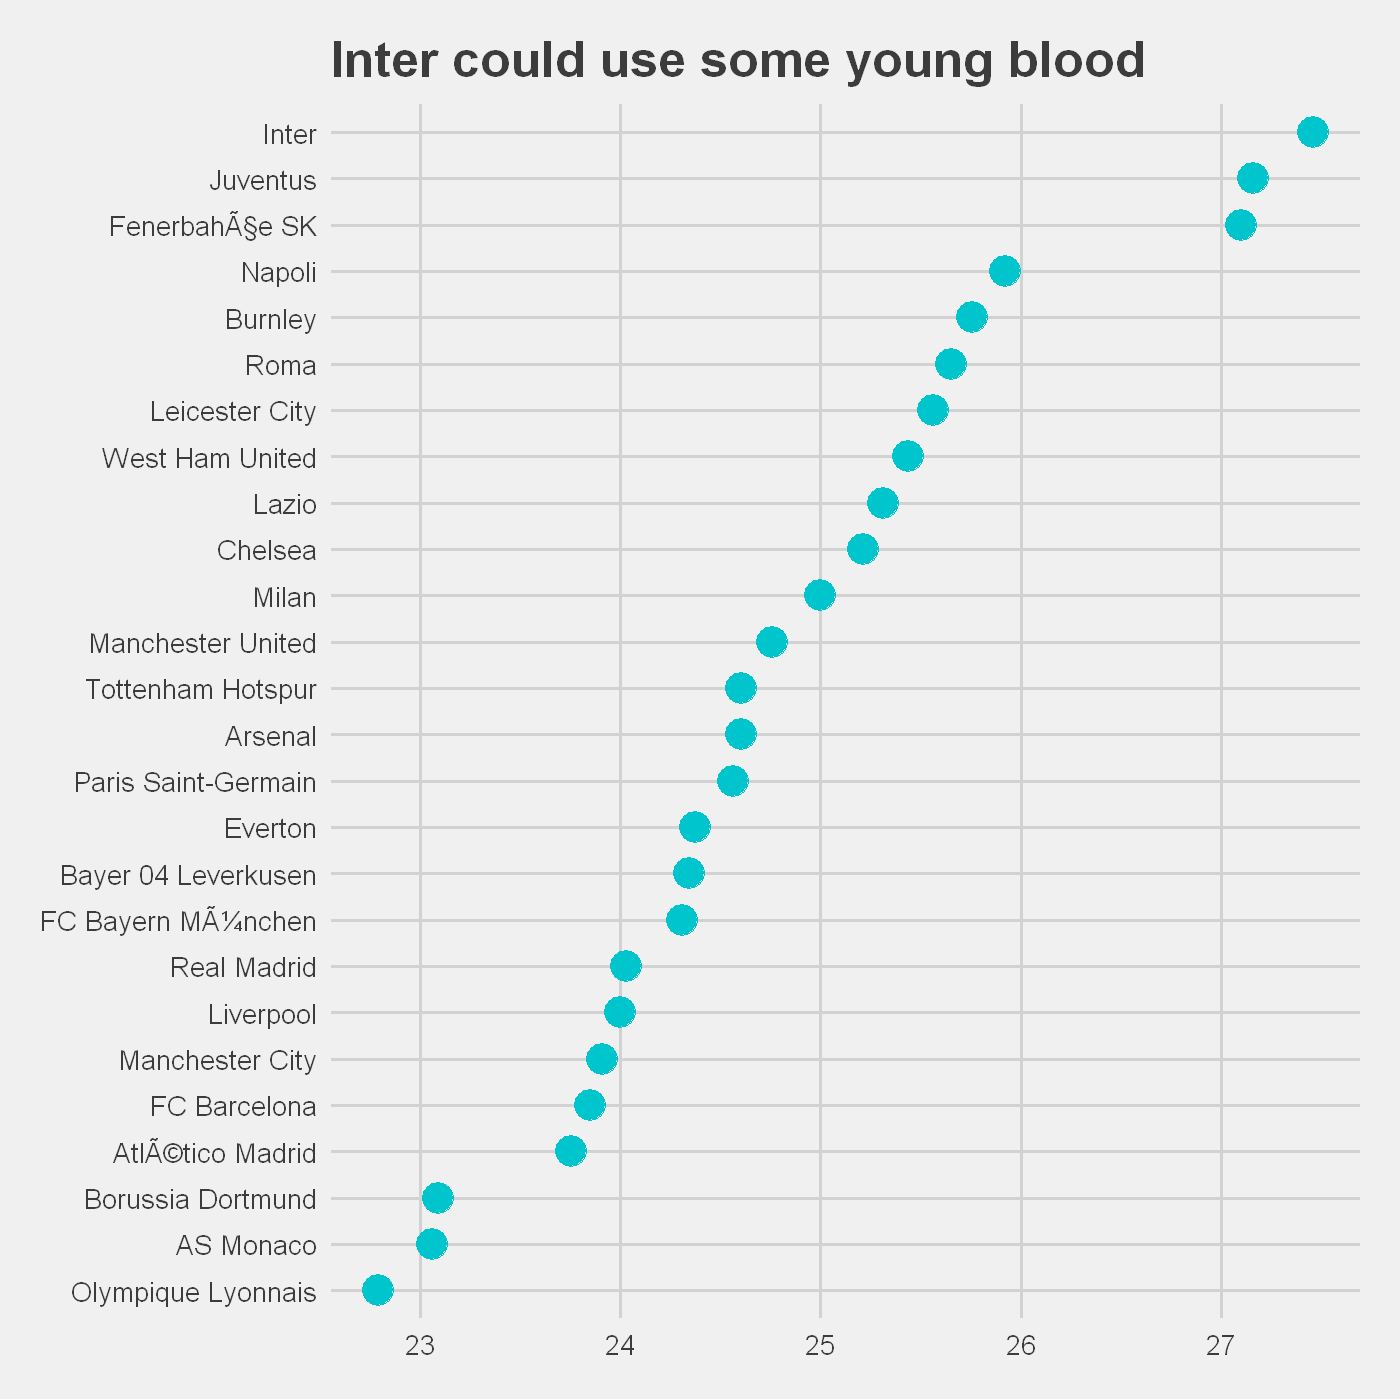

In [31]:
summarise_at(group_by(top_alone, Club),vars(Age),funs(mean(.,na.rm=TRUE))) %>%
  ggplot(aes(fct_reorder(Club, Age), Age)) + 
  geom_point(size = 5, color = "turquoise3") + 
  labs(x = "Ratings", y = NULL, 
       title = "Inter could use some young blood") +
  coord_flip() + theme_fivethirtyeight()

### More fearture engineering

In [24]:
work_rate <- unique(player_data$Work.Rate)
work_rate

[1] Medium/ Medium High/ Low      High/ Medium   High/ High     Medium/ High  
[6] Medium/ Low    Low/ High      Low/ Medium    Low/ Low      
10 Levels:  High/ High High/ Low High/ Medium Low/ High ... Medium/ Medium

In [25]:
player_data <- player_data %>% 
                    separate(Work.Rate, c('WorkRate1', 'WorkRate2'), "/", convert = TRUE) 

In [54]:
colnames(player_data)

[1] "ï..ID"                    "Name"                    
 [3] "Age"                      "Nationality"             
 [5] "Overall"                  "Potential"               
 [7] "Club"                     "Special"                 
 [9] "Preferred.Foot"           "International.Reputation"
[11] "Weak.Foot"                "Skill.Moves"             
[13] "WorkRate1"                "WorkRate2"               
[15] "Body.Type"                "Position"                
[17] "Jersey.Number"            "Joined"                  
[19] "Loaned.From"              "Contract.Valid.Until"    
[21] "Weight"                   "LS"                      
[23] "ST"                       "RS"                      
[25] "LW"                       "LF"                      
[27] "CF"                       "RF"                      
[29] "RW"                       "LAM"                     
[31] "CAM"                      "RAM"                     
[33] "LM"                       "LCM"                     
[35] "CM"                       "RCM"                     
[37] "RM"                       "LWB"                     
[39] "LDM"                      "CDM"                     
[41] "RDM"                      "RWB"                     
[43] "LB"                       "LCB"                     
[45] "CB"                       "RCB"                     
[47] "RB"                       "Crossing"                
[49] "Finishing"                "HeadingAccuracy"         
[51] "ShortPassing"             "Volleys"                 
[53] "Dribbling"                "Curve"                   
[55] "FKAccuracy"               "LongPassing"             
[57] "BallControl"              "Acceleration"            
[59] "SprintSpeed"              "Agility"                 
[61] "Reactions"                "Balance"                 
[63] "ShotPower"                "Jumping"                 
[65] "Stamina"                  "Strength"                
[67] "LongShots"                "Aggression"              
[69] "Interceptions"            "Positioning"             
[71] "Vision"                   "Penalties"               
[73] "Composure"                "Marking"                 
[75] "StandingTackle"           "SlidingTackle"           
[77] "GKDiving"                 "GKHandling"              
[79] "GKKicking"                "GKPositioning"           
[81] "GKReflexes"               "Release.Clause"          
[83] "ValueEuros"               "WageEuros"               
[85] "PositionGroup"            "AgeGroup"                
[87] "Height_cm"

In [26]:
player_features <- player_data %>% dplyr::select(Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling,
                                                 Curve, FKAccuracy, LongPassing, Jumping, BallControl, Acceleration,
                                                 SprintSpeed, Agility, Reactions, Balance, ShotPower, Stamina, Strength, 
                                                 LongShots, Aggression, Interceptions, Positioning, Vision, Penalties,
                                                 Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling,
                                                 GKKicking, GKPositioning, GKReflexes, PositionGroup)
                                    

In [157]:
head(player_features)
dim(player_features)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,Jumping,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,PositionGroup
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,84,95,70,90,86,97,93,94,87,68,...,96,33,28,26,6,11,15,14,8,FWD
2,84,94,89,81,87,88,81,76,77,95,...,95,28,31,23,7,11,15,14,11,FWD
3,79,87,62,84,84,96,88,87,78,61,...,94,27,24,33,9,9,15,15,11,FWD
4,17,13,21,50,13,18,21,19,51,67,...,68,15,21,13,90,85,87,88,94,GK
5,93,82,55,92,82,86,85,83,91,63,...,88,68,58,51,15,13,5,10,13,MID
6,81,84,61,89,80,95,83,79,83,56,...,91,34,27,22,11,12,6,8,8,FWD


[1] 18147    35

## Machine Learning

### 1. Classification problem -- predicting the position of players

In [158]:
set.seed(20002020)
train_size = 0.7
train_position <- createDataPartition(y = player_features$PositionGroup,
                                  p = train_size,
                                  list = F,
                                  time = 1)

position_train <- player_features[train_position,]
position_test <- player_features[-train_position,]

In [159]:
tail(position_train)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,Jumping,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,PositionGroup
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
18140,31,31,41,51,26,46,35,31,55,57,...,40,48,49,49,7,7,9,14,15,MID
18142,22,23,45,25,27,21,21,27,27,74,...,43,44,47,53,9,10,9,11,13,DEF
18143,34,38,40,49,25,42,30,34,45,55,...,45,40,48,47,10,13,7,8,9,MID
18145,25,40,46,38,38,45,38,27,28,60,...,41,32,13,11,6,5,10,6,13,FWD
18146,44,50,39,42,40,51,34,32,32,42,...,46,20,25,27,14,6,14,8,9,FWD
18147,41,34,46,48,30,43,40,34,44,62,...,43,40,43,50,10,15,9,12,9,MID


In [160]:
skim(position_train)

-- Data Summary ------------------------
                           Values        
Name                       position_train
Number of rows             12705         
Number of columns          35            
_______________________                  
Column type frequency:                   
  factor                   1             
  numeric                  34            
________________________                 
Group variables            None          

-- Variable type: factor -------------------------------------------------------
# A tibble: 1 x 6
  skim_variable n_missing complete_rate ordered n_unique
* <chr>             <int>         <dbl> <lgl>      <int>
1 PositionGroup         0             1 FALSE          4
  top_counts                               
* <chr>                                    
1 MID: 4787, DEF: 4107, FWD: 2393, GK: 1418

-- Variable type: numeric ------------------------------------------------------
# A tibble: 34 x 11
   skim_variable   n_missing compl

In [161]:
position_recipe <- recipe(PositionGroup ~., data = position_train) %>%
                    step_nzv(all_predictors())
position_prepare <- prep(position_recipe, position_train)
position_clean_train <- bake(position_prepare, position_train)

In [162]:
skim(position_clean_train)

-- Data Summary ------------------------
                           Values              
Name                       position_clean_train
Number of rows             12705               
Number of columns          35                  
_______________________                        
Column type frequency:                         
  factor                   1                   
  numeric                  34                  
________________________                       
Group variables            None                

-- Variable type: factor -------------------------------------------------------
# A tibble: 1 x 6
  skim_variable n_missing complete_rate ordered n_unique
* <chr>             <int>         <dbl> <lgl>      <int>
1 PositionGroup         0             1 FALSE          4
  top_counts                               
* <chr>                                    
1 MID: 4787, DEF: 4107, FWD: 2393, GK: 1418

-- Variable type: numeric -------------------------------------------------

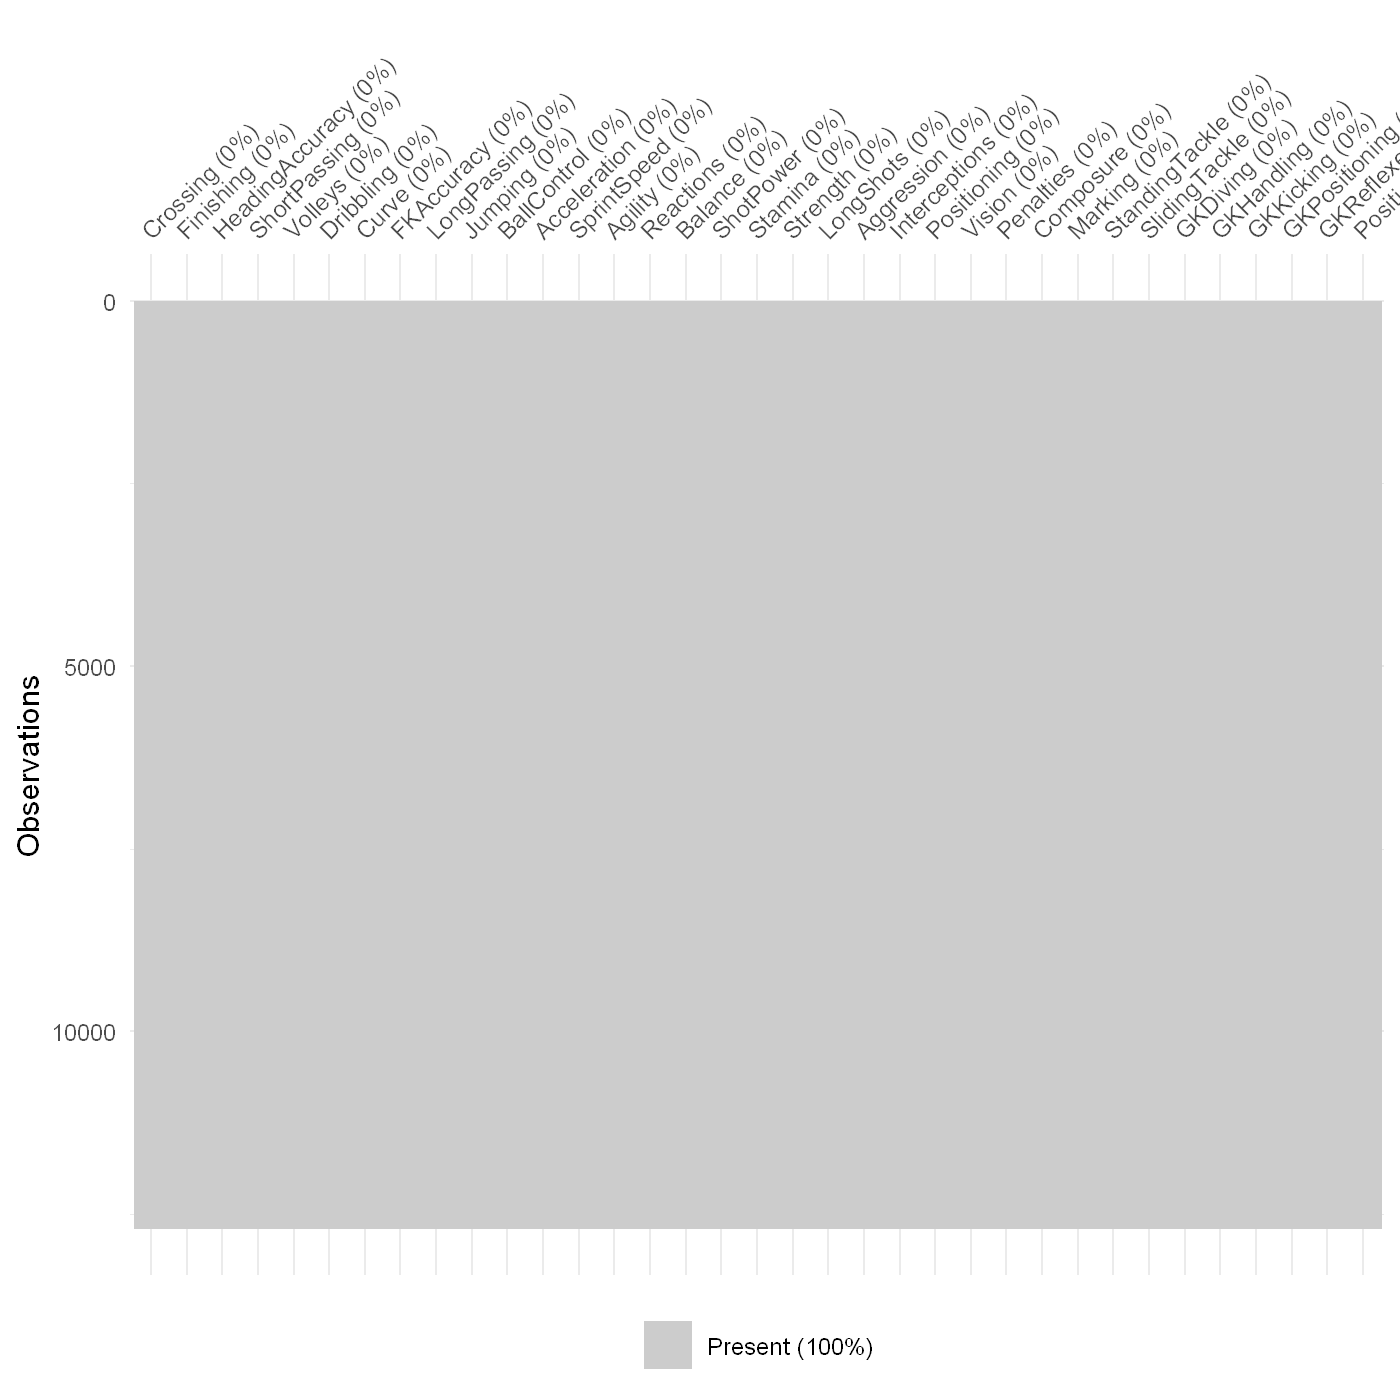

In [163]:
vis_miss(position_train)

In [164]:
position_recipe_test <- recipe(PositionGroup ~., data = position_test)

position_prepare_test <- prep(position_recipe_test, position_test)
position_clean_test <- bake(position_prepare_test, position_test)

In [165]:
fitControl <- trainControl(method = "cv",
                          savePredictions = "final",
                          index = createFolds(position_clean_train$PositionGroup, k = 10, returnTrain = T))

In [168]:
model_list1 <- caretList(
                        PositionGroup ~ .,
                        data = position_clean_train,
                        trControl = fitControl,
                        methodList = c("glmnet","svmRadial", "ranger", "rpart"))

In [169]:
model_list1

$glmnet
glmnet 

12705 samples
   34 predictor
    4 classes: 'GK', 'DEF', 'MID', 'FWD' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11435, 11434, 11435, 11434, 11433, 11436, ... 
Resampling results across tuning parameters:

  alpha  lambda        Accuracy   Kappa    
  0.10   0.0006144477  0.8765043  0.8244711
  0.10   0.0061444767  0.8746156  0.8217439
  0.10   0.0614447668  0.8558831  0.7945060
  0.55   0.0006144477  0.8773703  0.8257260
  0.55   0.0061444767  0.8740639  0.8209415
  0.55   0.0614447668  0.8413986  0.7733139
  1.00   0.0006144477  0.8765830  0.8245872
  1.00   0.0061444767  0.8710727  0.8166888
  1.00   0.0614447668  0.8340002  0.7621393

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were alpha = 0.55 and lambda = 0.0006144477.

$svmRadial
Support Vector Machines with Radial Basis Function Kernel 

12705 samples
   34 predictor
    4 classes: 'GK', 'DEF', 'MID', 'FWD'

In [174]:
glmCM <- confusionMatrix(model_list1$glmnet)
glmCM

svmrCM <- confusionMatrix(model_list1$svmRadial)
svmrCM

rpartCM <- confusionMatrix(model_list1$rpart)
rpartCM


Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction   GK  DEF  MID  FWD
       GK  11.2  0.0  0.0  0.0
       DEF  0.0 29.7  2.7  0.1
       MID  0.0  2.6 32.1  3.9
       FWD  0.0  0.0  2.9 14.8
                            
 Accuracy (average) : 0.8774


Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction   GK  DEF  MID  FWD
       GK  11.2  0.0  0.0  0.0
       DEF  0.0 30.0  2.3  0.2
       MID  0.0  2.3 33.5  4.9
       FWD  0.0  0.0  1.9 13.8
                           
 Accuracy (average) : 0.884


Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction   GK  DEF  MID  FWD
       GK  11.2  0.0  0.0  0.0
       DEF  0.0 30.7 17.6  0.6
       MID  0.0  1.5 17.6 15.2
       FWD  0.0  0.1  2.5  3.1
                            
 Accuracy (average) : 0.6253


### Goalkeeper class was well predicted

In [170]:
dt_model_tune <- train(PositionGroup ~ .,
                  data = position_clean_train,
                 method = "rpart",
                 tuneGrid = expand.grid(cp = seq(0,0.002, by = 0.0001)),
                 metric = "Accuracy",
                 trControl = fitControl)

In [171]:
dt_model_tune

CART 

12705 samples
   34 predictor
    4 classes: 'GK', 'DEF', 'MID', 'FWD' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11435, 11434, 11435, 11434, 11433, 11436, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0000  0.8345540  0.7652288
  0.0001  0.8388049  0.7711745
  0.0002  0.8424251  0.7760888
  0.0003  0.8466741  0.7818034
  0.0004  0.8495863  0.7859478
  0.0005  0.8503714  0.7870766
  0.0006  0.8502145  0.7868475
  0.0007  0.8497425  0.7861578
  0.0008  0.8492701  0.7853849
  0.0009  0.8481682  0.7838712
  0.0010  0.8486401  0.7844445
  0.0011  0.8484821  0.7843088
  0.0012  0.8465142  0.7817064
  0.0013  0.8466715  0.7820298
  0.0014  0.8465929  0.7819235
  0.0015  0.8458057  0.7808559
  0.0016  0.8443094  0.7787141
  0.0017  0.8426555  0.7761041
  0.0018  0.8424193  0.7756771
  0.0019  0.8418683  0.7748798
  0.0020  0.8408449  0.7733214

Accuracy was used to select the optimal model using the larges

### Tuning made dt model a lot better

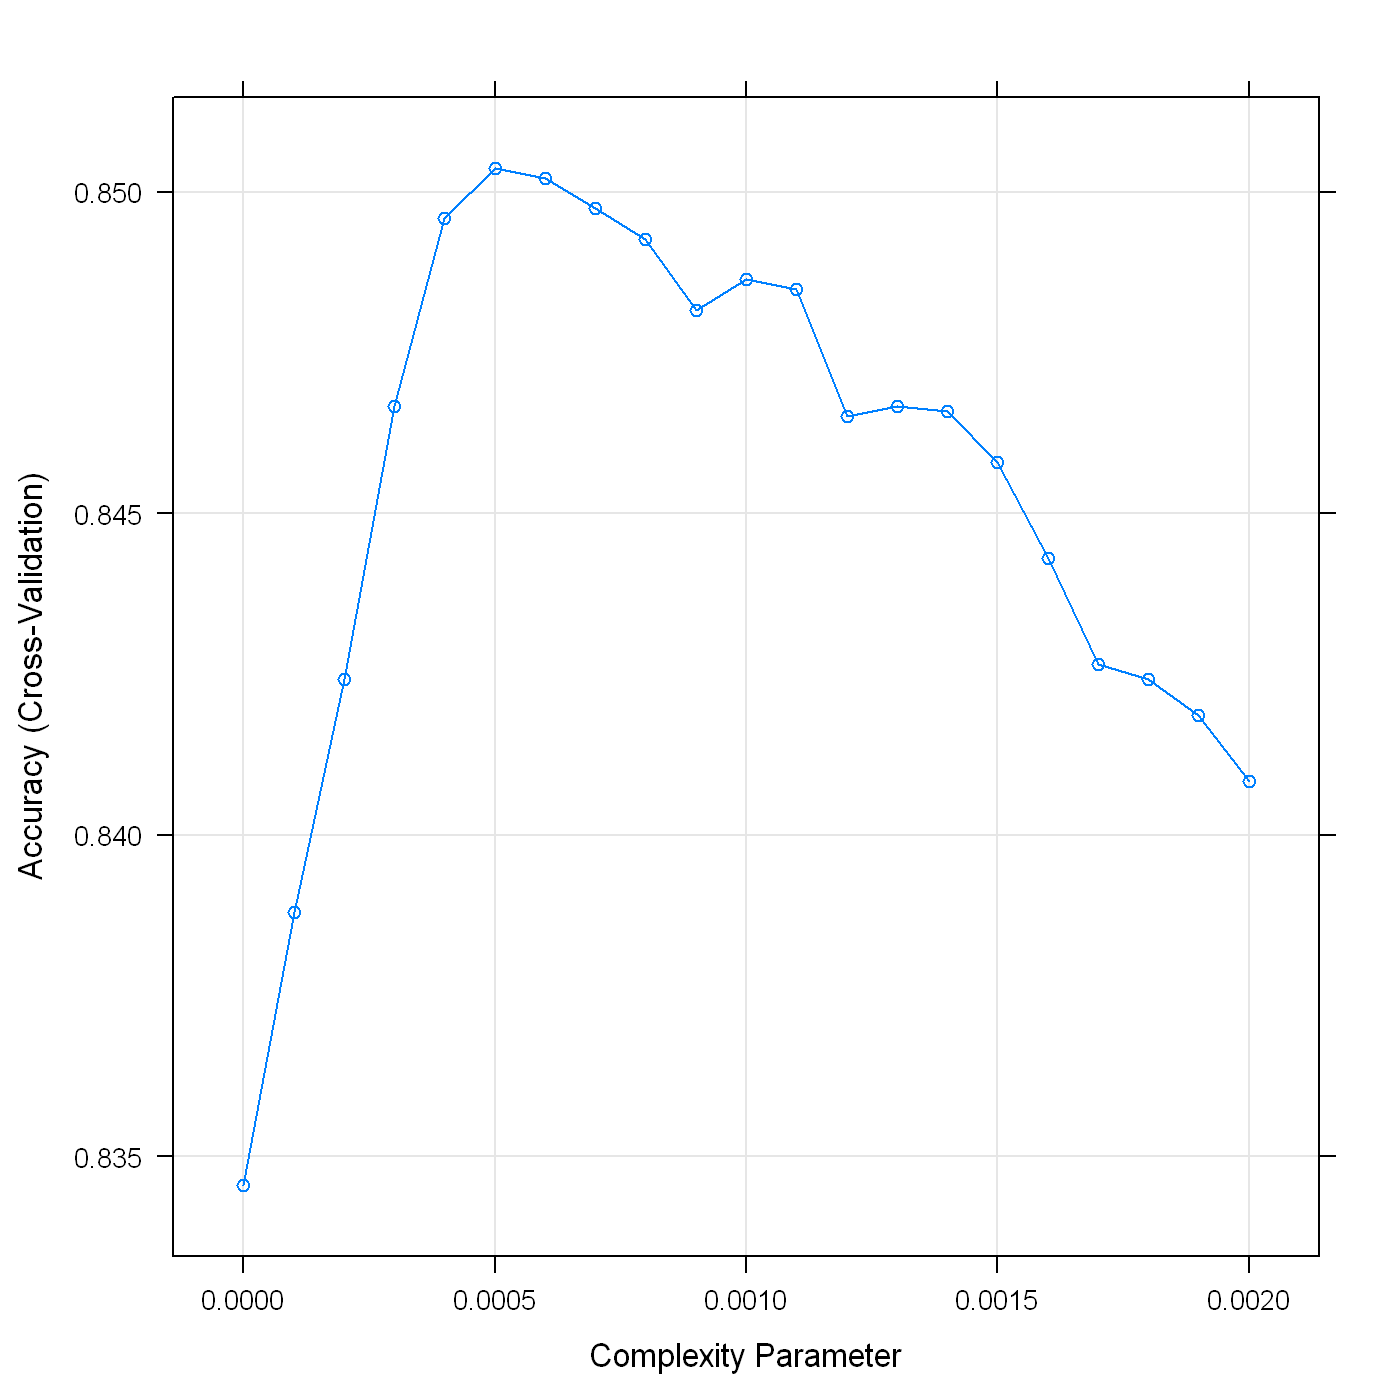

In [172]:
plot(dt_model_tune)

In [175]:
glmnet_grid = expand.grid(alpha = c(0, 0.2, 0.6, 0.9), lambda = seq(0.00005, 0.0006, by = 0.0001))
svmr_grid = expand.grid(C = c(0.25, 0.5, 1, 2, 5, 10), sigma = c(0.01926231))
ranger_grid = expand.grid(mtry = c(20, 24, 28, 32, 36, 40, 46, 50, 56, 64), splitrule = c("extratrees"), min.node.size = 1)

In [176]:
model_list_tune <- caretList(
                        PositionGroup ~ .,
                        data = position_clean_train,
                        trControl = fitControl,
                        #methodList = c("glmnet","svmRadial", "ranger"),
                        tuneList = list(
                        glmnet = caretModelSpec(method = "glmnet", tuneGrid = glmnet_grid),
                        svmr = caretModelSpec(method = "svmRadial", tuneGrid = svmr_grid),
                        rangr = caretModelSpec(method = "ranger", tuneGrid = ranger_grid)))

Warning message:
"model fit failed for Fold01: mtry=36, splitrule=extratrees, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
"
Warning message:
"model fit failed for Fold01: mtry=40, splitrule=extratrees, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
"
Warning message:
"model fit failed for Fold01: mtry=46, splitrule=extratrees, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
"
Warning message:
"model fit failed for Fold01: mtry=50, splitrule=extratrees, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
"
Warning message:
"model fit failed for Fold01: mtry=56, splitrule=extratrees, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  :

Warning message:
"model fit failed for Fold07: mtry=56, splitrule=extratrees, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
"
Warning message:
"model fit failed for Fold07: mtry=64, splitrule=extratrees, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
"
Warning message:
"model fit failed for Fold08: mtry=36, splitrule=extratrees, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
"
Warning message:
"model fit failed for Fold08: mtry=40, splitrule=extratrees, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  : 
  User interrupt or internal error.
"
Warning message:
"model fit failed for Fold08: mtry=46, splitrule=extratrees, min.node.size=1 Error in ranger::ranger(dependent.variable.name = ".outcome", data = x,  :

In [177]:
model_list_tune

$glmnet
glmnet 

12705 samples
   34 predictor
    4 classes: 'GK', 'DEF', 'MID', 'FWD' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11435, 11434, 11435, 11434, 11433, 11436, ... 
Resampling results across tuning parameters:

  alpha  lambda   Accuracy   Kappa    
  0.0    0.00005  0.8680032  0.8121288
  0.0    0.00015  0.8680032  0.8121288
  0.0    0.00025  0.8680032  0.8121288
  0.0    0.00035  0.8680032  0.8121288
  0.0    0.00045  0.8680032  0.8121288
  0.0    0.00055  0.8680032  0.8121288
  0.2    0.00005  0.8772916  0.8256170
  0.2    0.00015  0.8772916  0.8256170
  0.2    0.00025  0.8772127  0.8255043
  0.2    0.00035  0.8773702  0.8257200
  0.2    0.00045  0.8773704  0.8257062
  0.2    0.00055  0.8768192  0.8249228
  0.6    0.00005  0.8771339  0.8253891
  0.6    0.00015  0.8772127  0.8254926
  0.6    0.00025  0.8776853  0.8261597
  0.6    0.00035  0.8776854  0.8261532
  0.6    0.00045  0.8777641  0.8262782
  0.6    0.00055  0.8774488  0.82

#### Tuning did not really improve svm, glmnet and random forest

### Summary

In [178]:
position_model_results <- tibble(Model = c("Decision_Tree", "svmRadial", "Ranger", "glmnet"),
                       Training_Accuracy_default = c(0.62, 0.88, 0.88, 0.87),
                       Training_Accuracy_after_tuning  = c(0.85, 0.88, 0.88, 0.87))
position_model_results

Model,Training_Accuracy_default,Training_Accuracy_after_tuning
<chr>,<dbl>,<dbl>
Decision_Tree,0.62,0.85
svmRadial,0.88,0.88
Ranger,0.88,0.88
glmnet,0.87,0.87


### Feature selection

In [107]:
fitControl <- trainControl(method = "cv", number = 10, savePredictions = T)

In [153]:
rpart_lc_data <- learning_curve_dat(
                                dat = position_clean_train,
                                outcome = "PositionGroup",
                                test_prop = 0.3,
                                method = "rpart",
                                tuneGrid = expand.grid(cp = c(0.0004)),
                                trControl = fitControl)

Training for 10% (n = 889)
Training for 20% (n = 1779)
Training for 30% (n = 2668)
Training for 40% (n = 3558)
Training for 50% (n = 4447)
Training for 60% (n = 5337)
Training for 70% (n = 6226)
Training for 80% (n = 7116)
Training for 90% (n = 8005)
Training for 100% (n = 8895)


`geom_smooth()` using formula 'y ~ x'



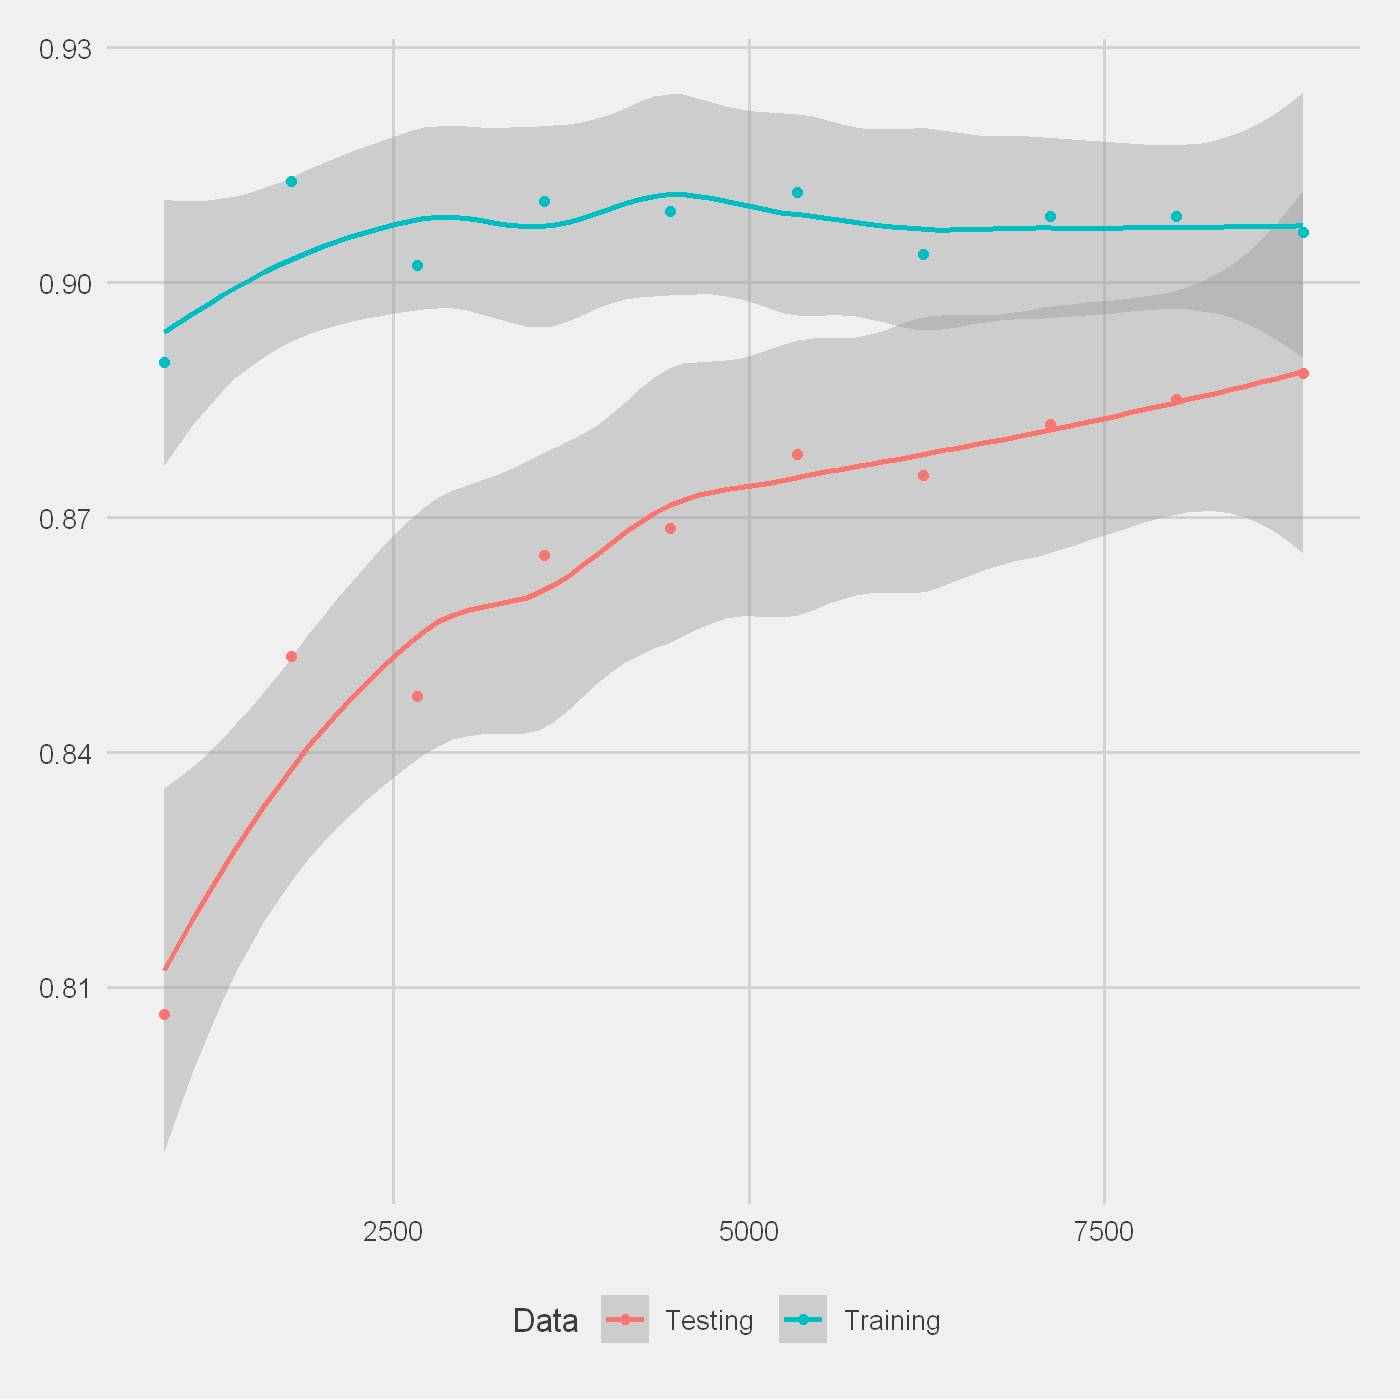

In [155]:
ggplot(filter(rpart_lc_data, Data != "Resampling"), aes(x = Training_Size, y = Accuracy, color = Data)) +
    geom_smooth(method = loess, span = 0.8) + 
    geom_point() +
    theme_fivethirtyeight()

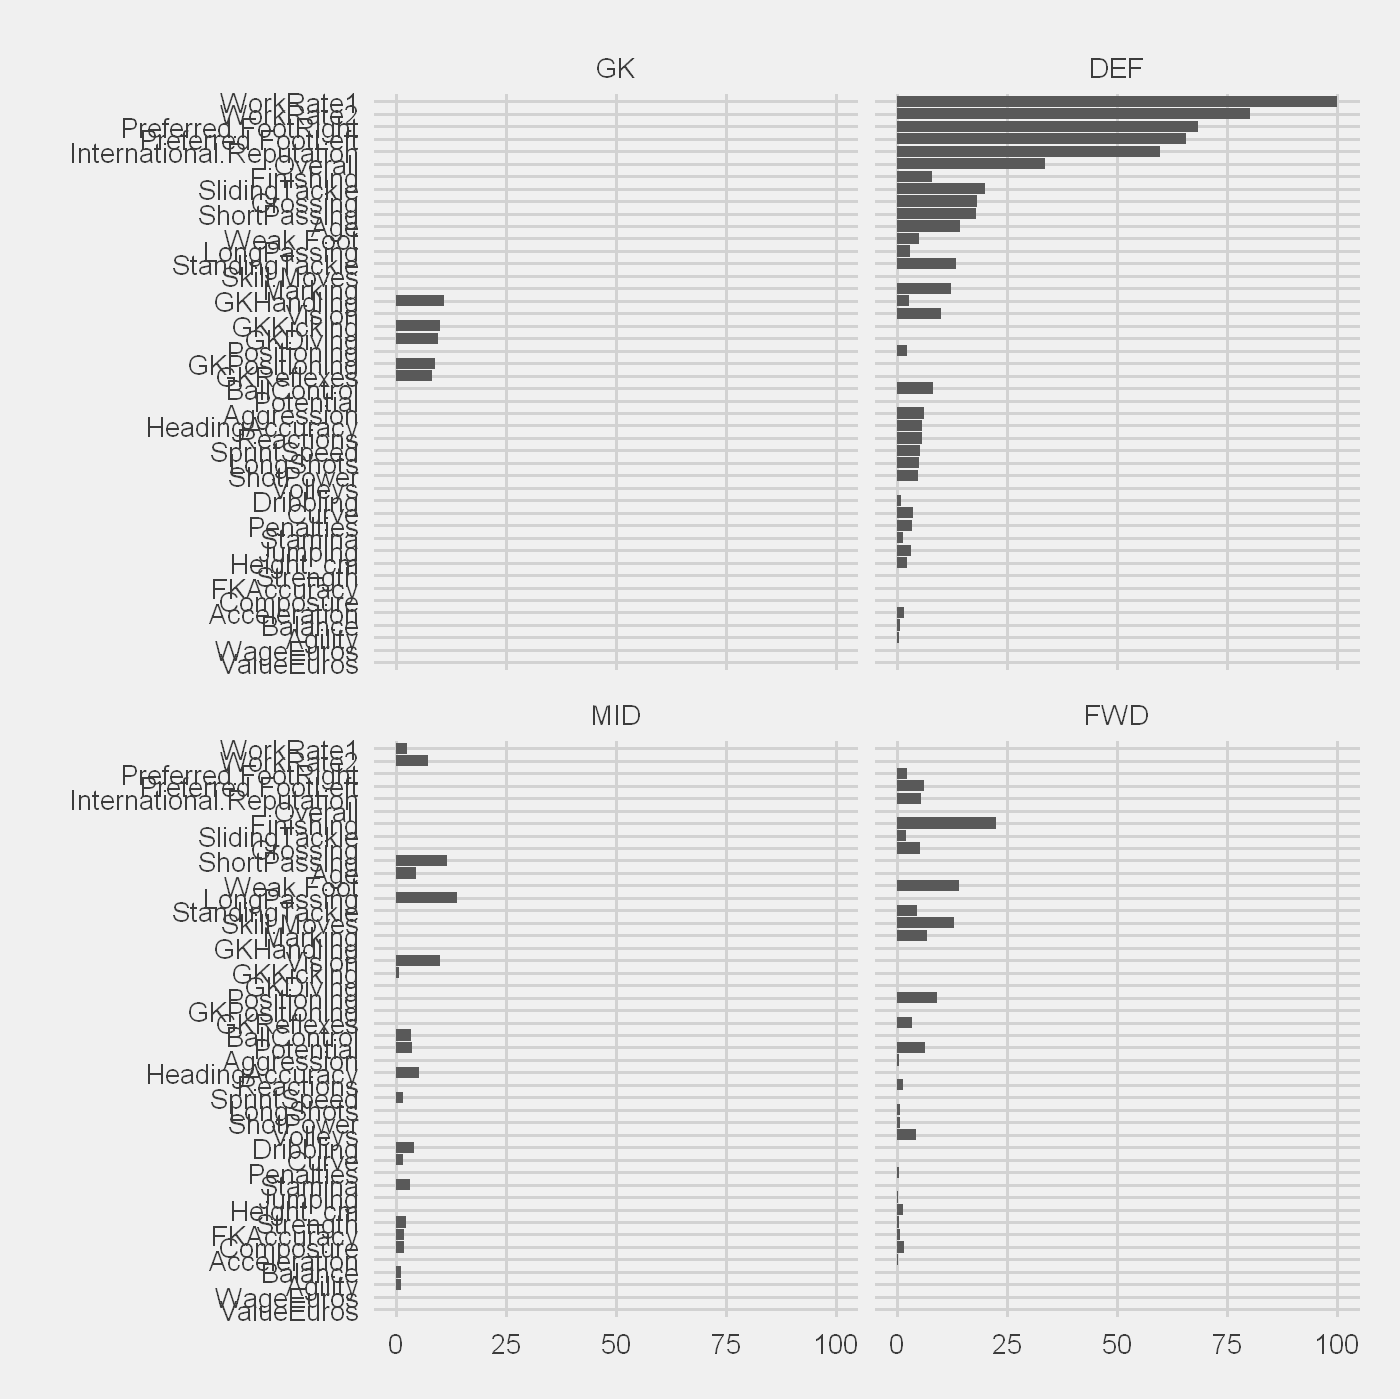

In [87]:
glmnet_model_imp <- varImp(model_list_tune$glmnet)
ggplot(data= glmnet_model_imp, aes(x = Improtance, y = feature)) + theme_fivethirtyeight()

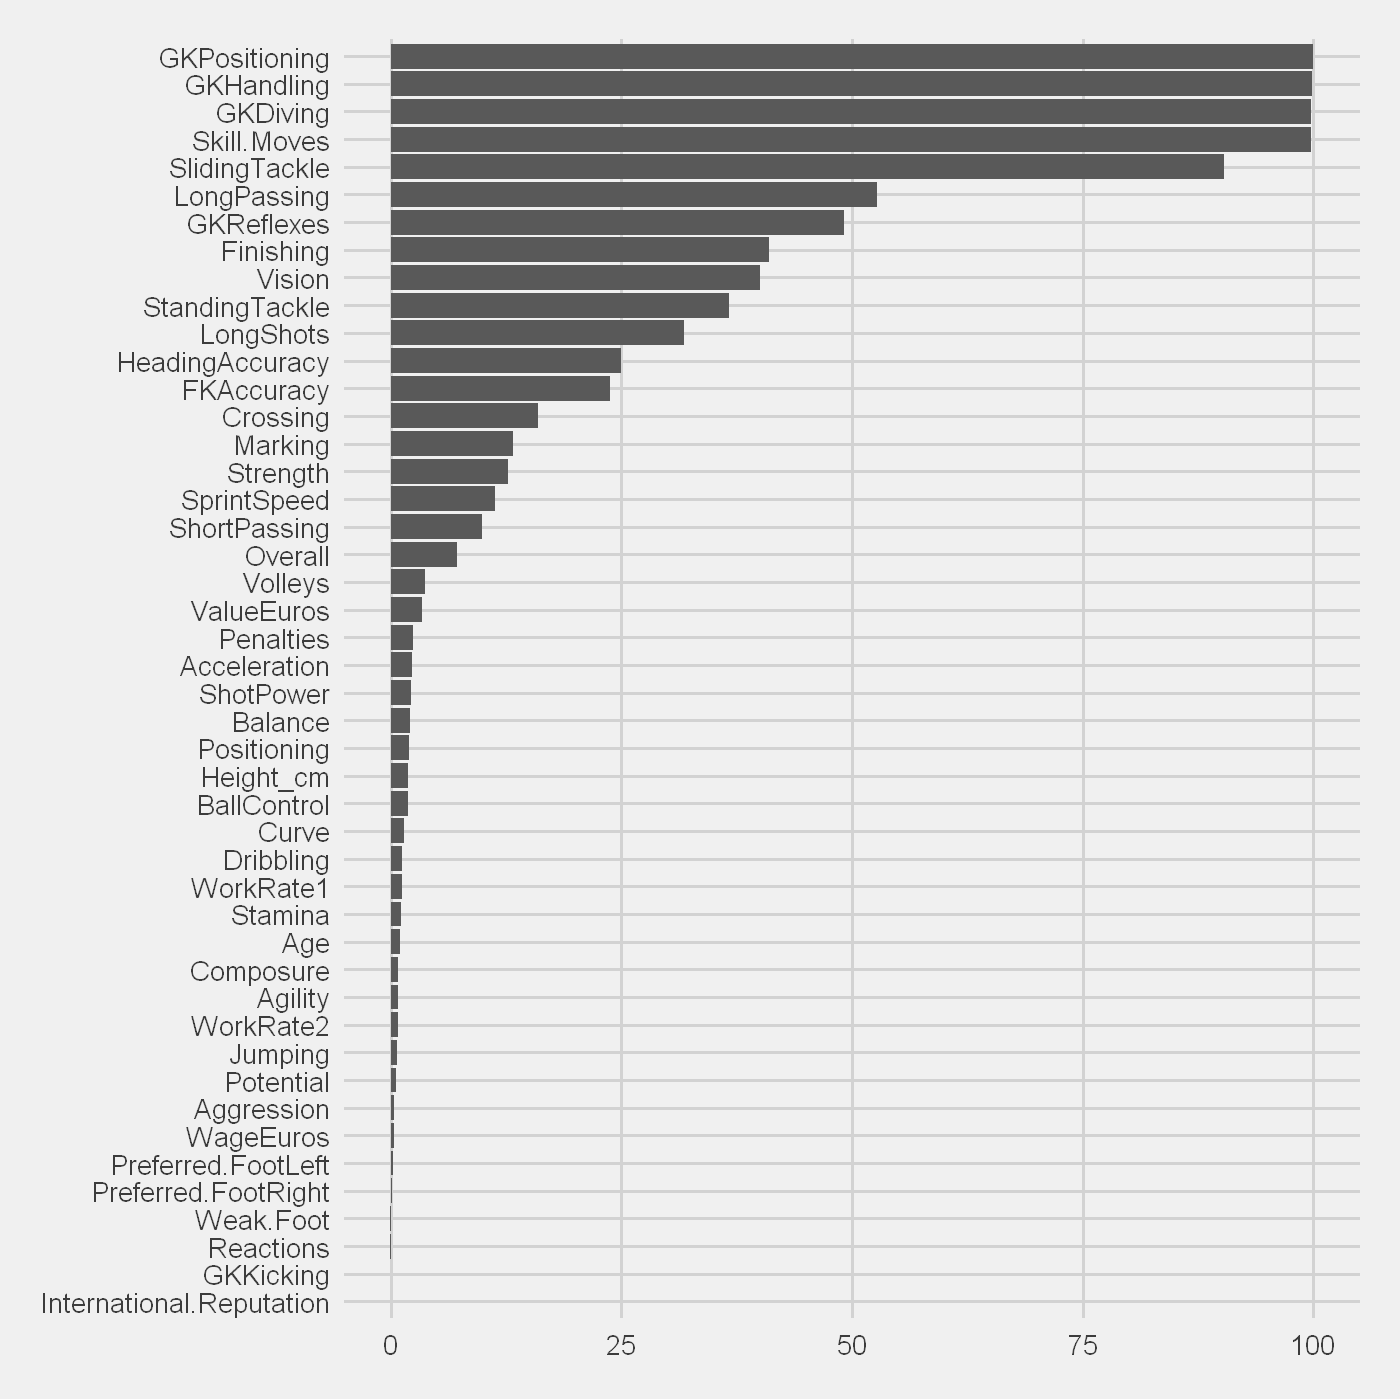

In [156]:
dt_model_imp <- varImp(dt_model_tune)
ggplot(data= dt_model_imp, aes(x = Improtance, y = feature)) + theme_fivethirtyeight()

In [157]:
dtCM <- confusionMatrix(dt_model_tune)
dtCM

Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction   GK  DEF  MID  FWD
       GK  11.2  0.0  0.0  0.0
       DEF  0.0 28.9  3.7  0.1
       MID  0.0  3.4 30.8  4.6
       FWD  0.0  0.0  3.2 14.1
                            
 Accuracy (average) : 0.8492


In [170]:
colnames(position_clean_test)

[1] "Age"                      "Overall"                 
 [3] "Potential"                "Preferred.Foot"          
 [5] "International.Reputation" "Weak.Foot"               
 [7] "Skill.Moves"              "WorkRate1"               
 [9] "WorkRate2"                "Crossing"                
[11] "Finishing"                "HeadingAccuracy"         
[13] "ShortPassing"             "Volleys"                 
[15] "Dribbling"                "Curve"                   
[17] "FKAccuracy"               "LongPassing"             
[19] "BallControl"              "Acceleration"            
[21] "SprintSpeed"              "Agility"                 
[23] "Reactions"                "Balance"                 
[25] "ShotPower"                "Jumping"                 
[27] "Stamina"                  "Strength"                
[29] "LongShots"                "Aggression"              
[31] "Interceptions"            "Positioning"             
[33] "Vision"                   "Penalties"               
[35] "Composure"                "Marking"                 
[37] "StandingTackle"           "SlidingTackle"           
[39] "GKDiving"                 "GKHandling"              
[41] "GKKicking"                "GKPositioning"           
[43] "GKReflexes"               "ValueEuros"              
[45] "WageEuros"                "Height_cm"               
[47] "PositionGroup"

In [192]:
position_train_select_feat <- position_clean_train %>% select("GKPositioning", "GKHandling", "GKDiving", "Skill.Moves", 
                                                          "SlidingTackle", "LongPassing", "GKReflexes", "Finishing",
                                                          "Vision", "StandingTackle", "LongShots", "HeadingAccuracy",
                                                          "FKAccuracy", "Crossing", "Marking", "Strength", "SprintSpeed",
                                                          "ShortPassing", "Overall",
                                                          "PositionGroup")
dim(position_train_select_feat)

[1] 12705    20

In [189]:
dt_model_feat_sel <- train(PositionGroup ~ .,
                  data = position_train_select_feat,
                 method = "rpart",
                tuneGrid = expand.grid(cp = seq(0,0.002, by = 0.0001)),
                 metric = "Accuracy",
                 trControl = fitControl)

In [190]:
dt_model_feat_sel

CART 

12705 samples
   19 predictor
    4 classes: 'GK', 'DEF', 'MID', 'FWD' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11433, 11435, 11435, 11434, 11433, 11435, ... 
Resampling results across tuning parameters:

  cp      Accuracy   Kappa    
  0.0000  0.8417149  0.7754081
  0.0001  0.8447060  0.7796195
  0.0002  0.8480918  0.7842100
  0.0003  0.8499806  0.7867745
  0.0004  0.8512390  0.7885113
  0.0005  0.8501372  0.7869450
  0.0006  0.8493495  0.7858305
  0.0007  0.8469887  0.7824366
  0.0008  0.8422669  0.7756481
  0.0009  0.8425823  0.7761234
  0.0010  0.8419538  0.7752405
  0.0011  0.8419535  0.7753276
  0.0012  0.8393548  0.7716967
  0.0013  0.8399055  0.7725688
  0.0014  0.8410076  0.7740433
  0.0015  0.8383315  0.7700143
  0.0016  0.8369929  0.7679061
  0.0017  0.8354188  0.7654943
  0.0018  0.8355765  0.7655915
  0.0019  0.8347900  0.7643478
  0.0020  0.8341605  0.7634717

Accuracy was used to select the optimal model using the larges

In [195]:
ranger_model_feat_sel <- train(PositionGroup ~ .,
                  data = position_train_select_feat,
                 method = "ranger",
                 #tuneGrid = expand.grid(cp = seq(0,0.002, by = 0.0001)),
                 metric = "Accuracy",
                 trControl = fitControl)

ranger_model_feat_sel

Random Forest 

12705 samples
   19 predictor
    4 classes: 'GK', 'DEF', 'MID', 'FWD' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11433, 11435, 11435, 11434, 11433, 11435, ... 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
   2    gini        0.8813073  0.8309392
   2    extratrees  0.8776086  0.8253618
  10    gini        0.8818587  0.8318273
  10    extratrees  0.8828039  0.8330172
  19    gini        0.8790238  0.8278144
  19    extratrees  0.8828037  0.8330732

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 10, splitrule = extratrees
 and min.node.size = 1.

In [196]:
glmnet_model_feat_sel <- train(PositionGroup ~ .,
                  data = position_train_select_feat,
                 method = "glmnet",
                 #tuneGrid = expand.grid(cp = seq(0,0.002, by = 0.0001)),
                 metric = "Accuracy",
                 trControl = fitControl)

glmnet_model_feat_sel

glmnet 

12705 samples
   19 predictor
    4 classes: 'GK', 'DEF', 'MID', 'FWD' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11433, 11435, 11435, 11434, 11433, 11435, ... 
Resampling results across tuning parameters:

  alpha  lambda        Accuracy   Kappa    
  0.10   0.0006144477  0.8737526  0.8205174
  0.10   0.0061444767  0.8714706  0.8172395
  0.10   0.0614447668  0.8564366  0.7951782
  0.55   0.0006144477  0.8739098  0.8207275
  0.55   0.0061444767  0.8709192  0.8164644
  0.55   0.0614447668  0.8428978  0.7753008
  1.00   0.0006144477  0.8739882  0.8208552
  1.00   0.0061444767  0.8695814  0.8145657
  1.00   0.0614447668  0.8342427  0.7624655

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were alpha = 1 and lambda = 0.0006144477.

In [197]:
svmr_model_feat_sel <- train(PositionGroup ~ .,
                  data = position_train_select_feat,
                 method = "svmRadial",
                 #tuneGrid = expand.grid(cp = seq(0,0.002, by = 0.0001)),
                 metric = "Accuracy",
                 trControl = fitControl)

svmr_model_feat_sel

Support Vector Machines with Radial Basis Function Kernel 

12705 samples
   19 predictor
    4 classes: 'GK', 'DEF', 'MID', 'FWD' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11433, 11435, 11435, 11434, 11433, 11435, ... 
Resampling results across tuning parameters:

  C     Accuracy   Kappa    
  0.25  0.8813094  0.8304236
  0.50  0.8837499  0.8339093
  1.00  0.8845360  0.8350840

Tuning parameter 'sigma' was held constant at a value of 0.07058412
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were sigma = 0.07058412 and C = 1.

In [105]:
position_model_results <- tibble(Model = c("Decision_Tree", "svmRadial", "Ranger", "glmnet"),
                       Training_Accuracy_default = c(0.62, 0.88, 0.88, 0.88),
                       Training_Accuracy_after_tuning  = c(0.849, 0.88, 0.88, 0.88),
                       Training_Accuracy_after_feature_Sele = c(0.84, 0.88, 0.88, 0.87))
position_model_results                  

Model,Training_Accuracy_default,Training_Accuracy_after_tuning,Training_Accuracy_after_feature_Sele
<chr>,<dbl>,<dbl>,<dbl>
Decision_Tree,0.62,0.849,0.84
svmRadial,0.88,0.880,0.88
Ranger,0.88,0.880,0.88
glmnet,0.88,0.880,0.87


### Predicting the test data with the tuned models

In [179]:
dt_preds <- predict(dt_model_tune, position_clean_test)
dt_test_results <- confusionMatrix(dt_preds, position_clean_test$PositionGroup)
dt_test_results

Confusion Matrix and Statistics

          Reference
Prediction   GK  DEF  MID  FWD
       GK   607    0    0    0
       DEF    0 1563  217    5
       MID    0  196 1651  235
       FWD    0    0  183  785

Overall Statistics
                                          
               Accuracy : 0.8464          
                 95% CI : (0.8365, 0.8559)
    No Information Rate : 0.3769          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7817          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: GK Class: DEF Class: MID Class: FWD
Sensitivity             1.0000     0.8886     0.8050     0.7659
Specificity             1.0000     0.9397     0.8729     0.9586
Pos Pred Value          1.0000     0.8756     0.7930     0.8110
Neg Pred Value          1.0000     0.9464     0.8810     0.9464
Prevalence              0.1115     0.3232 

In [180]:
glmnet_preds <- predict(model_list_tune$glmnet, position_clean_test)
glmnet_test_results <- confusionMatrix(glmnet_preds, position_clean_test$PositionGroup)
glmnet_test_results

Confusion Matrix and Statistics

          Reference
Prediction   GK  DEF  MID  FWD
       GK   607    0    0    0
       DEF    0 1601  141    0
       MID    0  157 1743  197
       FWD    0    1  167  828

Overall Statistics
                                          
               Accuracy : 0.8782          
                 95% CI : (0.8692, 0.8867)
    No Information Rate : 0.3769          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.827           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: GK Class: DEF Class: MID Class: FWD
Sensitivity             1.0000     0.9102     0.8498     0.8078
Specificity             1.0000     0.9617     0.8956     0.9620
Pos Pred Value          1.0000     0.9191     0.8312     0.8313
Neg Pred Value          1.0000     0.9573     0.9079     0.9557
Prevalence              0.1115     0.3232 

In [181]:
rangr_preds <- predict(model_list_tune$rangr, position_clean_test)
rangr_test_results <- confusionMatrix(rangr_preds, position_clean_test$PositionGroup)
rangr_test_results

Confusion Matrix and Statistics

          Reference
Prediction   GK  DEF  MID  FWD
       GK   607    0    0    0
       DEF    0 1642  152    3
       MID    0  117 1762  222
       FWD    0    0  137  800

Overall Statistics
                                          
               Accuracy : 0.884           
                 95% CI : (0.8752, 0.8924)
    No Information Rate : 0.3769          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.835           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: GK Class: DEF Class: MID Class: FWD
Sensitivity             1.0000     0.9335     0.8591     0.7805
Specificity             1.0000     0.9579     0.9000     0.9690
Pos Pred Value          1.0000     0.9137     0.8386     0.8538
Neg Pred Value          1.0000     0.9679     0.9135     0.9501
Prevalence              0.1115     0.3232 

### Predicting test data with reduced features

In [199]:
position_test_select_feat <- position_clean_test %>% select("GKPositioning", "GKHandling", "GKDiving", "Skill.Moves", 
                                                          "SlidingTackle", "LongPassing", "GKReflexes", "Finishing",
                                                          "Vision", "StandingTackle", "LongShots", "HeadingAccuracy",
                                                          "FKAccuracy", "Crossing", "Marking", "Strength", "SprintSpeed",
                                                          "ShortPassing", "Overall",
                                                          "PositionGroup")
dim(position_test_select_feat)

[1] 5442   20

In [201]:
dt_preds <- predict(dt_model_feat_sel, position_test_select_feat)
dt_test_results <- confusionMatrix(dt_preds, position_test_select_feat$PositionGroup)
dt_test_results

Confusion Matrix and Statistics

          Reference
Prediction   GK  DEF  MID  FWD
       GK   607    0    0    0
       DEF    0 1570  212    4
       MID    0  189 1669  245
       FWD    0    0  170  776

Overall Statistics
                                          
               Accuracy : 0.8493          
                 95% CI : (0.8395, 0.8587)
    No Information Rate : 0.3769          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7857          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: GK Class: DEF Class: MID Class: FWD
Sensitivity             1.0000     0.8926     0.8137     0.7571
Specificity             1.0000     0.9414     0.8720     0.9615
Pos Pred Value          1.0000     0.8791     0.7936     0.8203
Neg Pred Value          1.0000     0.9483     0.8856     0.9446
Prevalence              0.1115     0.3232 

In [205]:
glmnet_preds <- predict(glmnet_model_feat_sel, position_test_select_feat)
glmnet_test_results <- confusionMatrix(glmnet_preds, position_test_select_feat$PositionGroup)
glmnet_test_results

Confusion Matrix and Statistics

          Reference
Prediction   GK  DEF  MID  FWD
       GK   607    0    0    0
       DEF    0 1586  168    0
       MID    0  172 1723  202
       FWD    0    1  160  823

Overall Statistics
                                          
               Accuracy : 0.8708          
                 95% CI : (0.8616, 0.8796)
    No Information Rate : 0.3769          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8165          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: GK Class: DEF Class: MID Class: FWD
Sensitivity             1.0000     0.9016     0.8401     0.8029
Specificity             1.0000     0.9544     0.8897     0.9635
Pos Pred Value          1.0000     0.9042     0.8216     0.8364
Neg Pred Value          1.0000     0.9531     0.9019     0.9547
Prevalence              0.1115     0.3232 

In [206]:
rangr_preds <- predict(ranger_model_feat_sel, position_test_select_feat)
rangr_test_results <- confusionMatrix(rangr_preds, position_test_select_feat$PositionGroup)
rangr_test_results

Confusion Matrix and Statistics

          Reference
Prediction   GK  DEF  MID  FWD
       GK   607    0    0    0
       DEF    0 1626  151    2
       MID    0  133 1765  233
       FWD    0    0  135  790

Overall Statistics
                                          
               Accuracy : 0.8798          
                 95% CI : (0.8709, 0.8883)
    No Information Rate : 0.3769          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8289          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: GK Class: DEF Class: MID Class: FWD
Sensitivity             1.0000     0.9244     0.8606     0.7707
Specificity             1.0000     0.9585     0.8921     0.9694
Pos Pred Value          1.0000     0.9140     0.8282     0.8541
Neg Pred Value          1.0000     0.9637     0.9136     0.9480
Prevalence              0.1115     0.3232 

In [207]:
svm_preds <- predict(svmr_model_feat_sel, position_test_select_feat)
svm_test_results <- confusionMatrix(svm_preds, position_test_select_feat$PositionGroup)
svm_test_results

Confusion Matrix and Statistics

          Reference
Prediction   GK  DEF  MID  FWD
       GK   607    0    0    0
       DEF    0 1643  139    2
       MID    0  116 1803  249
       FWD    0    0  109  774

Overall Statistics
                                          
               Accuracy : 0.887           
                 95% CI : (0.8783, 0.8953)
    No Information Rate : 0.3769          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8388          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: GK Class: DEF Class: MID Class: FWD
Sensitivity             1.0000     0.9341     0.8791     0.7551
Specificity             1.0000     0.9617     0.8924     0.9753
Pos Pred Value          1.0000     0.9210     0.8316     0.8766
Neg Pred Value          1.0000     0.9683     0.9243     0.9449
Prevalence              0.1115     0.3232 

### Summary

In [103]:
position_model_test <- tibble(Model = c("Decision_Tree", "svmRadial", "Ranger", "glmnet"),
                       Training_Accuracy_after_tuning = c(0.84, 0.88, 0.88, 0.88),
                       Test_Accuracy  = c(0.84, 0.88, 0.87, 0.87))
position_model_test

Model,Training_Accuracy_after_tuning,Test_Accuracy
<chr>,<dbl>,<dbl>
Decision_Tree,0.84,0.84
svmRadial,0.88,0.88
Ranger,0.88,0.87
glmnet,0.88,0.87


## 2. Regression problem - predicting the overall rating of player

In [208]:
set.seed(20002020)
train_size = 0.7
train_position <- createDataPartition(y = player_features$Overall,
                                  p = train_size,
                                  list = F,
                                  time = 1)

overall_train <- player_features[train_position,]
overall_test <- player_features[-train_position,]

In [209]:
overall_recipe <- recipe(Overall ~., data = overall_train) %>%
                    step_integer(matches("WorkRate")) %>%
                    step_nzv(all_predictors())
overall_prepare <- prep(overall_recipe, overall_train)
overall_clean_train <- bake(overall_prepare, overall_train)

In [211]:
overall_recipe_test <- recipe(Overall ~., data = overall_test) %>%
                    step_integer(matches("WorkRate")) %>%
                    step_nzv(all_predictors())
overall_prepare_test <- prep(overall_recipe_test, overall_test)
overall_clean_test <- bake(overall_prepare_test, overall_test)

In [296]:
lm_model <- train(
                    Overall ~ .,
                    data = overall_clean_train,
                    method = "lm",
                    #tuneGrid = expand.grid(C = seq(1,2, by = 0.5)),
                    metric = "RMSE",   
                    trControl = fitControl)

lm_model

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFi

Linear Regression 

12705 samples
   46 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11435, 11433, 11435, 11437, 11435, 11434, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  1.795344  0.9327831  1.403179

Tuning parameter 'intercept' was held constant at a value of TRUE

In [297]:
enet_model <- train(
                    Overall ~ .,
                    data = overall_clean_train,
                    method = "enet",
                    tuneGrid = expand.grid(fraction = seq(0.9,1, by = 0.01), lambda = c(0.0001)),
                    metric = "RMSE",   
                    trControl = fitControl)

enet_model

Elasticnet 

12705 samples
   46 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11435, 11433, 11435, 11437, 11435, 11434, ... 
Resampling results across tuning parameters:

  fraction  RMSE      Rsquared   MAE     
  0.90      1.795682  0.9327589  1.402897
  0.91      1.795536  0.9327688  1.402913
  0.92      1.795471  0.9327731  1.402950
  0.93      1.795530  0.9327691  1.403033
  0.94      1.795501  0.9327712  1.403049
  0.95      1.795432  0.9327763  1.403038
  0.96      1.795379  0.9327804  1.403039
  0.97      1.795341  0.9327832  1.403050
  0.98      1.795321  0.9327848  1.403071
  0.99      1.795320  0.9327849  1.403112
  1.00      1.795336  0.9327838  1.403165

Tuning parameter 'lambda' was held constant at a value of 1e-04
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were fraction = 0.99 and lambda = 1e-04.

In [298]:
earth_model <- train(
                    Overall ~ .,
                    data = overall_clean_train,
                    method = "earth",
                    tuneGrid = expand.grid(nprune = seq(20,25, by = 1), degree = c(1)),
                    metric = "RMSE",   
                    trControl = fitControl)

earth_model

Multivariate Adaptive Regression Spline 

12705 samples
   46 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11435, 11433, 11435, 11437, 11435, 11434, ... 
Resampling results across tuning parameters:

  nprune  RMSE      Rsquared  MAE      
  20      1.212504  0.969142  0.8701509
  21      1.212504  0.969142  0.8701509
  22      1.212504  0.969142  0.8701509
  23      1.212504  0.969142  0.8701509
  24      1.212504  0.969142  0.8701509
  25      1.212504  0.969142  0.8701509

Tuning parameter 'degree' was held constant at a value of 1
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were nprune = 20 and degree = 1.

In [275]:
gbm_model <- train(
                    Overall ~ .,
                    data = overall_clean_train,
                    method = "gbm",
                    tuneGrid = expand.grid(interaction.depth = seq(3,7, by = 1), n.trees = c(150), 
                                          shrinkage = 0.1, n.minobsinnode = 10),
                    metric = "RMSE",   
                    trControl = fitControl)

gbm_model

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       40.9938             nan     0.1000    6.9998
     2       35.3099             nan     0.1000    5.5515
     3       30.4442             nan     0.1000    4.8920
     4       26.4839             nan     0.1000    3.8835
     5       23.1345             nan     0.1000    3.3983
     6       20.1771             nan     0.1000    2.9429
     7       17.6880             nan     0.1000    2.4997
     8       15.5822             nan     0.1000    2.0646
     9       13.8123             nan     0.1000    1.7804
    10       12.2787             nan     0.1000    1.5619
    20        5.0114             nan     0.1000    0.3434
    40        1.8108             nan     0.1000    0.0613
    60        1.1335             nan     0.1000    0.0129
    80        0.8775             nan     0.1000    0.0105
   100        0.7289             nan     0.1000    0.0036
   120        0.6344             nan     0.1000    0.0043
   140        

Stochastic Gradient Boosting 

12705 samples
   46 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11433, 11435, 11435, 11434, 11433, 11435, ... 
Resampling results across tuning parameters:

  interaction.depth  RMSE       Rsquared   MAE      
  3                  0.7672610  0.9878164  0.5656605
  4                  0.7043900  0.9896978  0.5162170
  5                  0.6581711  0.9909916  0.4786887
  6                  0.6221527  0.9919516  0.4548406
  7                  0.5952524  0.9926351  0.4334502

Tuning parameter 'n.trees' was held constant at a value of 150
Tuning
 parameter 'shrinkage' was held constant at a value of 0.1
Tuning
 parameter 'n.minobsinnode' was held constant at a value of 10
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were n.trees = 150, interaction.depth =
 7, shrinkage = 0.1 and n.minobsinnode = 10.

In [284]:
overall_clean_train <- as.data.frame(overall_clean_train)

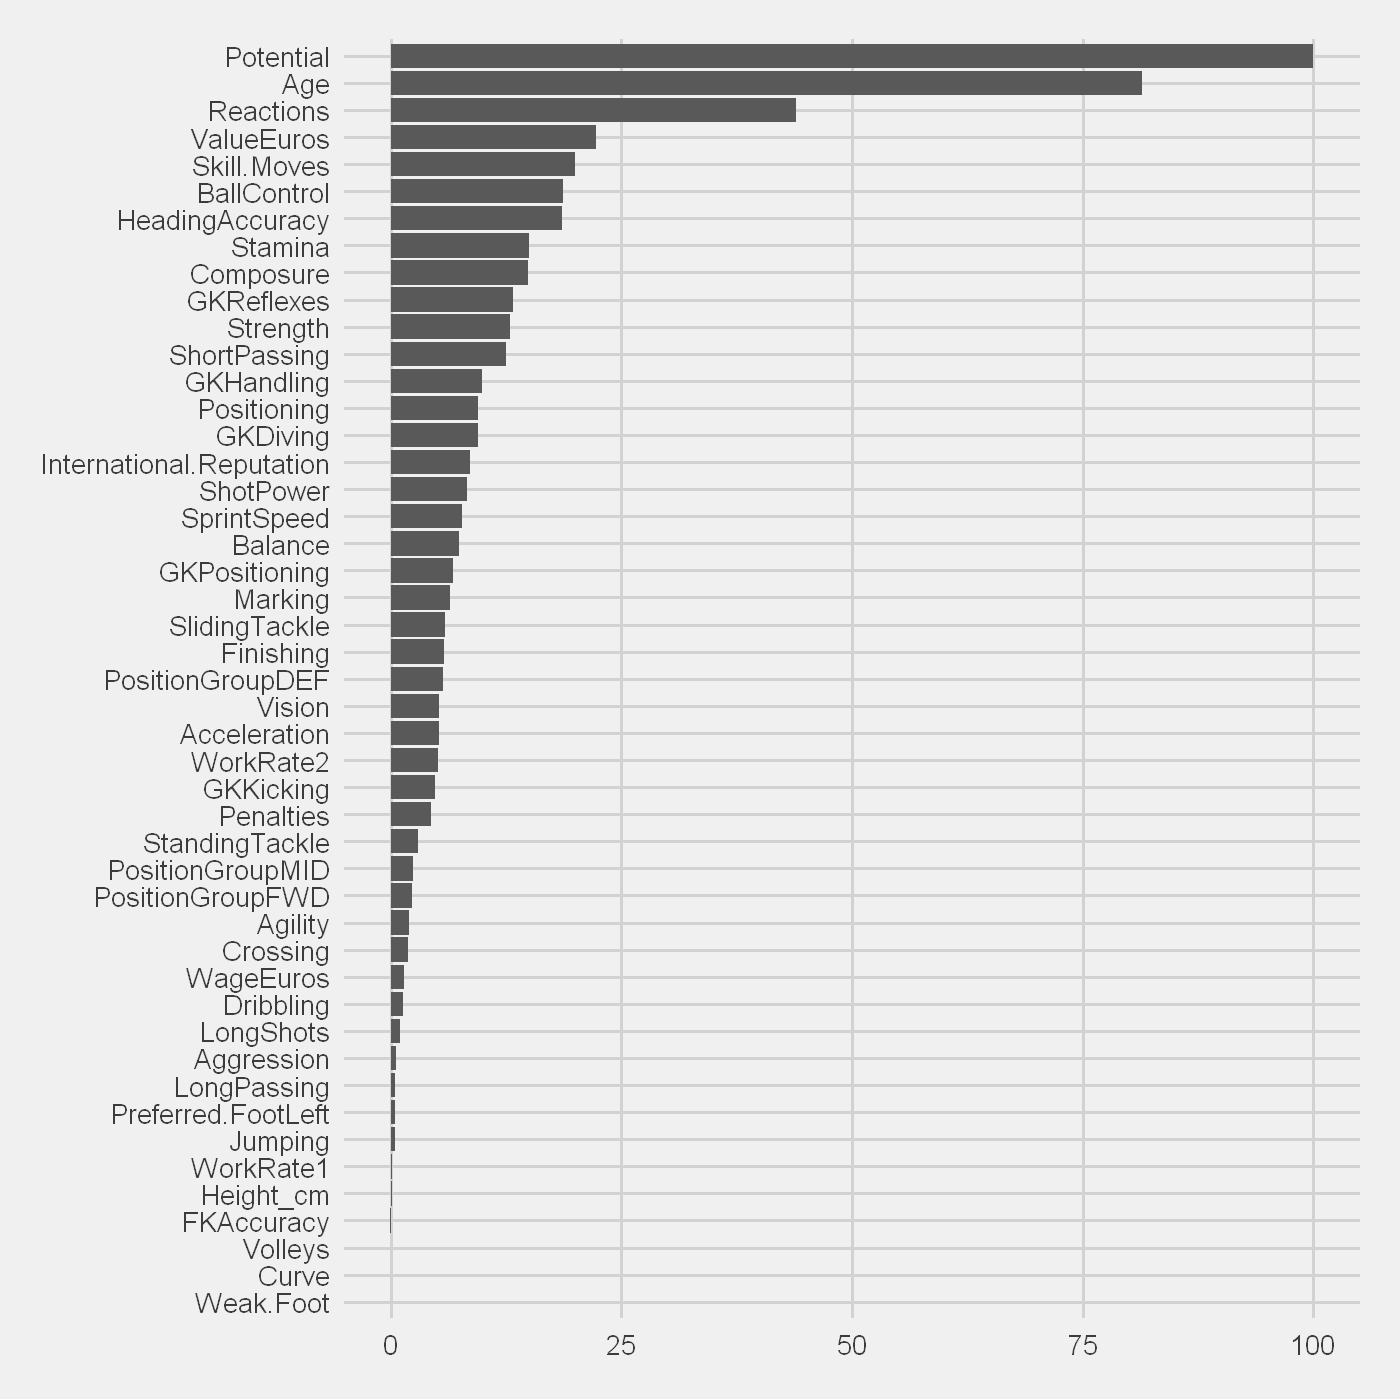

In [223]:
enet_model_imp <- varImp(lm_model)
ggplot(data= enet_model_imp, aes(x = Improtance, y = feature)) + theme_fivethirtyeight()

### Training with the three most important features

In [306]:
overall_clean_train_feat <- overall_clean_train %>% select(Overall, Potential, Age, Reactions, ValueEuros)

In [319]:
lm_model_sel <- train(
                    Overall ~ .,
                    data = overall_clean_train_feat,
                    method = "lm",
                    #tuneGrid = expand.grid(C = seq(1,2, by = 0.5)),
                    metric = "RMSE",   
                    trControl = fitControl)

lm_model_sel

Linear Regression 

12705 samples
    4 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11435, 11433, 11435, 11437, 11435, 11434, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  2.237106  0.8956912  1.744776

Tuning parameter 'intercept' was held constant at a value of TRUE

In [315]:
enet_model_sel_feat <- train(
                    Overall ~ .,
                    data = overall_clean_train_feat,
                    method = "enet",
                    tuneGrid = expand.grid(fraction = seq(0.99,1, by = 0.001), lambda = 0),
                    metric = "RMSE",   
                    trControl = fitControl)

enet_model_sel_feat

Elasticnet 

12705 samples
    4 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11435, 11433, 11435, 11437, 11435, 11434, ... 
Resampling results across tuning parameters:

  fraction  RMSE      Rsquared   MAE     
  0.990     2.237737  0.8956738  1.745402
  0.991     2.237609  0.8956771  1.745284
  0.992     2.237496  0.8956800  1.745179
  0.993     2.237397  0.8956827  1.745086
  0.994     2.237312  0.8956849  1.745006
  0.995     2.237242  0.8956868  1.744938
  0.996     2.237186  0.8956884  1.744881
  0.997     2.237144  0.8956896  1.744836
  0.998     2.237117  0.8956905  1.744807
  0.999     2.237104  0.8956910  1.744787
  1.000     2.237106  0.8956912  1.744776

Tuning parameter 'lambda' was held constant at a value of 0
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were fraction = 0.999 and lambda = 0.

In [316]:
earth_model_sel_feat <- train(
                    Overall ~ .,
                    data = overall_clean_train_feat,
                    method = "earth",
                    tuneGrid = expand.grid(nprune = seq(20,25, by = 1), degree = c(1)),
                    metric = "RMSE",   
                    trControl = fitControl)

earth_model_sel_feat

Multivariate Adaptive Regression Spline 

12705 samples
    4 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11435, 11433, 11435, 11437, 11435, 11434, ... 
Resampling results across tuning parameters:

  nprune  RMSE      Rsquared   MAE      
  20      1.303345  0.9646649  0.9402846
  21      1.303345  0.9646649  0.9402846
  22      1.303345  0.9646649  0.9402846
  23      1.303345  0.9646649  0.9402846
  24      1.303345  0.9646649  0.9402846
  25      1.303345  0.9646649  0.9402846

Tuning parameter 'degree' was held constant at a value of 1
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were nprune = 20 and degree = 1.

In [317]:
gbm_model_sel_feat <- train(
                    Overall ~ .,
                    data = overall_clean_train_feat,
                    method = "gbm",
                    tuneGrid = expand.grid(interaction.depth = seq(5,7, by = 1), n.trees = c(150), 
                                          shrinkage = 0.1, n.minobsinnode = 10),
                    metric = "RMSE",   
                    trControl = fitControl)

gbm_model_sel_feat

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       40.6999             nan     0.1000    7.6583
     2       34.4830             nan     0.1000    6.0903
     3       29.2104             nan     0.1000    5.2129
     4       24.8997             nan     0.1000    4.3268
     5       21.2442             nan     0.1000    3.6908
     6       18.2056             nan     0.1000    2.9767
     7       15.6870             nan     0.1000    2.5235
     8       13.5692             nan     0.1000    2.1117
     9       11.7886             nan     0.1000    1.7006
    10       10.3064             nan     0.1000    1.4505
    20        3.4744             nan     0.1000    0.2919
    40        1.0921             nan     0.1000    0.0381
    60        0.7491             nan     0.1000    0.0063
    80        0.6293             nan     0.1000    0.0039
   100        0.5652             nan     0.1000    0.0005
   120        0.5250             nan     0.1000    0.0012
   140        

Stochastic Gradient Boosting 

12705 samples
    4 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11435, 11433, 11435, 11437, 11435, 11434, ... 
Resampling results across tuning parameters:

  interaction.depth  RMSE       Rsquared   MAE      
  5                  0.7270942  0.9889778  0.5435832
  6                  0.6973620  0.9898580  0.5256901
  7                  0.6802368  0.9903507  0.5091525

Tuning parameter 'n.trees' was held constant at a value of 150
Tuning
 parameter 'shrinkage' was held constant at a value of 0.1
Tuning
 parameter 'n.minobsinnode' was held constant at a value of 10
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were n.trees = 150, interaction.depth =
 7, shrinkage = 0.1 and n.minobsinnode = 10.

### What if we remove the feature potential and predict with everything else

In [258]:
overall_clean_train_no_pote <- overall_clean_train %>% select(-Potential)

In [259]:
lm_model_no_pote <- train(
                    Overall ~ .,
                    data = overall_clean_train_no_pote,
                    method = "lm",
                    #tuneGrid = expand.grid(C = seq(1,2, by = 0.5)),
                    metric = "RMSE",   
                    trControl = fitControl)

lm_model_no_pote

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFi

Linear Regression 

12705 samples
   45 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11433, 11435, 11435, 11434, 11433, 11435, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  2.327366  0.8870665  1.822094

Tuning parameter 'intercept' was held constant at a value of TRUE

In [260]:
enet_model_no_pote <- train(
                    Overall ~ .,
                    data = overall_clean_train_no_pote,
                    method = "enet",
                    tuneGrid = expand.grid(fraction = seq(0.99,1, by = 0.001), lambda = c(0.0001)),
                    metric = "RMSE",   
                    trControl = fitControl)

enet_model_no_pote

Elasticnet 

12705 samples
   45 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11433, 11435, 11435, 11434, 11433, 11435, ... 
Resampling results across tuning parameters:

  fraction  RMSE      Rsquared   MAE     
  0.990     2.327331  0.8870703  1.822055
  0.991     2.327333  0.8870702  1.822057
  0.992     2.327335  0.8870700  1.822058
  0.993     2.327337  0.8870697  1.822059
  0.994     2.327339  0.8870695  1.822061
  0.995     2.327342  0.8870692  1.822063
  0.996     2.327345  0.8870689  1.822065
  0.997     2.327348  0.8870686  1.822067
  0.998     2.327351  0.8870683  1.822070
  0.999     2.327355  0.8870679  1.822074
  1.000     2.327359  0.8870675  1.822078

Tuning parameter 'lambda' was held constant at a value of 1e-04
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were fraction = 0.99 and lambda = 1e-04.

In [261]:
earth_model_no_pote <- train(
                    Overall ~ .,
                    data = overall_clean_train_no_pote,
                    method = "earth",
                    tuneGrid = expand.grid(nprune = seq(20,25, by = 1), degree = c(1)),
                    metric = "RMSE",   
                    trControl = fitControl)

earth_model_no_pote

Multivariate Adaptive Regression Spline 

12705 samples
   45 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11433, 11435, 11435, 11434, 11433, 11435, ... 
Resampling results across tuning parameters:

  nprune  RMSE      Rsquared   MAE      
  20      1.157718  0.9710383  0.7721321
  21      1.156700  0.9711004  0.7726108
  22      1.154981  0.9712011  0.7721094
  23      1.154229  0.9712415  0.7716900
  24      1.153007  0.9713120  0.7712787
  25      1.152560  0.9713383  0.7712752

Tuning parameter 'degree' was held constant at a value of 1
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were nprune = 25 and degree = 1.

In [279]:
gbm_model_no_pote <- train(
                    Overall ~ .,
                    data = overall_clean_train_no_pote,
                    method = "gbm",
                    tuneGrid = expand.grid(interaction.depth = seq(5,10, by = 1), n.trees = c(150), 
                                          shrinkage = 0.1, n.minobsinnode = 10),
                    metric = "RMSE",   
                    trControl = fitControl)

gbm_model_no_pote

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       40.4757             nan     0.1000    7.3507
     2       34.3019             nan     0.1000    6.2274
     3       29.1136             nan     0.1000    5.0419
     4       24.7848             nan     0.1000    4.2804
     5       21.2605             nan     0.1000    3.4631
     6       18.2828             nan     0.1000    3.0125
     7       15.7388             nan     0.1000    2.4728
     8       13.6451             nan     0.1000    2.1034
     9       11.8673             nan     0.1000    1.7400
    10       10.3898             nan     0.1000    1.4598
    20        3.6386             nan     0.1000    0.3297
    40        1.2811             nan     0.1000    0.0369
    60        0.8712             nan     0.1000    0.0066
    80        0.7219             nan     0.1000    0.0057
   100        0.6252             nan     0.1000    0.0010
   120        0.5597             nan     0.1000    0.0020
   140        

Stochastic Gradient Boosting 

12705 samples
   45 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11433, 11435, 11435, 11434, 11433, 11435, ... 
Resampling results across tuning parameters:

  interaction.depth  RMSE       Rsquared   MAE      
   5                 0.7587903  0.9880229  0.5448227
   6                 0.7304816  0.9888964  0.5225757
   7                 0.7055280  0.9896326  0.5052448
   8                 0.6850265  0.9902356  0.4914482
   9                 0.6779482  0.9904335  0.4825414
  10                 0.6678641  0.9907158  0.4775675

Tuning parameter 'n.trees' was held constant at a value of 150
Tuning
 parameter 'shrinkage' was held constant at a value of 0.1
Tuning
 parameter 'n.minobsinnode' was held constant at a value of 10
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were n.trees = 150, interaction.depth =
 10, shrinkage = 0.1 and n.minobsinnode = 10.

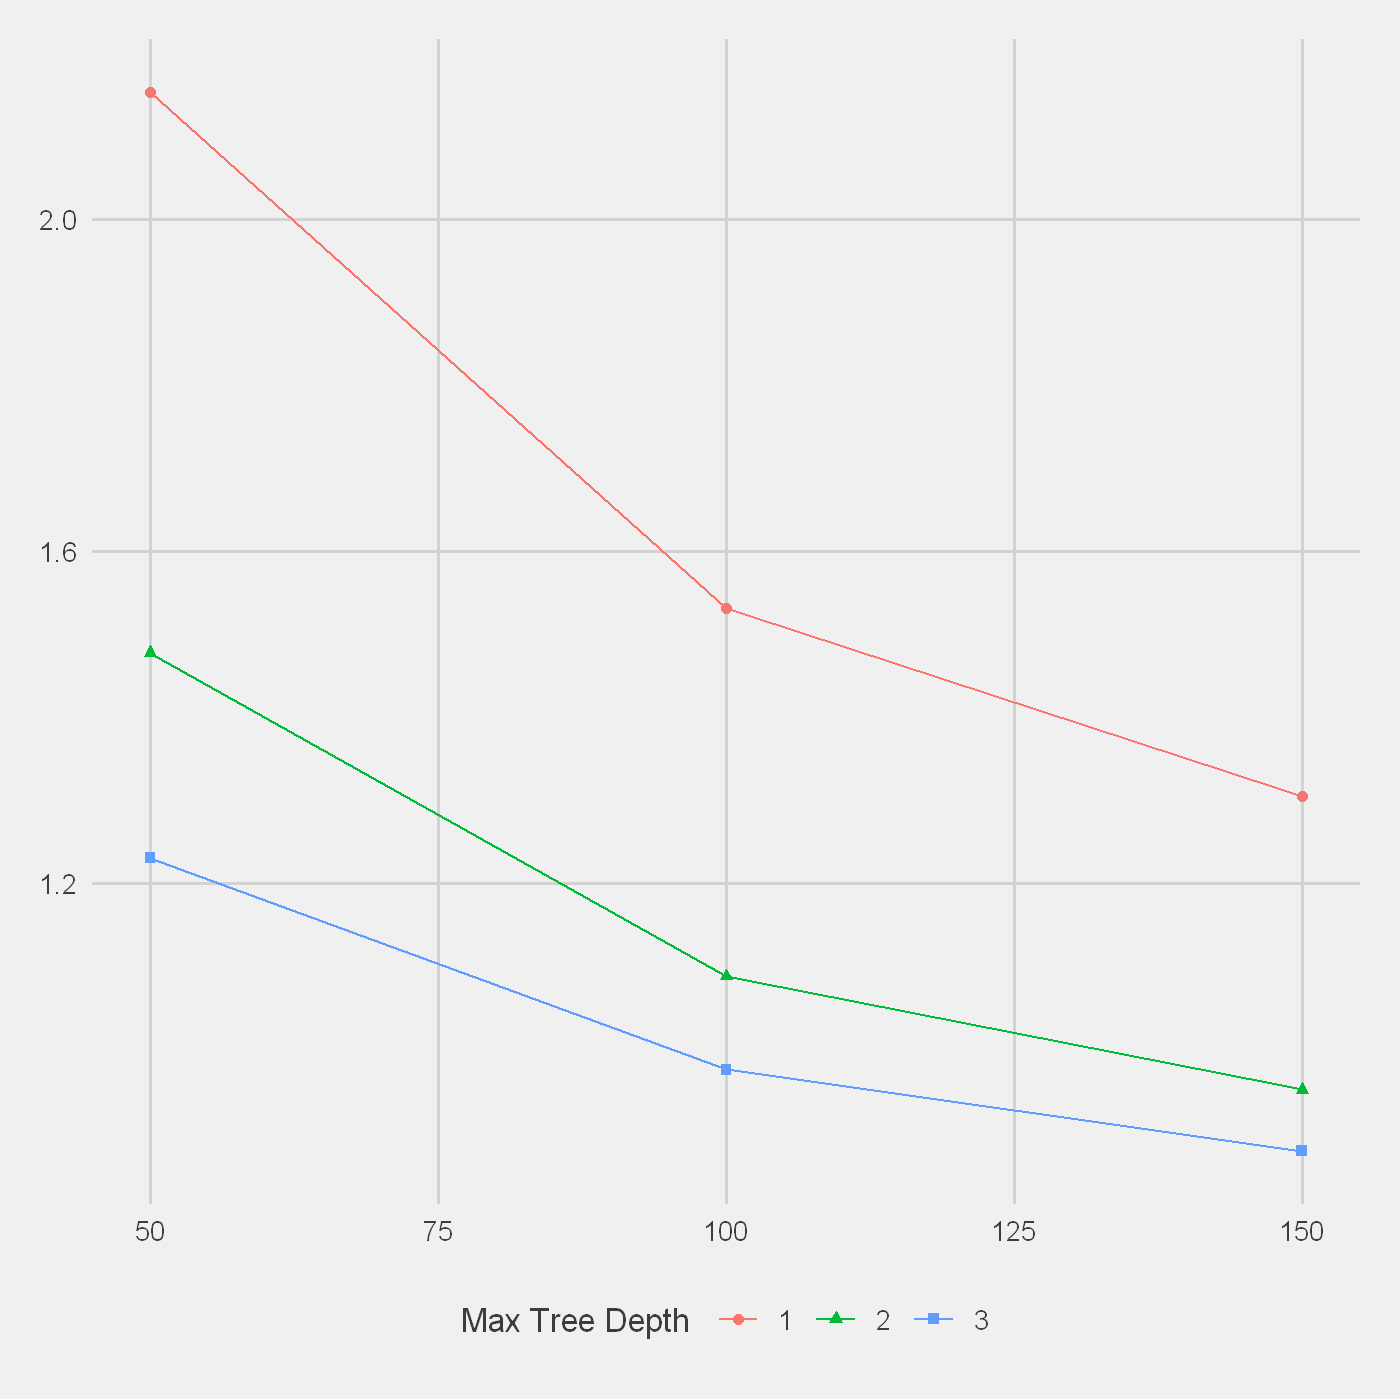

In [268]:
ggplot(gbm_model_no_pote, aes(x = var, y = rel.inf))+ theme_fivethirtyeight()

,var,rel.inf
,<fct>,<dbl>
ValueEuros,ValueEuros,72.977395865
Reactions,Reactions,13.870223710
Age,Age,7.507330559
WageEuros,WageEuros,2.069639843
International.Reputation,International.Reputation,1.638638596
Composure,Composure,0.492845506
StandingTackle,StandingTackle,0.286941386
GKPositioning,GKPositioning,0.219025740
Marking,Marking,0.126828914


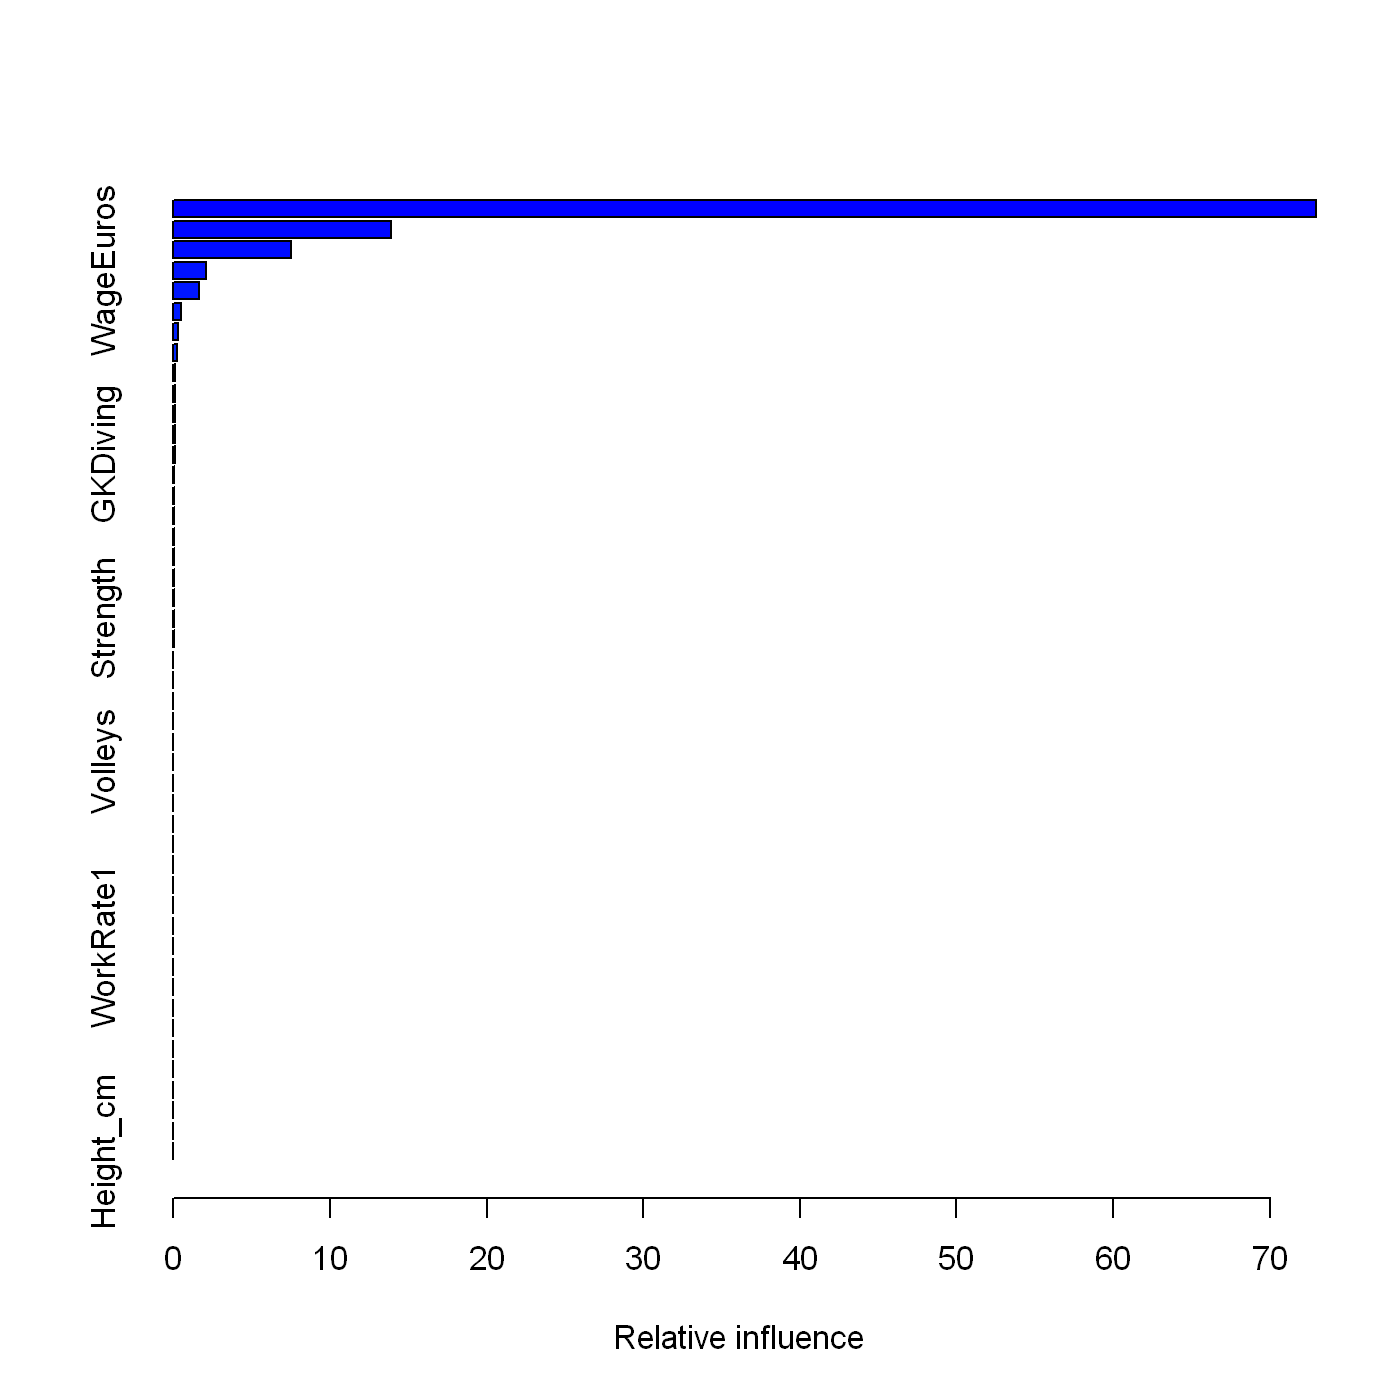

In [271]:
summary(gbm_model_no_pote)


### Summary

In [108]:
overall_model_train <- tibble(Model = c("Linear Model", "Elastic Net", "Earth", "Stochastic Gradient Boosting"),
                       RMSE_Training_default = c(1.79, 1.79, 1.42, 0.94),
                       RMSE_Training_after_tuning  = c(1.79, 1.79, 1.21, 0.59),
                       RMSE_Trainig_after_feature_Sele = c(2.23, 2.23, 1.3, 0.68))
overall_model_train

Model,RMSE_Training_default,RMSE_Training_after_tuning,RMSE_Trainig_after_feature_Sele
<chr>,<dbl>,<dbl>,<dbl>
Linear Model,1.79,1.79,2.23
Elastic Net,1.79,1.79,2.23
Earth,1.42,1.21,1.30
Stochastic Gradient Boosting,0.94,0.59,0.68


### Predicting the test set with all features

In [299]:
lm_preds <- predict(lm_model, overall_clean_test)
RSMElm = sqrt(mean((overall_clean_test$Overall - lm_preds)^2))
RSMElm

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"


[1] 1.772699

In [300]:
enet_preds <- predict(enet_model, overall_clean_test)
RSMEenet = sqrt(mean((overall_clean_test$Overall - enet_preds)^2))
RSMEenet

[1] 1.772392

In [301]:
earth_preds <- predict(earth_model, overall_clean_test)
RSMEearth = sqrt(mean((overall_clean_test$Overall - earth_preds)^2))
RSMEearth

[1] 1.327633

In [302]:
gbm_preds <- predict(gbm_model, overall_clean_test)
RSMEgbm = sqrt(mean((overall_clean_test$Overall - gbm_preds)^2))
RSMEgbm

[1] 0.6028946

### Predicting the test set with selected features

In [324]:
overall_clean_test_sel_feat <- overall_clean_test %>% select(Overall, Potential, Age, Reactions, ValueEuros)

In [325]:
lm_preds_sel <- predict(lm_model_sel, overall_clean_test_sel_feat)
RSMElm_sel = sqrt(mean((overall_clean_test$Overall - lm_preds_sel)^2))
RSMElm_sel

[1] 2.210607

In [326]:
enet_preds_sel <- predict(enet_model_sel_feat, overall_clean_test_sel_feat)
RSMEenet_sel = sqrt(mean((overall_clean_test$Overall - enet_preds_sel)^2))
RSMEenet_sel

[1] 2.210717

In [327]:
earth_preds_sel <- predict(earth_model_sel_feat, overall_clean_test_sel_feat)
RSMEearth_sel = sqrt(mean((overall_clean_test$Overall - earth_preds_sel)^2))
RSMEearth_sel

[1] 1.327633

In [328]:
gbm_preds_sel <- predict(gbm_model_sel_feat, overall_clean_test_sel_feat)
RSMEgbm_sel = sqrt(mean((overall_clean_test$Overall - gbm_preds_sel)^2))
RSMEgbm_sel

[1] 0.6916852

### Predicting the test set without Potential feature

In [329]:
lm_preds_no_pote <- predict(lm_model_no_pote, overall_clean_test)
RSMElm_no_pote = sqrt(mean((overall_clean_test$Overall - lm_preds_no_pote)^2))
RSMElm_no_pote

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"


[1] 2.31726

In [330]:
enet_preds_no_pote <- predict(enet_model_no_pote, overall_clean_test)
RSMEenet_no_pote = sqrt(mean((overall_clean_test$Overall - enet_preds_no_pote)^2))
RSMEenet_no_pote

[1] 2.316718

In [331]:
earth_preds_no_pote <- predict(earth_model_no_pote, overall_clean_test)
RSMEearth_no_pote = sqrt(mean((overall_clean_test$Overall - earth_preds_no_pote)^2))
RSMEearth_no_pote

[1] 1.444366

In [334]:
gbm_preds_no_pote <- predict(gbm_model_no_pote, overall_clean_test)
RSMEgbm_no_pote = sqrt(mean((overall_clean_test$Overall - gbm_preds_no_pote)^2))
RSMEgbm_no_pote

[1] 0.6476234

### Summary

In [109]:
overall_model_test <- tibble(Model = c("Linear Model", "Elastic Net", "Earth", "Stochastic Gradient Boosting"),
                       RMSE_test_with_default_train = c(1.79, 1.79, 1.42, 0.94),
                       RMSE_Test_with_tuned_train  = c(1.77, 1.77, 1.32, 0.60),
                       RMSE_Test_with_feature_Sele_train = c(2.21, 2.21, 1.32, 0.69))
overall_model_test

Model,RMSE_test_with_default_train,RMSE_Test_with_tuned_train,RMSE_Test_with_feature_Sele_train
<chr>,<dbl>,<dbl>,<dbl>
Linear Model,1.79,1.77,2.21
Elastic Net,1.79,1.77,2.21
Earth,1.42,1.32,1.32
Stochastic Gradient Boosting,0.94,0.60,0.69


## Can player wages be modelled

In [35]:
player_features_exp <- player_data %>% dplyr::select(
                                    -ï..ID, -Special, -Body.Type, -Joined, -Jersey.Number, -Loaned.From, 
                                    -Name, -Nationality, -AgeGroup, -LS, -ST, -RS, -LW, -LF, -CF, -RF, -RW, -LAM,
                                    -CAM, -RAM, -LM, -LCM, -CM, -RCM, -RM, -LWB, -LDM, - CDM, -RDM, -RWB, -LB, -LCB, -CB, 
                                    -RCB, -RB, -Contract.Valid.Until, -Release.Clause, -Position, -Weight)

In [36]:
set.seed(20002020)
train_size = 0.7
train_position <- createDataPartition(y = player_features_exp$WageEuros,
                                  p = train_size,
                                  list = F,
                                  time = 1)

wages_train <- player_features_exp[train_position,]
wages_test <- player_features_exp[-train_position,]

In [58]:
dim(wages_train)

[1] 12705    47

In [55]:
wages_recipe <- recipe(WageEuros ~., data = wages_train) %>%
                    #step_dummy(Club) %>%
                    step_nzv(all_predictors())
wages_prepare <- prep(wages_recipe, wages_train)
wages_clean_train <- bake(wages_prepare, wages_train)

In [38]:
wages_recipe_test <- recipe(WageEuros ~., data = wages_test) %>%
                   # step_integer(matches("WorkRate")) %>%
                    step_nzv(all_predictors())
wages_prepare_test <- prep(wages_recipe_test, wages_test)
wages_clean_test <- bake(wages_prepare_test, wages_test)

In [39]:
fitControl <- trainControl(method = "cv",
                          savePredictions = "final",
                          index = createFolds(wages_clean_train$WageEuros, k = 10, returnTrain = T))

I have the summary of the models without club in the summary section -- with Club is taking a longer time to run so I don't have the summary for that. Including the step_dummy(club) just completely eliminate the club column, any help on how to proceed will be appreciated. Here I just left the Club column by default

In [34]:
lm_model_wages <- train(
                    WageEuros ~ .,
                    data = wages_clean_train,
                    method = "lm",
                    #tuneGrid = expand.grid(C = seq(1,2, by = 0.5)),
                    metric = "RMSE",   
                    trControl = fitControl)

lm_model_wages

Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFit, newdata):
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(modelFi

Linear Regression 

12705 samples
   47 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11434, 11434, 11434, 11435, 11434, 11434, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  8043.239  0.8668316  3802.91

Tuning parameter 'intercept' was held constant at a value of TRUE

In [42]:
earth_model_wages <- train(
                    WageEuros ~ .,
                    data = wages_clean_train,
                    method = "earth",
                    tuneGrid = expand.grid(nprune = seq(28,35, by = 1), degree = c(1)),
                    metric = "RMSE",   
                    trControl = fitControl)

earth_model_wages

Multivariate Adaptive Regression Spline 

12705 samples
   46 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11434, 11434, 11434, 11435, 11434, 11434, ... 
Resampling results across tuning parameters:

  nprune  RMSE      Rsquared   MAE     
  28      8540.621  0.8492428  4086.633
  29      8517.243  0.8499539  4076.360
  30      8526.718  0.8497773  4084.281
  31      8517.754  0.8500816  4086.328
  32      8555.408  0.8491017  4098.686
  33      8550.886  0.8492219  4103.611
  34      8550.198  0.8492454  4108.304
  35      8544.150  0.8494087  4107.128

Tuning parameter 'degree' was held constant at a value of 1
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were nprune = 29 and degree = 1.

In [43]:
gbm_model_wages <- train(
                    WageEuros ~ .,
                    data = wages_clean_train,
                    method = "earth",
                    tuneGrid = expand.grid(nprune = seq(28,35, by = 1), degree = c(1)),
                    metric = "RMSE",   
                    trControl = fitControl)

gbm_model_wages

Multivariate Adaptive Regression Spline 

12705 samples
   46 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11434, 11434, 11434, 11435, 11434, 11434, ... 
Resampling results across tuning parameters:

  nprune  RMSE      Rsquared   MAE     
  28      8540.621  0.8492428  4086.633
  29      8517.243  0.8499539  4076.360
  30      8526.718  0.8497773  4084.281
  31      8517.754  0.8500816  4086.328
  32      8555.408  0.8491017  4098.686
  33      8550.886  0.8492219  4103.611
  34      8550.198  0.8492454  4108.304
  35      8544.150  0.8494087  4107.128

Tuning parameter 'degree' was held constant at a value of 1
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were nprune = 29 and degree = 1.

In [44]:
svmR_model_wages <- train(
                    WageEuros ~ .,
                    data = wages_clean_train,
                    method = "svmRadial",
                    #tuneGrid = expand.grid(nprune = seq(28,35, by = 1), degree = c(1)),
                    metric = "RMSE",   
                    trControl = fitControl)

svmR_model_wages

Support Vector Machines with Radial Basis Function Kernel 

12705 samples
   46 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 11434, 11434, 11434, 11435, 11434, 11434, ... 
Resampling results across tuning parameters:

  C     RMSE       Rsquared   MAE     
  0.25  12685.778  0.7891913  4130.273
  0.50  10583.988  0.8328425  3731.659
  1.00   9036.116  0.8647531  3451.936

Tuning parameter 'sigma' was held constant at a value of 0.0006957899
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were sigma = 0.0006957899 and C = 1.

End of model with Club, Linear regression seems better than the fancy models

Models without Club as a feature

,glmnet,svmLinear,enet,earth,gbm,rf,pcr,knn
glmnet,1.0000000,0.9305518,0.9979019,0.8024768,0.8817724,0.7837025,0.8951859,0.8889722
svmLinear,0.9305518,1.0000000,0.9232964,0.8781213,0.9024738,0.8035640,0.8616920,0.9191418
enet,0.9979019,0.9232964,1.0000000,0.7855793,0.8799410,0.7605621,0.9048641,0.8948546
earth,0.8024768,0.8781213,0.7855793,1.0000000,0.8861164,0.8557196,0.6944149,0.6976869
gbm,0.8817724,0.9024738,0.8799410,0.8861164,1.0000000,0.8922105,0.8735272,0.8719360
rf,0.7837025,0.8035640,0.7605621,0.8557196,0.8922105,1.0000000,0.7230817,0.7109500
pcr,0.8951859,0.8616920,0.9048641,0.6944149,0.8735272,0.7230817,1.0000000,0.9580232
knn,0.8889722,0.9191418,0.8948546,0.6976869,0.8719360,0.7109500,0.9580232,1.0000000


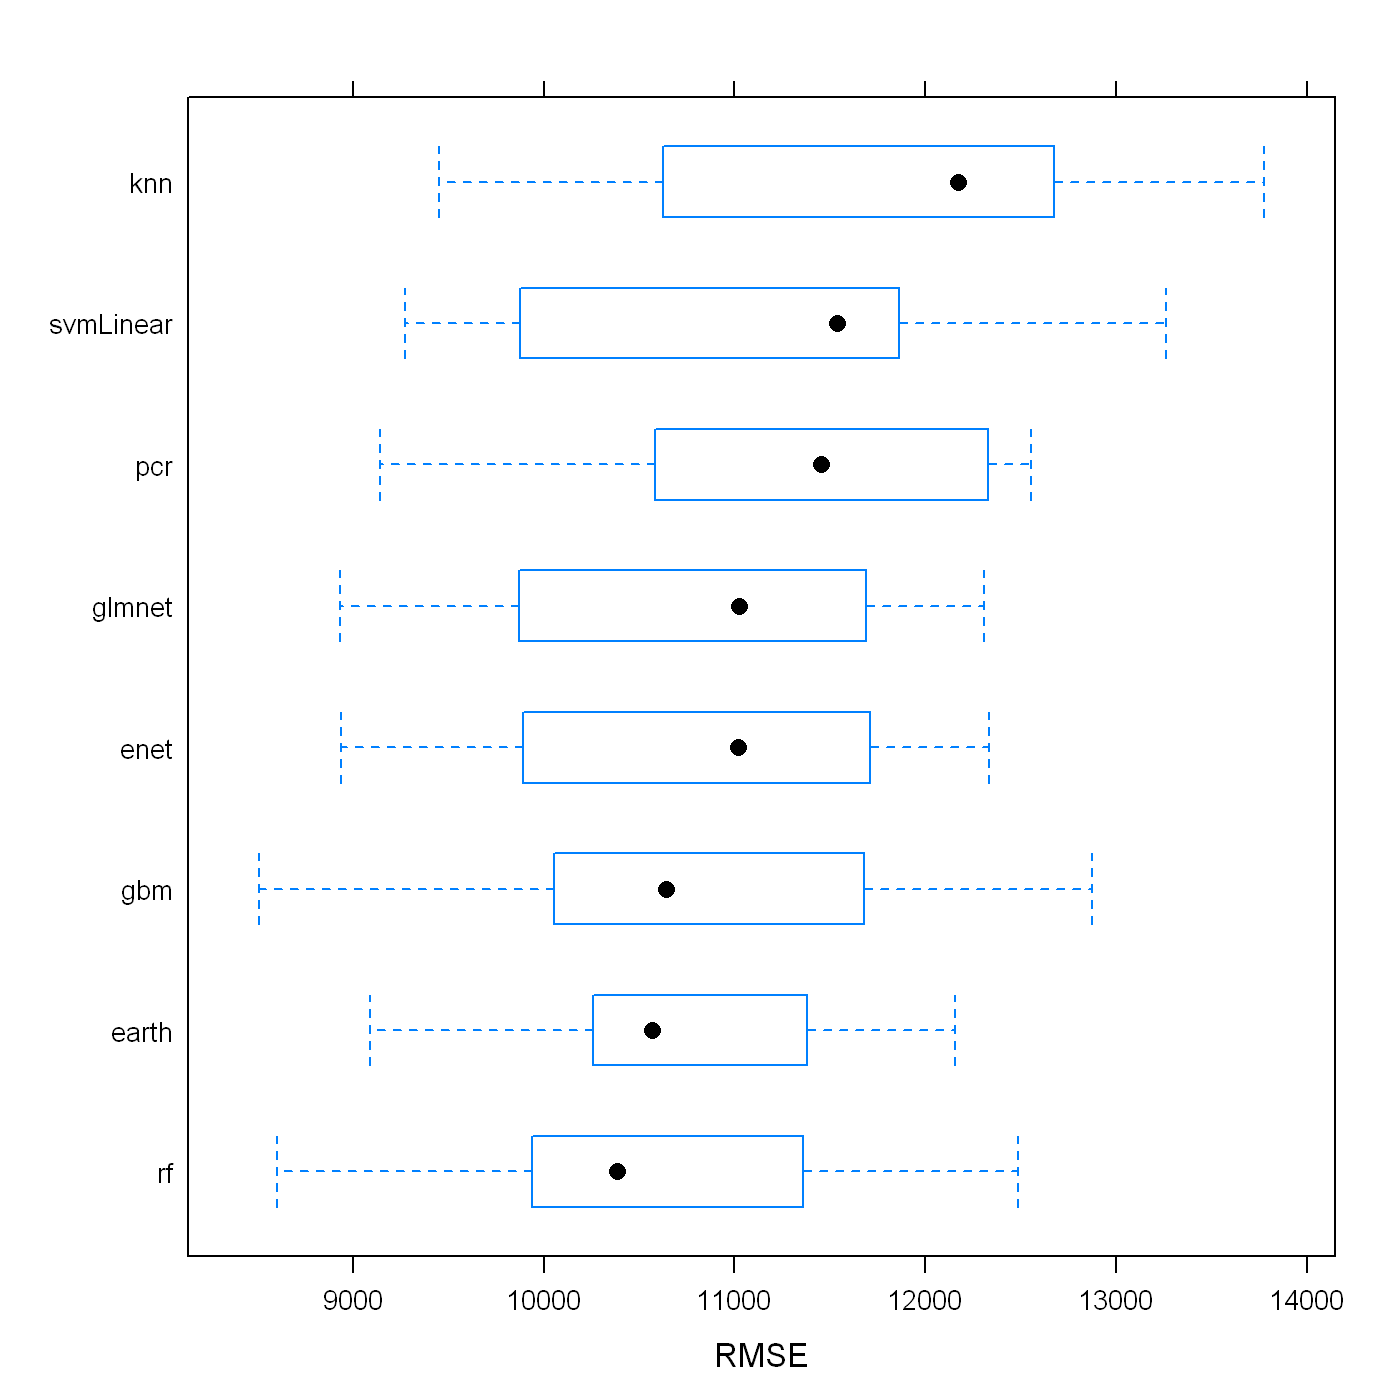

In [119]:
bwplot(resamples(model_list), metric = "RMSE")
modelCor(resamples(model_list))

In [120]:
c_ensemble <- caretEnsemble(
                model_list,
                metric = "RMSE",
                trControl = trainControl(number = 10, method = "repeatedcv", repeats = 3))

In [121]:
c_ensemble

A glm ensemble of 8 base models: glmnet, svmLinear, enet, earth, gbm, rf, pcr, knn

Ensemble results:
Generalized Linear Model 

12705 samples
    8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 11435, 11433, 11433, 11433, 11435, 11435, ... 
Resampling results:

  RMSE      Rsquared   MAE    
  10383.88  0.7792286  4533.05


### Summary  -- this is without Club as a feature

In [123]:
wages_model_train <- tibble(Model = c("Generalized Linear Model Net", "Elastic Net", "Earth", "Stochastic Gradient Boosting",
                                     "SvmLinear", "Random Forest", "PCR", "K Nearest Neighbors", "Ensemble"),
                       RMSE_Training_default = c(10879, 10887, 10619, 10690, 11165, 10499, 11353, 11834, 10383))
                       #RMSE_Training_after_tuning  = c(1.79, 1.79, 1.21, 0.59),
                      # RMSE_Trainig_after_feature_Sele = c(2.23, 2.23, 1.3, 0.68))
wages_model_train

Model,RMSE_Training_default
<chr>,<dbl>
Generalized Linear Model Net,10879
Elastic Net,10887
Earth,10619
Stochastic Gradient Boosting,10690
SvmLinear,11165
Random Forest,10499
PCR,11353
K Nearest Neighbors,11834
Ensemble,10383


Predicting Test set

In [ ]:
model_list$

In [127]:
ensemble_preds_sel <- predict(c_ensemble, wages_clean_test)
RSMEensemble_sel = sqrt(mean((wages_clean_test$WageEuros - ensemble_preds_sel)^2))
RSMEensemble_sel

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
"kernlab prediction calculations failed; returning NAs"


[1] NA

In [128]:
glm_preds_sel <- predict(model_list$glmnet, wages_clean_test)
RSMEglm_sel = sqrt(mean((wages_clean_test$WageEuros - glm_preds_sel)^2))
RSMEglm_sel

[1] 10533.59

In [129]:
enet_preds_sel <- predict(model_list$enet, wages_clean_test)
RSMEenet_sel = sqrt(mean((wages_clean_test$WageEuros - enet_preds_sel)^2))
RSMEenet_sel

[1] 10528.6

In [130]:
earth_preds_sel <- predict(model_list$earth, wages_clean_test)
RSMEearth_sel = sqrt(mean((wages_clean_test$WageEuros - earth_preds_sel)^2))
RSMEearth_sel

[1] 9781.531

In [131]:
gbm_preds_sel <- predict(model_list$gbm, wages_clean_test)
RSMEgbm_sel = sqrt(mean((wages_clean_test$WageEuros - gbm_preds_sel)^2))
RSMEgbm_sel

[1] 9940.386

In [138]:
svmL_preds_sel <- predict(model_list$svmLinear, wages_clean_test)
RSMEsvmL_sel = sqrt(mean((wages_clean_test$WageEuros - svmL_preds_sel)^2))
RSMEsvmL_sel

Warning message in method$predict(modelFit = modelFit, newdata = newdata, submodels = param):
"kernlab prediction calculations failed; returning NAs"


[1] NA

In [133]:
rf_preds_sel <- predict(model_list$rf, wages_clean_test)
RSMErf_sel = sqrt(mean((wages_clean_test$WageEuros - rf_preds_sel)^2))
RSMErf_sel

[1] 9821.429

In [134]:
pcr_preds_sel <- predict(model_list$pcr, wages_clean_test)
RSMEpcr_sel = sqrt(mean((wages_clean_test$WageEuros - pcr_preds_sel)^2))
RSMEpcr_sel

[1] 11111.29

In [135]:
knn_preds_sel <- predict(model_list$knn, wages_clean_test)
RSMEknn_sel = sqrt(mean((wages_clean_test$WageEuros - knn_preds_sel)^2))
RSMEknn_sel

[1] 11286.97

### Summary

In [137]:
wages_model_test <- tibble(Model = c("Generalized Linear Model Net", "Elastic Net", "Earth", "Stochastic Gradient Boosting",
                                     "SvmLinear", "Random Forest", "PCR", "K Nearest Neighbors", "Ensemble"),
                       RMSE_Training_default = c(10511, 10505, 10315, 10529, 10782, 10263, 11028, 11288, 10146),
                       RMSE_Test  = c(10533, 10528, 9781, 9940, NA, 9821, 11111, 11286, NA))
                      # RMSE_Trainig_after_feature_Sele = c(2.23, 2.23, 1.3, 0.68))
wages_model_test

Model,RMSE_Training_default,RMSE_Test
<chr>,<dbl>,<dbl>
Generalized Linear Model Net,10511,10533
Elastic Net,10505,10528
Earth,10315,9781
Stochastic Gradient Boosting,10529,9940
SvmLinear,10782,NA
Random Forest,10263,9821
PCR,11028,11111
K Nearest Neighbors,11288,11286
Ensemble,10146,NA


In [189]:
data.frame("Observed" = wages_clean_test$WageEuros, "Predicted" = rf_preds_sel)


,Observed,Predicted
,<dbl>,<dbl>
1,420000,290346.10
2,380000,209351.43
3,205000,251532.27
4,205000,258100.93
5,130000,184358.87
6,300000,233487.87
7,255000,216213.17
8,165000,246417.63
9,355000,270067.10


Moving forward, I would like to divide wages into groups so as to turn this problem into a classification problem. This is because the predicited wages does not apply to real life eg, it's impossible to pay a player 1023 euros. Instead, wage category of a player can be predicted and the manager can decide on a practical amount to pay the player. A problem with this might be the extreme skewness of the Wages. Any insight on this would be appreciated. Thanks again for the great class.